In [1]:
import cdt
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from cdt.causality.graph import PC
import numpy as np

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
Detecting 1 CUDA device(s).


In [57]:
pip install --upgrade scikit-learn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\19492\\anaconda3\\Lib\\site-packages\\~klearn\\cluster\\_dbscan_inner.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [15]:
pip install --upgrade scipy networkx

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\19492\\anaconda3\\Lib\\site-packages\\scipy\\~libs\\libansari.54HGNEJBQIYZX5TZPCQGLNVIPFU6NWEX.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: scipy
    Found existing installation: scipy 1.8.1
    Uninstalling scipy-1.8.1:
      Successfully uninstalled scipy-1.8.1


In [ ]:
#visualization Solution
https://discuss.dizzycoding.com/how-to-increase-node-spacing-for-networkx-spring_layout/

In [2]:
import sys
sys.path.append("C:\Program Files\R\R-4.1.0\bin\Rscript.exe")
sys.path.append("C:\Program Files\R\R-4.1.0\bin\R.exe")

In [3]:
from rpy2.robjects import r as R
%load_ext rpy2.ipython

Unable to determine R home: [WinError 2] The system cannot find the file specified
Unable to determine R library path: Command '('C:\\Program Files\\R\\R-4.1.0\\bin\\Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 1.
The symbol 'quartz' is not in this R namespace/package.


In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
# Load the data 
data = pd.read_csv('sepsis_final_data_withTimes_updated.csv')
data.head()

m:icustayid  o:gender  o:mechvent  o:max_dose_vaso  o:re_admission  \
0       200003      -0.5        -0.5        -2.302585            -0.5   
1       200003      -0.5        -0.5        -2.302585            -0.5   
2       200003      -0.5        -0.5        -2.302585            -0.5   
3       200003      -0.5        -0.5        -2.302585            -0.5   
4       200003      -0.5        -0.5        -2.302585            -0.5   

      o:age  o:Weight_kg     o:GCS      o:HR   o:SysBP  ...  o:Total_bili  \
0 -0.976019    -0.180342  0.705867 -0.750546 -0.791345  ...     -0.505982   
1 -0.976019    -0.180342  0.705867 -1.124471 -0.834995  ...      1.696345   
2 -0.976019    -0.180342  0.705867 -1.012579 -0.479898  ...      1.696345   
3 -0.976019    -0.147655  0.705867 -0.545030 -0.162788  ...      1.696345   
4 -0.976019    -0.139483  0.705867 -0.604972 -0.321343  ...      1.696345   

      o:INR  o:input_total  o:input_4hourly  o:output_total  o:output_4hourly  \
0 -0.225160       0.764283         0.262628        0.779976          0.687553   
1 -0.959031       0.769406         0.262628        0.787781          0.579417   
2 -0.959031       0.774491         0.262628        0.793632          0.498425   
3 -0.225160       0.779537         0.262628        0.800583          0.557740   
4 -0.225160       0.784546         0.262628        0.811298          0.699084   

   a:action  a_iv:action_iv  a_vc:action_vc  r:reward  
0        10            50.0             0.0         1  
1        10            50.0             0.0         1  
2        10            50.0             0.0         1  
3        10            50.0             0.0         1  
4        10            50.0             0.0         1  

[5 rows x 52 columns]

In [6]:
data.isnull().sum().sum()

0

In [6]:
data=data.fillna(0)

In [8]:
#adding lagged target as feature (sleep)
#lag order 1
score_OURA = data["score_OURA"]
score_OURA_lag=score_OURA.shift(1)
score_OURA_lag[0]=score_OURA_lag[1]
data['score_OURA_lag']=score_OURA_lag

score_OURA_lag2=score_OURA.shift(2)
score_OURA_lag2[0]=score_OURA_lag[1]
score_OURA_lag2[1]=score_OURA_lag[2]
#x0['y_lag2']=y0_lag2

In [9]:
#adding lagged target as feature (distressed)
#lag order 1
distressed_Label = data["distressed_Label"]
distressed_Label_lag=distressed_Label.shift(1)
distressed_Label_lag[0]=distressed_Label_lag[1]
data['distressed_Label_lag']=distressed_Label_lag

distressed_Label_lag2=distressed_Label.shift(2)
distressed_Label_lag2[0]=distressed_Label_lag[1]
distressed_Label_lag2[1]=distressed_Label_lag[2]
#x0['y_lag2']=y0_lag2

In [10]:
#adding lagged target as feature (steps)
#lag order 1
steps_OURA = data["steps_OURA"]
steps_OURA_lag=steps_OURA.shift(1)
steps_OURA_lag[0]=steps_OURA_lag[1]
data['steps_OURA_lag']=steps_OURA_lag

steps_OURA_lag2=steps_OURA.shift(2)
steps_OURA_lag2[0]=steps_OURA_lag[1]
steps_OURA_lag2[1]=steps_OURA_lag[2]
#x0['y_lag2']=y0_lag2

In [8]:
data.dtypes

traj                     int64
o:gender               float64
o:mechvent             float64
o:max_dose_vaso        float64
o:re_admission         float64
o:age                  float64
o:Weight_kg            float64
o:GCS                  float64
o:HR                   float64
o:SysBP                float64
o:MeanBP               float64
o:DiaBP                float64
o:RR                   float64
o:Temp_C               float64
o:FiO2_1               float64
o:Potassium            float64
o:Sodium               float64
o:Chloride             float64
o:Glucose              float64
o:Magnesium            float64
o:Calcium              float64
o:Hb                   float64
o:WBC_count            float64
o:Platelets_count      float64
o:PTT                  float64
o:PT                   float64
o:Arterial_pH          float64
o:paO2                 float64
o:paCO2                float64
o:Arterial_BE          float64
o:HCO3                 float64
o:Arterial_lactate     float64
o:SOFA  

In [7]:
data.shape

(256405, 52)

In [11]:
import datetime
# datetime.datetime.fromtimestamp(data['date'] / 1e3)
# data['date'] = data['date'].apply(lambda x: datetime.date(x.year,x.month,x.day))
data['date1'] = pd.to_datetime(data['date'], format='%m/%d/%Y')

In [17]:
data.head(3)

date  pos_avg_Label  neg_avg_Label  distressed_Label  upset_Label  \
0  3/16/2020           50.0           50.0              50.0         50.0   
1  2/22/2020            1.1           19.2             100.0          1.0   
2  7/10/2020            8.7           30.4              99.0        100.0   

   guilty_Label  scared_Label  hostile_Label  irritable_Label  ashamed_Label  \
0          50.0          50.0           50.0             50.0           50.0   
1           2.0           3.0            1.0              0.0            0.0   
2           0.0           7.0           32.0             30.0            0.0   

   ...  HRV_LnHF  HRV_SD1  HRV_SD2  HRV_SD1SD2     HRV_S    HR  \
0  ...     -3.59    51.85     73.8         0.7  12181.17  77.1   
1  ...     -3.59    51.85     73.8         0.7  12181.17  77.1   
2  ...     -3.59    51.85     73.8         0.7  12181.17  77.1   

   score_OURA_lag  distressed_Label_lag  steps_OURA_lag      date1  
0            93.0                  50.0          8992.0 2020-03-16  
1            93.0                  50.0          8992.0 2020-02-22  
2            90.0                 100.0         19659.0 2020-07-10  

[3 rows x 129 columns]

In [40]:
#cyclic features

# days = x.index
seconds = data["date1"].map(pd.Timestamp.timestamp).to_numpy()
second_per_day = 24*60*60
data['day_sin'] = np.sin(seconds * (2*np.pi/second_per_day)).reshape((-1,1))
data['day_cos'] = np.cos(seconds * (2*np.pi/second_per_day)).reshape((-1,1))

In [100]:
seconds

array([1.5843168e+09, 1.5823296e+09, 1.5943392e+09, ..., 1.6102368e+09,
       1.5797376e+09, 1.6016832e+09])

In [41]:
data.head(10)

date  pos_avg_Label  neg_avg_Label  distressed_Label  upset_Label  \
0  3/16/2020          50.00           50.0              50.0         50.0   
1  2/22/2020           1.10           19.2             100.0          1.0   
2  7/10/2020           8.70           30.4              99.0        100.0   
3  9/11/2020          41.20            6.0              17.0         14.0   
4  8/19/2020          52.00            8.1              34.0         27.0   
5   8/3/2020          11.20           36.6              76.0         99.0   
6   2/8/2020          25.30           12.3               0.0          0.0   
7  3/28/2020          17.55           16.1               1.0          2.5   
8   4/6/2020           2.10           55.9             100.0        100.0   
9  6/13/2020          36.60           18.6               0.0         19.0   

   guilty_Label  scared_Label  hostile_Label  irritable_Label  ashamed_Label  \
0          50.0          50.0           50.0             50.0           50.0   
1           2.0           3.0            1.0              0.0            0.0   
2           0.0           7.0           32.0             30.0            0.0   
3          17.0           2.0            2.0              0.0            3.0   
4           0.0           2.0            0.0             16.0            0.0   
5          21.0           0.0           50.0             86.0           15.0   
6          84.0           0.0            0.0              0.0           39.0   
7          97.5           2.5            2.5              1.0            1.0   
8          51.0          99.0            4.0              3.0            2.0   
9          69.0           5.0            3.0              3.0           72.0   

   ...  steps_OURA  rest_OURA  inactive_OURA  step_count_PERSONICLE  \
0  ...      8992.0      448.0          643.0            2682.999024   
1  ...     19659.0      456.0          412.0            2171.500000   
2  ...     17252.0      562.0          488.0           11837.000000   
3  ...     16939.0      574.0          350.0           11224.000000   
4  ...     11197.0      442.0          492.0            6844.000000   
5  ...     14624.0      507.0          528.0            6080.000000   
6  ...     14819.0      593.0          418.0            1660.675934   
7  ...     14014.0      252.0          336.0            2682.999999   
8  ...      4840.0      624.0          637.0            1108.750000   
9  ...      5534.0      724.0          480.0            2690.000000   

   score_OURA_lag  distressed_Label_lag  steps_OURA_lag      date1  \
0            93.0                  50.0          8992.0 2020-03-16   
1            93.0                  50.0          8992.0 2020-02-22   
2            90.0                 100.0         19659.0 2020-07-10   
3            97.0                  99.0         17252.0 2020-09-11   
4            90.0                  17.0         16939.0 2020-08-19   
5            64.0                  34.0         11197.0 2020-08-03   
6            96.0                  76.0         14624.0 2020-02-08   
7            98.0                   0.0         14819.0 2020-03-28   
8            94.0                   1.0         14014.0 2020-04-06   
9            94.0                 100.0          4840.0 2020-06-13   

        day_sin  day_cos  
0 -5.422081e-12      1.0  
1 -2.425062e-12      1.0  
2 -1.556718e-12      1.0  
3 -7.235174e-12      1.0  
4 -4.238156e-12      1.0  
5 -2.551979e-13      1.0  
6 -4.396942e-12      1.0  
7 -1.204728e-11      1.0  
8 -2.464261e-12      1.0  
9 -1.201939e-12      1.0  

[10 rows x 66 columns]

In [17]:
data.head(10)

date  pos_avg_Label  neg_avg_Label  distressed_Label  upset_Label  \
0  3/16/2020          50.00           50.0              50.0         50.0   
1  2/22/2020           1.10           19.2             100.0          1.0   
2  7/10/2020           8.70           30.4              99.0        100.0   
3  9/11/2020          41.20            6.0              17.0         14.0   
4  8/19/2020          52.00            8.1              34.0         27.0   
5   8/3/2020          11.20           36.6              76.0         99.0   
6   2/8/2020          25.30           12.3               0.0          0.0   
7  3/28/2020          17.55           16.1               1.0          2.5   
8   4/6/2020           2.10           55.9             100.0        100.0   
9  6/13/2020          36.60           18.6               0.0         19.0   

   guilty_Label  scared_Label  hostile_Label  irritable_Label  ashamed_Label  \
0          50.0          50.0           50.0             50.0           50.0   
1           2.0           3.0            1.0              0.0            0.0   
2           0.0           7.0           32.0             30.0            0.0   
3          17.0           2.0            2.0              0.0            3.0   
4           0.0           2.0            0.0             16.0            0.0   
5          21.0           0.0           50.0             86.0           15.0   
6          84.0           0.0            0.0              0.0           39.0   
7          97.5           2.5            2.5              1.0            1.0   
8          51.0          99.0            4.0              3.0            2.0   
9          69.0           5.0            3.0              3.0           72.0   

   ...  cal_total_OURA  daily_movement_OURA  inactivity_alerts_OURA  \
0  ...          2541.0               6130.0                     0.0   
1  ...          2957.0              14654.0                     0.0   
2  ...          2832.0              13442.0                     0.0   
3  ...          2889.0              13900.0                     0.0   
4  ...          2651.0               7950.0                     0.0   
5  ...          2707.0              11047.0                     1.0   
6  ...          2697.0              11134.0                     0.0   
7  ...          2754.0              11357.0                     0.0   
8  ...          2218.0               3489.0                     1.0   
9  ...          2271.0               4137.0                     0.0   

   steps_OURA  rest_OURA  inactive_OURA  step_count_PERSONICLE  \
0      8992.0      448.0          643.0            2682.999024   
1     19659.0      456.0          412.0            2171.500000   
2     17252.0      562.0          488.0           11837.000000   
3     16939.0      574.0          350.0           11224.000000   
4     11197.0      442.0          492.0            6844.000000   
5     14624.0      507.0          528.0            6080.000000   
6     14819.0      593.0          418.0            1660.675934   
7     14014.0      252.0          336.0            2682.999999   
8      4840.0      624.0          637.0            1108.750000   
9      5534.0      724.0          480.0            2690.000000   

   score_OURA_lag  distressed_Label_lag  steps_OURA_lag  
0            93.0                  50.0          8992.0  
1            93.0                  50.0          8992.0  
2            90.0                 100.0         19659.0  
3            97.0                  99.0         17252.0  
4            90.0                  17.0         16939.0  
5            64.0                  34.0         11197.0  
6            96.0                  76.0         14624.0  
7            98.0                   0.0         14819.0  
8            94.0                   1.0         14014.0  
9            94.0                 100.0          4840.0  

[10 rows x 63 columns]

In [7]:
data['date'] > "3/19/2020"

0       False
1       False
2        True
3        True
4        True
        ...  
1789     True
1790    False
1791    False
1792    False
1793    False
Name: date, Length: 1794, dtype: bool

In [12]:
data['covid'] = data.apply(lambda row: 1 if row['date'] > "3/19/2020" else 0, axis=1)

In [13]:
data.dtypes

date                            object
pos_avg_Label                  float64
neg_avg_Label                  float64
distressed_Label               float64
upset_Label                    float64
                             ...      
score_OURA_lag                 float64
distressed_Label_lag           float64
steps_OURA_lag                 float64
date1                   datetime64[ns]
covid                            int64
Length: 130, dtype: object

In [ ]:
# from sklearn.manifold import TSNE

In [ ]:
# ### Utility Functions
# ## Plots
# # Plot Feature Projection [credit: https://www.kaggle.com/shivamb/semi-supervised-classification-using-autoencoders]
# def tsne_plot(x1, y1, name="graph.png"):
#     tsne = TSNE(n_components=2, random_state=0)
#     X_t = tsne.fit_transform(x1)
# #     plt.figure(figsize=(12, 8))
#     plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Non Fraud', s=2)
#     plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud', s=2)

#     plt.legend(loc='best');
#     plt.savefig(name);
#     plt.show();
    
# # Plot Keras training history
# def plot_loss(hist):
#     plt.plot(hist.history['loss'])
#     plt.plot(hist.history['val_loss'])
#     plt.title('model loss')
#     plt.ylabel('loss')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'test'], loc='upper left')
#     plt.yscale('log',basey=10)
#     plt.show()

In [ ]:
# #PLOT

# non_fraud = data[data['date'] == 0]
# fraud = data[data['date'] == 1]

# df = non_fraud.append(fraud)
# X = df.drop(['date'], axis = 1).values
# Y = df["date"].values

# tsne_plot(X, Y, "original.png")


In [10]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

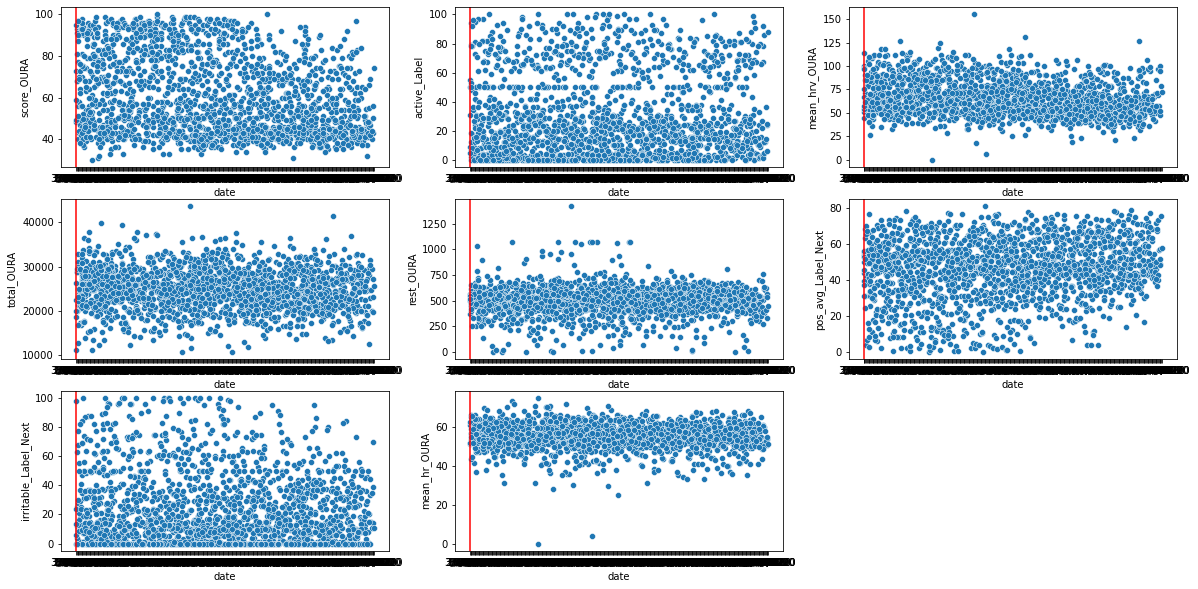

In [43]:
#plot
normalized_df=data[['score_OURA', 'active_Label', 'mean_hrv_OURA', 'total_OURA', 'rest_OURA', 'pos_avg_Label_Next', 'irritable_Label_Next', 'mean_hr_OURA']]
count=1
plt.subplots(figsize=(20, 10))
for i in normalized_df.columns:
    plt.subplot(3,3,count)
    plt.axvline("3/19/2020", color='red')
    sns.scatterplot(data["date"], normalized_df[i])
    count+=1

plt.show()

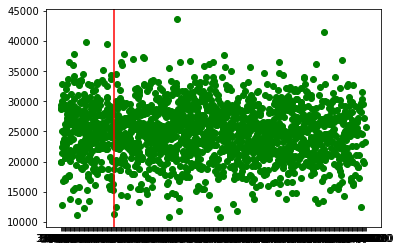

In [49]:
plt.plot(data['date'], data['total_OURA'], 'o', color='green')
plt.axvline("3/19/2020", color='red')

plt.show()

In [ ]:
#plot
normalized_df=data[['score_OURA', 'active_Label', 'mean_hrv_OURA', 'total_OURA', 'rest_OURA', 'pos_avg_Label_Next', 'irritable_Label_Next', 'mean_hr_OURA']]
count=1
for i in normalized_df.columns:


plt.show()

In [26]:
#  data.drop(data.columns[len(data.columns)-1], axis=1, inplace=True)

In [29]:
# data.to_csv('final.csv', sep='\t', encoding='utf-8')

In [6]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
https://sparkbyexamples.com/pandas/pandas-convert-integer-to-datetime/

In [ ]:
https://www.tutorialspoint.com/How-to-convert-an-integer-into-a-date-object-in-Python

In [14]:
data = data.drop('date', axis=1)

In [53]:
data = data.drop('day_sin', axis=1)
data = data.drop('day_cos', axis=1)

In [14]:
data.head()

date  pos_avg_Label  neg_avg_Label  distressed_Label  upset_Label  \
0  3/16/2020           50.0           50.0              50.0         50.0   
1  2/22/2020            1.1           19.2             100.0          1.0   
2  7/10/2020            8.7           30.4              99.0        100.0   
3  9/11/2020           41.2            6.0              17.0         14.0   
4  8/19/2020           52.0            8.1              34.0         27.0   

   guilty_Label  scared_Label  hostile_Label  irritable_Label  ashamed_Label  \
0          50.0          50.0           50.0             50.0           50.0   
1           2.0           3.0            1.0              0.0            0.0   
2           0.0           7.0           32.0             30.0            0.0   
3          17.0           2.0            2.0              0.0            3.0   
4           0.0           2.0            0.0             16.0            0.0   

   ...  HRV_SD1  HRV_SD2  HRV_SD1SD2     HRV_S    HR  score_OURA_lag  \
0  ...    51.85     73.8         0.7  12181.17  77.1            93.0   
1  ...    51.85     73.8         0.7  12181.17  77.1            93.0   
2  ...    51.85     73.8         0.7  12181.17  77.1            90.0   
3  ...    51.85     73.8         0.7  12181.17  77.1            97.0   
4  ...    51.85     73.8         0.7  12181.17  77.1            90.0   

   distressed_Label_lag  steps_OURA_lag      date1  covid  
0                  50.0          8992.0 2020-03-16      0  
1                  50.0          8992.0 2020-02-22      0  
2                 100.0         19659.0 2020-07-10      1  
3                  99.0         17252.0 2020-09-11      1  
4                  17.0         16939.0 2020-08-19      1  

[5 rows x 130 columns]

In [15]:
data.shape

(1794, 129)

In [16]:
data.dtypes

pos_avg_Label                  float64
neg_avg_Label                  float64
distressed_Label               float64
upset_Label                    float64
guilty_Label                   float64
                             ...      
score_OURA_lag                 float64
distressed_Label_lag           float64
steps_OURA_lag                 float64
date1                   datetime64[ns]
covid                            int64
Length: 129, dtype: object

In [ ]:
# pd.DataFrame(d.items(), columns=['Date', 'DateValue'])

In [16]:
data.dropna() 

pos_avg_Label  neg_avg_Label  distressed_Label  upset_Label  \
0              50.0           50.0              50.0         50.0   
1               1.1           19.2             100.0          1.0   
2               8.7           30.4              99.0        100.0   
3              41.2            6.0              17.0         14.0   
4              52.0            8.1              34.0         27.0   
...             ...            ...               ...          ...   
1789           54.8           11.3              20.0         13.0   
1790           62.6           20.5              10.0         51.0   
1791           43.4           16.7              26.0         13.0   
1792           69.8           27.0              65.0         24.0   
1793           68.1            9.4              13.0         11.0   

      guilty_Label  scared_Label  hostile_Label  irritable_Label  \
0             50.0          50.0           50.0             50.0   
1              2.0           3.0            1.0              0.0   
2              0.0           7.0           32.0             30.0   
3             17.0           2.0            2.0              0.0   
4              0.0           2.0            0.0             16.0   
...            ...           ...            ...              ...   
1789           9.0           8.0            7.0             13.0   
1790           9.0          13.0           12.0             80.0   
1791          12.0          15.0           11.0             36.0   
1792          18.0          25.0           21.0             25.0   
1793           9.0           5.0            8.0             10.0   

      ashamed_Label  nervous_Label  ...    HRV_SD1     HRV_SD2  HRV_SD1SD2  \
0              50.0           50.0  ...  51.850000   73.800000    0.700000   
1               0.0           81.0  ...  51.850000   73.800000    0.700000   
2               0.0           21.0  ...  51.850000   73.800000    0.700000   
3               3.0            0.0  ...  51.850000   73.800000    0.700000   
4               0.0            0.0  ...  51.850000   73.800000    0.700000   
...             ...            ...  ...        ...         ...         ...   
1789            9.0           10.0  ...  64.302897  163.686114    0.909038   
1790            9.0            4.0  ...  64.302897  163.686114    0.909038   
1791            9.0           21.0  ...  64.302897  163.686114    0.909038   
1792           25.0           19.0  ...  64.302897  163.686114    0.909038   
1793            7.0           11.0  ...  94.149540  163.686114    0.575183   

            HRV_S    HR  score_OURA_lag  distressed_Label_lag  steps_OURA_lag  \
0     12181.17000  77.1            93.0                  50.0          8992.0   
1     12181.17000  77.1            93.0                  50.0          8992.0   
2     12181.17000  77.1            90.0                 100.0         19659.0   
3     12181.17000  77.1            97.0                  99.0         17252.0   
4     12181.17000  77.1            90.0                  17.0         16939.0   
...           ...   ...             ...                   ...             ...   
1789  48414.99756  85.0            57.0                  39.0          8146.0   
1790  48414.99756  85.0            50.0                  20.0           955.0   
1791  48414.99756  85.0            46.0                  10.0          3820.0   
1792  48414.99756  85.0            57.0                  26.0          4748.0   
1793  48414.99756  76.0            84.0                  65.0          7532.0   

          date1  covid  
0    2020-03-16      0  
1    2020-02-22      0  
2    2020-07-10      1  
3    2020-09-11      1  
4    2020-08-19      1  
...         ...    ...  
1789 2020-04-16      1  
1790 2020-12-22      0  
1791 2021-01-10      0  
1792 2020-01-23      0  
1793 2020-10-03      0  

[1794 rows x 129 columns]

In [17]:
data.dtypes

pos_avg_Label                  float64
neg_avg_Label                  float64
distressed_Label               float64
upset_Label                    float64
guilty_Label                   float64
                             ...      
score_OURA_lag                 float64
distressed_Label_lag           float64
steps_OURA_lag                 float64
date1                   datetime64[ns]
covid                            int64
Length: 129, dtype: object

In [18]:
data.head(10)

date  pos_avg_Label  neg_avg_Label  distressed_Label  upset_Label  \
0  3/16/2020          50.00           50.0              50.0         50.0   
1  2/22/2020           1.10           19.2             100.0          1.0   
2  7/10/2020           8.70           30.4              99.0        100.0   
3  9/11/2020          41.20            6.0              17.0         14.0   
4  8/19/2020          52.00            8.1              34.0         27.0   
5   8/3/2020          11.20           36.6              76.0         99.0   
6   2/8/2020          25.30           12.3               0.0          0.0   
7  3/28/2020          17.55           16.1               1.0          2.5   
8   4/6/2020           2.10           55.9             100.0        100.0   
9  6/13/2020          36.60           18.6               0.0         19.0   

   guilty_Label  scared_Label  hostile_Label  irritable_Label  ashamed_Label  \
0          50.0          50.0           50.0             50.0           50.0   
1           2.0           3.0            1.0              0.0            0.0   
2           0.0           7.0           32.0             30.0            0.0   
3          17.0           2.0            2.0              0.0            3.0   
4           0.0           2.0            0.0             16.0            0.0   
5          21.0           0.0           50.0             86.0           15.0   
6          84.0           0.0            0.0              0.0           39.0   
7          97.5           2.5            2.5              1.0            1.0   
8          51.0          99.0            4.0              3.0            2.0   
9          69.0           5.0            3.0              3.0           72.0   

   ...  HRV_SD1  HRV_SD2  HRV_SD1SD2     HRV_S    HR  score_OURA_lag  \
0  ...    51.85     73.8         0.7  12181.17  77.1            93.0   
1  ...    51.85     73.8         0.7  12181.17  77.1            93.0   
2  ...    51.85     73.8         0.7  12181.17  77.1            90.0   
3  ...    51.85     73.8         0.7  12181.17  77.1            97.0   
4  ...    51.85     73.8         0.7  12181.17  77.1            90.0   
5  ...    51.85     73.8         0.7  12181.17  77.1            64.0   
6  ...    51.85     73.8         0.7  12181.17  77.1            96.0   
7  ...    51.85     73.8         0.7  12181.17  77.1            98.0   
8  ...    51.85     73.8         0.7  12181.17  77.1            94.0   
9  ...    51.85     73.8         0.7  12181.17  77.1            94.0   

   distressed_Label_lag  steps_OURA_lag  covid                date1  
0                  50.0          8992.0      0  1584316800000000000  
1                  50.0          8992.0      0  1582329600000000000  
2                 100.0         19659.0      1  1594339200000000000  
3                  99.0         17252.0      1  1599782400000000000  
4                  17.0         16939.0      1  1597795200000000000  
5                  34.0         11197.0      1  1596412800000000000  
6                  76.0         14624.0      0  1581120000000000000  
7                   0.0         14819.0      1  1585353600000000000  
8                   1.0         14014.0      1  1586131200000000000  
9                 100.0          4840.0      1  1592006400000000000  

[10 rows x 130 columns]

In [17]:
data['date1'] = data['date1'].apply(lambda x: x.value)

In [18]:
#normalized

normalized_df=(data-data.min())/(data.max()-data.min())

In [20]:
data = normalized_df

In [20]:
data.dtypes

pos_avg_Label           float64
neg_avg_Label           float64
distressed_Label        float64
upset_Label             float64
guilty_Label            float64
                         ...   
score_OURA_lag          float64
distressed_Label_lag    float64
steps_OURA_lag          float64
date1                     int64
covid                     int64
Length: 129, dtype: object

In [20]:
data_nc = normalized_df.loc[normalized_df['covid'] == 0]

In [21]:
data_nc

pos_avg_Label  neg_avg_Label  distressed_Label  upset_Label  \
0          0.618047       0.509165              0.50         0.50   
1          0.013597       0.195519              1.00         0.01   
6          0.312732       0.125255              0.00         0.00   
13         0.171817       0.684318              0.17         0.73   
17         0.254635       0.598778              0.22         0.99   
...             ...            ...               ...          ...   
1787       0.726823       0.255601              0.37         0.31   
1790       0.773795       0.208758              0.10         0.51   
1791       0.536465       0.170061              0.26         0.13   
1792       0.862794       0.274949              0.65         0.24   
1793       0.841780       0.095723              0.13         0.11   

      guilty_Label  scared_Label  hostile_Label  irritable_Label  \
0             0.50          0.50           0.50             0.50   
1             0.02          0.03           0.01             0.00   
6             0.84          0.00           0.00             0.00   
13            0.82          0.86           0.00             0.84   
17            0.91          0.02           0.03             0.97   
...            ...           ...            ...              ...   
1787          0.26          0.30           0.28             0.22   
1790          0.09          0.13           0.12             0.80   
1791          0.12          0.15           0.11             0.36   
1792          0.18          0.25           0.21             0.25   
1793          0.09          0.05           0.08             0.10   

      ashamed_Label  nervous_Label  ...   HRV_SD1   HRV_SD2  HRV_SD1SD2  \
0              0.50           0.50  ...  0.010621  0.021500    0.407797   
1              0.00           0.81  ...  0.010621  0.021500    0.407797   
6              0.39           0.00  ...  0.010621  0.021500    0.407797   
13             0.86           1.00  ...  0.010621  0.021500    0.407797   
17             0.89           0.95  ...  0.022392  0.035402    0.445259   
...             ...            ...  ...       ...       ...         ...   
1787           0.21           0.23  ...  0.014419  0.047686    0.584636   
1790           0.09           0.04  ...  0.014419  0.047686    0.584636   
1791           0.09           0.21  ...  0.014419  0.047686    0.584636   
1792           0.25           0.19  ...  0.014419  0.047686    0.584636   
1793           0.07           0.11  ...  0.023521  0.047686    0.302206   

         HRV_S        HR  score_OURA_lag  distressed_Label_lag  \
0     0.000296  0.697107        0.900000                  0.50   
1     0.000296  0.697107        0.900000                  0.50   
6     0.000296  0.697107        0.942857                  0.76   
13    0.000296  0.697107        0.285714                  0.98   
17    0.000925  0.524412        0.914286                  1.00   
...        ...       ...             ...                   ...   
1787  0.001316  0.768535        0.400000                  0.51   
1790  0.001316  0.768535        0.285714                  0.20   
1791  0.001316  0.768535        0.228571                  0.10   
1792  0.001316  0.768535        0.385714                  0.26   
1793  0.001316  0.687161        0.771429                  0.65   

      steps_OURA_lag     date1  covid  
0           0.309717  0.153226    0.0  
1           0.309717  0.091398    0.0  
6           0.503703  0.053763    0.0  
13          0.047015  0.029570    0.0  
17          0.376675  0.069892    0.0  
...              ...       ...    ...  
1787        0.182413  0.061828    0.0  
1790        0.032894  0.908602    0.0  
1791        0.131574  0.959677    0.0  
1792        0.163538  0.010753    0.0  
1793        0.259429  0.693548    0.0  

[752 rows x 129 columns]

In [8]:
df1 = data.head(2000)

In [9]:
data = df1

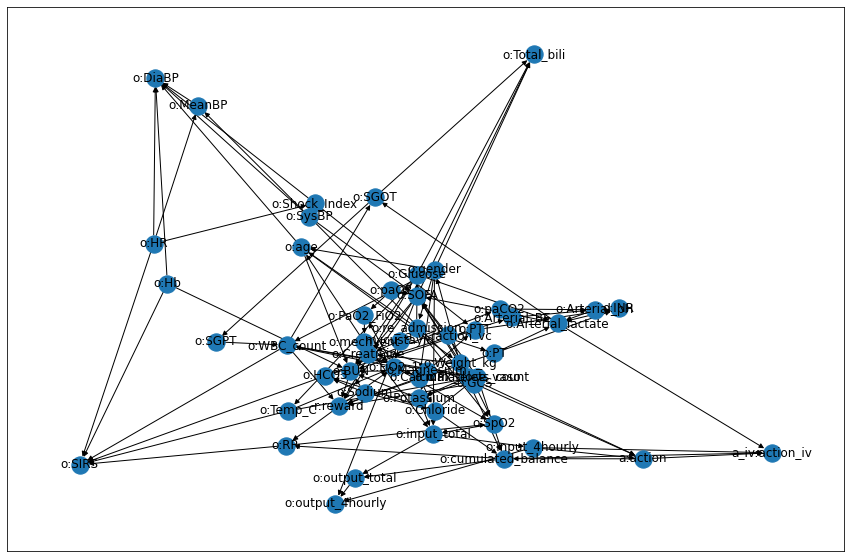

In [10]:


# Infer the causal diagram 
pc_output = PC().create_graph_from_data(data)

# Visualize the diagram 
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(pc_output)
plt.show()

In [11]:
pc_output.edges #checkl

OutEdgeView([('m:icustayid', 'o:FiO2_1'), ('m:icustayid', 'o:Creatinine'), ('o:gender', 'o:re_admission'), ('o:gender', 'o:age'), ('o:gender', 'o:Calcium'), ('o:gender', 'o:WBC_count'), ('o:gender', 'o:Total_bili'), ('o:gender', 'o:input_total'), ('o:mechvent', 'o:age'), ('o:mechvent', 'o:FiO2_1'), ('o:mechvent', 'o:Creatinine'), ('o:mechvent', 'o:input_total'), ('o:max_dose_vaso', 'o:Potassium'), ('o:max_dose_vaso', 'o:WBC_count'), ('o:max_dose_vaso', 'o:SOFA'), ('o:max_dose_vaso', 'a:action'), ('o:re_admission', 'o:age'), ('o:re_admission', 'o:Glucose'), ('o:re_admission', 'o:PT'), ('o:re_admission', 'o:SpO2'), ('o:age', 'o:Weight_kg'), ('o:age', 'o:DiaBP'), ('o:age', 'o:BUN'), ('o:Weight_kg', 'o:gender'), ('o:Weight_kg', 'o:cumulated_balance'), ('o:Weight_kg', 'o:Creatinine'), ('o:GCS', 'o:mechvent'), ('o:GCS', 'o:SOFA'), ('o:GCS', 'o:SpO2'), ('o:GCS', 'a:action'), ('o:GCS', 'r:reward'), ('o:HR', 'o:MeanBP'), ('o:HR', 'o:DiaBP'), ('o:HR', 'o:SIRS'), ('o:HR', 'o:Shock_Index'), ('o:Sy

In [24]:
data.shape

(1794, 129)

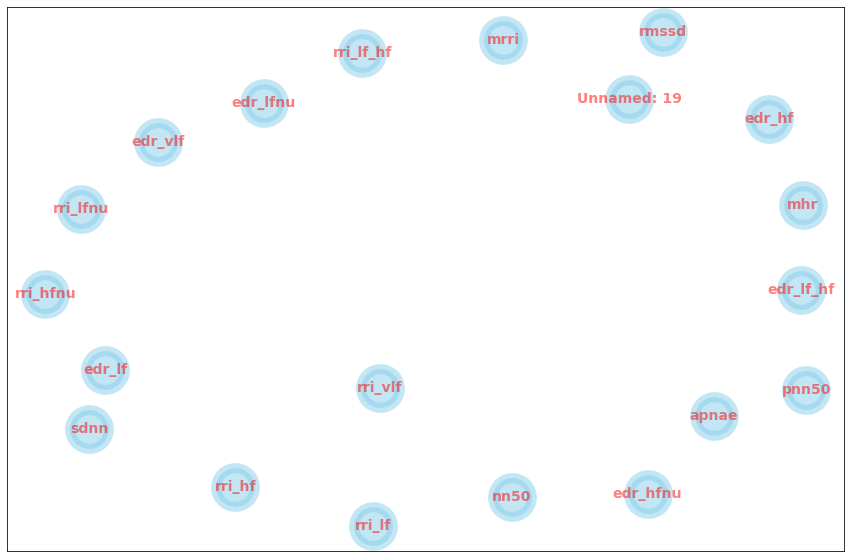

In [8]:


# Infer the causal diagram 
pc_output = PC().create_graph_from_data(data)

# Visualize the diagram 
fig=plt.figure(figsize=(15,10))
# nx.draw_networkx(pc_output)
# plt.show()

# All together we can do something fancy
pos = nx.spring_layout(pc_output, k=1, iterations=20)
nx.draw_networkx(pc_output, pos, with_labels=True, node_size=1500, node_color="skyblue", node_shape="o", alpha=0.5, linewidths=10, font_size=14, 
        font_color="r", font_weight="bold", width=5, edge_color="b", style="solid", arrowsize=30, arrowstyle='fancy')
plt.show()

   pos_avg_Label  neg_avg_Label  distressed_Label  upset_Label  guilty_Label  \
0           50.0           50.0              50.0         50.0          50.0   
1            1.1           19.2             100.0          1.0           2.0   
2            8.7           30.4              99.0        100.0           0.0   
3           41.2            6.0              17.0         14.0          17.0   
4           52.0            8.1              34.0         27.0           0.0   

   scared_Label  hostile_Label  irritable_Label  ashamed_Label  nervous_Label  \
0          50.0           50.0             50.0           50.0           50.0   
1           3.0            1.0              0.0            0.0           81.0   
2           7.0           32.0             30.0            0.0           21.0   
3           2.0            2.0              0.0            3.0            0.0   
4           2.0            0.0             16.0            0.0            0.0   

   ...  mean_hrv_OURA  score_OUR

KeyboardInterrupt: 

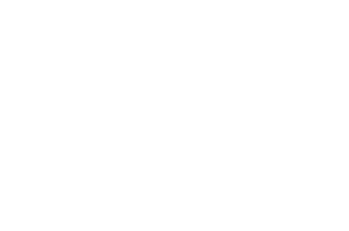

In [11]:
import cdt
from cdt import SETTINGS
SETTINGS.verbose=True
import networkx as nx
import matplotlib.pyplot as plt
plt.axis('off')

#Load Data
# data = pd.read_csv('outf.csv')
print(data.head())

#Finding the Structure of the graph

glasso = cdt.independence.graph.Glasso()
skeleton = glasso.predict(X)

#Pairwise Setting
model = cdt.causality.pairwise.ANM()
output_graph = model.predict(data, skeleton)

#Visualize causality graph

options = {
    "node_color": "#A0CBE2",
    "width": 1,
    "node_size": 400,
    "edge_cmap": plt.cm.Blues,
    "with_labels": True
}

nx.draw_networkx(output_graph, **options)

In [11]:
output_graph.edges()

OutEdgeView([('rmssd', 'sdnn'), ('rmssd', 'mrri'), ('rmssd', 'rri_hf'), ('rmssd', 'edr_lf_hf'), ('rmssd', 'pnn50'), ('rmssd', 'rri_vlf'), ('rmssd', 'apnae'), ('sdnn', 'pnn50'), ('sdnn', 'mhr'), ('sdnn', 'rri_lf'), ('sdnn', 'rri_lf_hf'), ('sdnn', 'rri_hfnu'), ('sdnn', 'rri_lfnu'), ('sdnn', 'edr_hfnu'), ('mrri', 'pnn50'), ('mrri', 'nn50'), ('mrri', 'rri_hf'), ('mrri', 'rri_hfnu'), ('mrri', 'edr_lfnu'), ('mrri', 'rri_lfnu'), ('mrri', 'edr_hfnu'), ('rri_hf', 'mhr'), ('rri_hf', 'sdnn'), ('edr_vlf', 'rmssd'), ('edr_vlf', 'rri_lf_hf'), ('edr_vlf', 'nn50'), ('edr_lf_hf', 'sdnn'), ('pnn50', 'nn50'), ('pnn50', 'rri_lfnu'), ('mhr', 'pnn50'), ('mhr', 'edr_lf'), ('mhr', 'edr_lf_hf'), ('mhr', 'apnae'), ('rri_lf', 'mhr'), ('rri_lf', 'edr_hf'), ('rri_lf', 'rri_hf'), ('rri_lf', 'edr_vlf'), ('rri_lf_hf', 'mhr'), ('rri_lf_hf', 'rri_lfnu'), ('rri_hfnu', 'rri_lf'), ('rri_hfnu', 'rri_hf'), ('rri_hfnu', 'apnae'), ('edr_hf', 'sdnn'), ('edr_hf', 'rri_vlf'), ('edr_hf', 'edr_vlf'), ('apnae', 'sdnn'), ('apnae', '

In [22]:
np.isnan(data.any()) #and gets False

pos_avg_Label        False
neg_avg_Label        False
distressed_Label     False
upset_Label          False
guilty_Label         False
                     ...  
Pressure_WATCH       False
avgPressure_WATCH    False
minPressure_WATCH    False
maxPressure_WATCH    False
weekday_EXT          False
Length: 116, dtype: bool

In [19]:
data.columns

Index(['pos_avg_Label', 'neg_avg_Label', 'distressed_Label', 'upset_Label',
       'guilty_Label', 'scared_Label', 'hostile_Label', 'irritable_Label',
       'ashamed_Label', 'nervous_Label',
       ...
       'DISTANCE_WATCH', 'WALKSTEPS_WATCH', 'RunSteps_WATCH', 'calorie_WATCH',
       'remains_WATCH', 'Pressure_WATCH', 'avgPressure_WATCH',
       'minPressure_WATCH', 'maxPressure_WATCH', 'weekday_EXT'],
      dtype='object', length=115)

In [ ]:

# df_all_ekh1 = data_.filter(["2LagY", "1LagY", "C060008", "T06237_96_lag_mean", "F06257_96_lag_mean", "day_sin", "day_cos", "T06224_48_lag_mean", "T06236_96_lag_mean", "T06163D_48_lag_mean", "A06281DE"], axis=1)

In [12]:
#Remove high correlated columns by 0.95 threshold
x=data
cor_matrix = x.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
x_ = x.drop(x[to_drop], axis=1)

In [13]:
import numpy as np
import pandas as pd
from sklearn import covariance, preprocessing

# myData  = pd.read_csv('outf.csv')
# myData.dropna() 
myData = x_

X = myData.values.astype('float64')
myScaler = preprocessing.StandardScaler() #new_df = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns, index=df.index)
X = myScaler.fit_transform(X)
emp_cov = covariance.empirical_covariance(X)
shrunk_cov = covariance.shrunk_covariance(emp_cov, shrinkage=0.98) # Set shrinkage closer to 1 for poorly-conditioned data

alphaRange = 10.0 ** np.arange(-8,0) # 1e-7 to 1e-1 by order of magnitude
for alpha in alphaRange:
    try: 
        graphCov = covariance.graphical_lasso(shrunk_cov, alpha, max_iter=2000)
        print("Calculated graph-lasso covariance matrix for alpha=%s"%alpha)
    except FloatingPointError:
        print("Failed at alpha=%s"%alpha)
X = pd.DataFrame(X,columns = myData.columns)

Calculated graph-lasso covariance matrix for alpha=1e-08
Calculated graph-lasso covariance matrix for alpha=1e-07
Calculated graph-lasso covariance matrix for alpha=1e-06
Calculated graph-lasso covariance matrix for alpha=1e-05
Calculated graph-lasso covariance matrix for alpha=0.0001
Calculated graph-lasso covariance matrix for alpha=0.001
Calculated graph-lasso covariance matrix for alpha=0.01
Calculated graph-lasso covariance matrix for alpha=0.1


In [31]:
# np.where(np.isnan(data)) 
data.isnull().values.any()

False

In [14]:
data = data.dropna()

In [20]:
data.isnull().sum().sum()

0

In [7]:
data = data.apply(pd.to_numeric, errors='coerce')

In [22]:
data.dtypes

date                       int64
pos_avg_Label            float64
neg_avg_Label            float64
distressed_Label         float64
upset_Label              float64
                          ...   
step_count_PERSONICLE    float64
score_OURA_lag           float64
distressed_Label_lag     float64
steps_OURA_lag           float64
date1                      int64
Length: 64, dtype: object

In [23]:
data.head(10)

date  pos_avg_Label  neg_avg_Label  distressed_Label  upset_Label  \
0     0          50.00           50.0              50.0         50.0   
1     0           1.10           19.2             100.0          1.0   
2     1           8.70           30.4              99.0        100.0   
3     1          41.20            6.0              17.0         14.0   
4     1          52.00            8.1              34.0         27.0   
5     1          11.20           36.6              76.0         99.0   
6     0          25.30           12.3               0.0          0.0   
7     1          17.55           16.1               1.0          2.5   
8     1           2.10           55.9             100.0        100.0   
9     1          36.60           18.6               0.0         19.0   

   guilty_Label  scared_Label  hostile_Label  irritable_Label  ashamed_Label  \
0          50.0          50.0           50.0             50.0           50.0   
1           2.0           3.0            1.0              0.0            0.0   
2           0.0           7.0           32.0             30.0            0.0   
3          17.0           2.0            2.0              0.0            3.0   
4           0.0           2.0            0.0             16.0            0.0   
5          21.0           0.0           50.0             86.0           15.0   
6          84.0           0.0            0.0              0.0           39.0   
7          97.5           2.5            2.5              1.0            1.0   
8          51.0          99.0            4.0              3.0            2.0   
9          69.0           5.0            3.0              3.0           72.0   

   ...  daily_movement_OURA  inactivity_alerts_OURA  steps_OURA  rest_OURA  \
0  ...               6130.0                     0.0      8992.0      448.0   
1  ...              14654.0                     0.0     19659.0      456.0   
2  ...              13442.0                     0.0     17252.0      562.0   
3  ...              13900.0                     0.0     16939.0      574.0   
4  ...               7950.0                     0.0     11197.0      442.0   
5  ...              11047.0                     1.0     14624.0      507.0   
6  ...              11134.0                     0.0     14819.0      593.0   
7  ...              11357.0                     0.0     14014.0      252.0   
8  ...               3489.0                     1.0      4840.0      624.0   
9  ...               4137.0                     0.0      5534.0      724.0   

   inactive_OURA  step_count_PERSONICLE  score_OURA_lag  distressed_Label_lag  \
0          643.0            2682.999024            93.0                  50.0   
1          412.0            2171.500000            93.0                  50.0   
2          488.0           11837.000000            90.0                 100.0   
3          350.0           11224.000000            97.0                  99.0   
4          492.0            6844.000000            90.0                  17.0   
5          528.0            6080.000000            64.0                  34.0   
6          418.0            1660.675934            96.0                  76.0   
7          336.0            2682.999999            98.0                   0.0   
8          637.0            1108.750000            94.0                   1.0   
9          480.0            2690.000000            94.0                 100.0   

   steps_OURA_lag                date1  
0          8992.0  1584316800000000000  
1          8992.0  1582329600000000000  
2         19659.0  1594339200000000000  
3         17252.0  1599782400000000000  
4         16939.0  1597795200000000000  
5         11197.0  1596412800000000000  
6         14624.0  1581120000000000000  
7         14819.0  1585353600000000000  
8         14014.0  1586131200000000000  
9          4840.0  1592006400000000000  

[10 rows x 64 columns]

In [26]:
data.columns

Index(['date', 'pos_avg_Label', 'neg_avg_Label', 'distressed_Label',
       'upset_Label', 'guilty_Label', 'scared_Label', 'hostile_Label',
       'irritable_Label', 'ashamed_Label', 'nervous_Label', 'jittery_Label',
       'afraid_Label', 'interested_Label', 'determined_Label',
       'attentive_Label', 'excited_Label', 'active_Label', 'alert_Label',
       'inspired_Label', 'enthusiastic_Label', 'strong_Label', 'proud_Label',
       'pos_avg_Label_Next', 'neg_avg_Label_Next', 'distressed_Label_Next',
       'upset_Label_Next', 'guilty_Label_Next', 'scared_Label_Next',
       'hostile_Label_Next', 'irritable_Label_Next', 'ashamed_Label_Next',
       'nervous_Label_Next', 'jittery_Label_Next', 'afraid_Label_Next',
       'interested_Label_Next', 'determined_Label_Next',
       'attentive_Label_Next', 'excited_Label_Next', 'active_Label_Next',
       'alert_Label_Next', 'inspired_Label_Next', 'enthusiastic_Label_Next',
       'strong_Label_Next', 'proud_Label_Next', 'awake_OURA', 'rem_O

In [34]:
np.nan_to_num(data)

array([[29.92297805, 55.16324576,  7.        , ...,  9.93400803,
        90.06599197,  0.        ],
       [28.18160568, 40.34760968,  4.        , ..., 11.12137921,
        88.87862079,  0.        ],
       [33.97302852, 77.89760285,  7.        , ..., 57.74838035,
        42.25161965,  0.        ],
       ...,
       [22.42185822, 70.80904441,  5.        , ..., 32.53175369,
        67.46824631,  0.        ],
       [15.94744455, 47.74672842,  0.        , ..., 21.59231439,
        78.40768561,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [12]:
X.head(5)

rmssd      sdnn      nn50     pnn50      mrri       mhr   rri_vlf  \
0 -1.265946 -1.620222 -0.678964 -0.890917 -1.276145  1.055803 -1.169422   
1 -1.382671 -1.942300 -1.731860 -1.839514 -2.104287  2.069031 -1.980762   
2 -0.994469 -1.125999 -0.678964 -1.088134 -2.447348  2.649237 -0.564565   
3 -1.694207 -1.512298 -1.731860 -1.965752 -3.273844  3.889568 -0.363197   
4 -1.499951 -1.867801 -1.731860 -1.913387 -2.665004  2.867613 -2.747387   

     rri_lf    rri_hf  rri_lf_hf  rri_lfnu  rri_hfnu   edr_vlf    edr_lf  \
0  0.291894  2.678641  -1.018467 -1.996879  1.996879 -0.552172 -0.447827   
1  0.751066  3.896745  -1.041462 -2.222775  2.222775 -0.892645 -0.290320   
2 -0.422801  2.699590  -1.089362 -2.804905  2.804905  0.809917  3.322046   
3  0.173666  0.624829  -0.753309 -0.573826  0.573826  2.388606  1.112138   
4  3.107322  0.251573   0.254385  0.644051 -0.644051 -0.426048  1.999558   

     edr_hf  edr_lf_hf  edr_lfnu  edr_hfnu     apnae  
0  0.638081  -0.465313 -0.511025  0.511025 -4.973615  
1  0.771091  -0.407483 -0.414357  0.414357 -4.973615  
2 -2.536576   4.433410  3.381733 -3.381733 -4.973615  
3 -2.264703   1.617984  1.871354 -1.871354 -4.973615  
4 -0.916079   1.263602  1.581759 -1.581759 -4.973615

In [52]:


# Infer the causal diagram 
pc_output = PC().create_graph_from_data(X)

# Visualize the diagram 
fig=plt.figure(figsize=(30,15))
# nx.draw_networkx(pc_output)
# plt.show()

# All together we can do something fancy
pos = nx.spring_layout(pc_output, k=1, iterations=20)
nx.draw_networkx(pc_output, pos, with_labels=True, node_size=7000, node_color="skyblue", node_shape="o", alpha=0.5, linewidths=2, font_size=18, 
        font_color="r", font_weight="bold", width=0.5, edge_color="b", style="solid", arrowsize=30, arrowstyle='fancy')
plt.show()

KeyboardInterrupt: 

In [13]:
pc_output.edges()

OutEdgeView([('rmssd', 'sdnn'), ('rmssd', 'nn50'), ('nn50', 'rmssd'), ('nn50', 'sdnn'), ('nn50', 'pnn50'), ('nn50', 'mrri'), ('nn50', 'mhr'), ('nn50', 'rri_lf_hf'), ('pnn50', 'rmssd'), ('pnn50', 'nn50'), ('pnn50', 'mrri'), ('pnn50', 'mhr'), ('mrri', 'nn50'), ('mrri', 'pnn50'), ('mrri', 'mhr'), ('mhr', 'nn50'), ('mhr', 'pnn50'), ('mhr', 'mrri'), ('rri_vlf', 'sdnn'), ('rri_vlf', 'rri_lf'), ('rri_vlf', 'rri_hf'), ('rri_vlf', 'apnae'), ('rri_hf', 'rri_lf_hf'), ('rri_hf', 'rri_lfnu'), ('rri_hf', 'rri_hfnu'), ('rri_hf', 'apnae'), ('rri_lf_hf', 'edr_hf'), ('rri_lf_hf', 'apnae'), ('rri_lfnu', 'rri_lf'), ('rri_lfnu', 'rri_hf'), ('rri_lfnu', 'rri_lf_hf'), ('rri_lfnu', 'rri_hfnu'), ('rri_lfnu', 'edr_hf'), ('rri_hfnu', 'rri_lf'), ('rri_hfnu', 'rri_hf'), ('rri_hfnu', 'rri_lf_hf'), ('rri_hfnu', 'rri_lfnu'), ('rri_hfnu', 'edr_hf'), ('edr_vlf', 'edr_lf'), ('edr_vlf', 'edr_hf'), ('edr_lf', 'edr_lf_hf'), ('edr_hf', 'sdnn'), ('edr_hf', 'edr_lf'), ('edr_hf', 'edr_lf_hf'), ('edr_lf_hf', 'edr_lf'), ('edr_lf

In [ ]:
# G = nx.erdos_renyi_graph(20, 0.1)
# color_map = []
# for node in G:
#     if node < 10:
#         color_map.append('blue')
#     else: 
#         color_map.append('green')      
# nx.draw(G, node_color=color_map, with_labels=True)
# plt.show()

In [14]:
X.head(1)

rmssd      sdnn      nn50     pnn50      mrri       mhr   rri_vlf  \
0  0.080306 -0.203342  0.664036  0.525368 -0.085328 -0.073405 -0.566651   

     rri_lf    rri_hf  rri_lf_hf  rri_lfnu  rri_hfnu   edr_vlf    edr_lf  \
0  0.137276  0.836259  -0.645345 -0.857005  0.857005 -0.585689 -0.823273   

     edr_hf  edr_lf_hf  edr_lfnu  edr_hfnu     apnae  
0  0.992707  -0.463127 -0.966735  0.966735 -0.997962

In [15]:
X.shape

(49026, 19)

In [17]:
#Solution #2

# Infer the causal diagram 
pc_output = PC().create_graph_from_data(X)

# Visualize the diagram 
fig=plt.figure(figsize=(30,15))
# nx.draw_networkx(pc_output)
# plt.show()
#color map
G = pc_output.nodes


<Figure size 2160x1080 with 0 Axes>

In [22]:
color_map = ['red' if node == 'apnae' else 'green' for node in G] 

In [23]:
print(color_map)

['green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'red']


In [43]:
# print(nx.get_node_attributes)

<function get_node_attributes at 0x000001997FCA8AF0>


In [53]:
#Solution #2

# Infer the causal diagram 
pc_output = PC().create_graph_from_data(X)

# Visualize the diagram 
fig=plt.figure(figsize=(30,15))
# nx.draw_networkx(pc_output)
# plt.show()
#color map
G = pc_output.nodes
color_map = ['blue' if node == 'apnae' else 'green' for node in G]  
# All together we can do something fancy
pos = nx.spring_layout(pc_output, k=1, iterations=20)
nx.draw_networkx(pc_output, pos, node_color=color_map, with_labels=True, node_size=7000, node_shape="o", alpha=0.5, linewidths=2, font_size=18, 
        font_color="r", font_weight="bold", width=0.5, edge_color="b", style="solid", arrowsize=30)
plt.show()

KeyboardInterrupt: 

In [54]:
#Solution #2

# Infer the causal diagram 
pc_output = PC().create_graph_from_data(data)

# Visualize the diagram 
fig=plt.figure(figsize=(30,15))
# nx.draw_networkx(pc_output)
# plt.show()
#color map
G = pc_output.nodes
color_map = ['blue' if node == 'apnae' else 'green' for node in G]  
# All together we can do something fancy
pos = nx.spring_layout(pc_output, k=1, iterations=20)
nx.draw_networkx(pc_output, pos, node_color=color_map, with_labels=True, node_size=7000, node_shape="o", alpha=0.5, linewidths=2, font_size=18, 
        font_color="r", font_weight="bold", width=0.5, edge_color="b", style="solid", arrowsize=30)
plt.show()

KeyboardInterrupt: 

In [17]:
pc_output.edges()

OutEdgeView([('rmssd', 'sdnn'), ('rmssd', 'nn50'), ('nn50', 'rmssd'), ('nn50', 'sdnn'), ('nn50', 'pnn50'), ('nn50', 'mrri'), ('nn50', 'mhr'), ('nn50', 'rri_lf_hf'), ('pnn50', 'rmssd'), ('pnn50', 'nn50'), ('pnn50', 'mrri'), ('pnn50', 'mhr'), ('mrri', 'nn50'), ('mrri', 'pnn50'), ('mrri', 'mhr'), ('mhr', 'nn50'), ('mhr', 'pnn50'), ('mhr', 'mrri'), ('rri_vlf', 'sdnn'), ('rri_vlf', 'rri_lf'), ('rri_vlf', 'rri_hf'), ('rri_vlf', 'apnae'), ('rri_hf', 'rri_lf_hf'), ('rri_hf', 'rri_lfnu'), ('rri_hf', 'rri_hfnu'), ('rri_hf', 'apnae'), ('rri_lf_hf', 'edr_hf'), ('rri_lf_hf', 'apnae'), ('rri_lfnu', 'rri_lf'), ('rri_lfnu', 'rri_hf'), ('rri_lfnu', 'rri_lf_hf'), ('rri_lfnu', 'rri_hfnu'), ('rri_lfnu', 'edr_hf'), ('rri_hfnu', 'rri_lf'), ('rri_hfnu', 'rri_hf'), ('rri_hfnu', 'rri_lf_hf'), ('rri_hfnu', 'rri_lfnu'), ('rri_hfnu', 'edr_hf'), ('edr_vlf', 'edr_lf'), ('edr_vlf', 'edr_hf'), ('edr_lf', 'edr_lf_hf'), ('edr_hf', 'sdnn'), ('edr_hf', 'edr_lf'), ('edr_hf', 'edr_lf_hf'), ('edr_lf_hf', 'edr_lf'), ('edr_lf

In [58]:
# model_pc = cdt.causality.graph.PC()
# model_pc.predict

In [22]:
model_pc = cdt.causality.graph.PC()
# graph_pc = model_pc.predict(df)
graph_pc = model_pc.predict(X, skeleton)

# visualize network
fig=plt.figure(figsize=(30,30))
nx.draw_networkx(graph_pc, font_size=18, font_color='r')

# get adjaceny matrix of PC graph
# A_pc = nx.adjacency_matrix(graph_pc).todense()


R Python Error Output 
-----------------------

[Errno 2] No such file or directory: 'C:\\Users\\19492\\AppData\\Local\\Temp\\cdt_pc_09c1cb71-2d05-42f2-b6c8-20b7c79a3a9f\\result.csv'


RuntimeError: RProcessError 
R Process Error Output 
-----------------------
Warning message:
package 'pcalg' was built under R version 4.1.3 
Warning message:
package 'kpcalg' was built under R version 4.1.3 
Loading required package: momentchi2
Loading required package: MASS
Warning messages:
1: package 'momentchi2' was built under R version 4.1.1 
2: package 'MASS' was built under R version 4.1.3 
Error: cannot allocate vector of size 1024.0 Gb
Execution halted


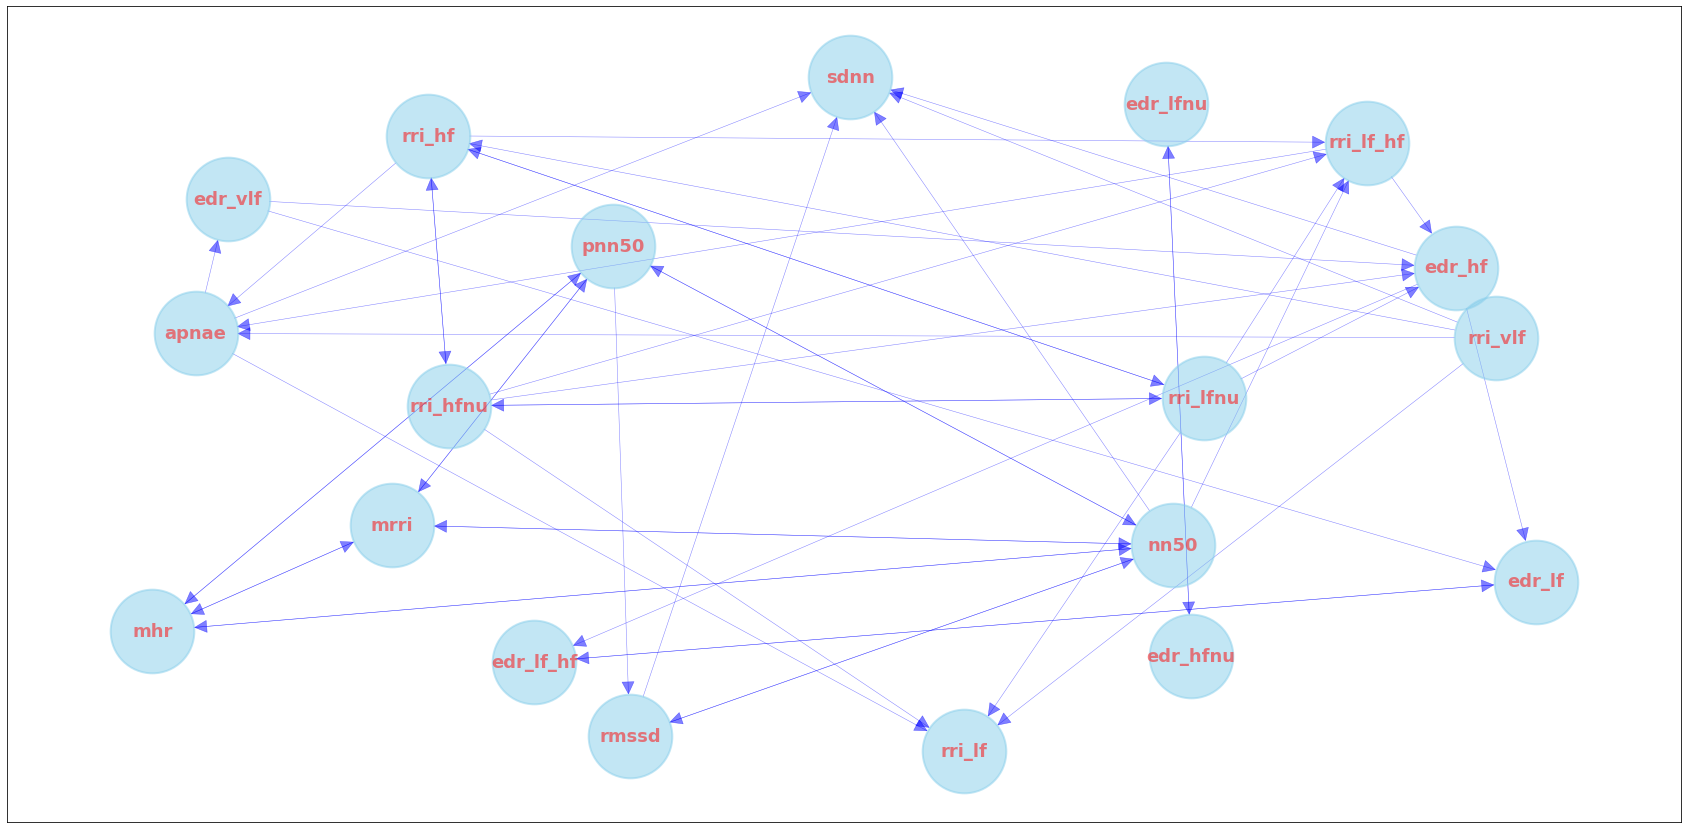

In [37]:
#Solution #2

# Infer the causal diagram 
pc_output = PC().create_graph_from_data(X)

# Visualize the diagram 
fig=plt.figure(figsize=(30,15))
# nx.draw_networkx(pc_output)
# plt.show()

# All together we can do something fancy
pos = nx.spring_layout(pc_output, k=1, iterations=20)
nx.draw_networkx(pc_output, pos, with_labels=True, node_size=7000, node_color="skyblue", node_shape="o", alpha=0.5, linewidths=2, font_size=18, 
        font_color="r", font_weight="bold", width=0.5, edge_color="b", style="solid", arrowsize=30)
plt.show()

In [38]:
pc_output.edges

OutEdgeView([('rmssd', 'sdnn'), ('rmssd', 'nn50'), ('nn50', 'rmssd'), ('nn50', 'sdnn'), ('nn50', 'pnn50'), ('nn50', 'mrri'), ('nn50', 'mhr'), ('nn50', 'rri_lf_hf'), ('pnn50', 'rmssd'), ('pnn50', 'nn50'), ('pnn50', 'mrri'), ('pnn50', 'mhr'), ('mrri', 'nn50'), ('mrri', 'pnn50'), ('mrri', 'mhr'), ('mhr', 'nn50'), ('mhr', 'pnn50'), ('mhr', 'mrri'), ('rri_vlf', 'sdnn'), ('rri_vlf', 'rri_lf'), ('rri_vlf', 'rri_hf'), ('rri_vlf', 'apnae'), ('rri_hf', 'rri_lf_hf'), ('rri_hf', 'rri_lfnu'), ('rri_hf', 'rri_hfnu'), ('rri_hf', 'apnae'), ('rri_lf_hf', 'edr_hf'), ('rri_lf_hf', 'apnae'), ('rri_lfnu', 'rri_lf'), ('rri_lfnu', 'rri_hf'), ('rri_lfnu', 'rri_lf_hf'), ('rri_lfnu', 'rri_hfnu'), ('rri_lfnu', 'edr_hf'), ('rri_hfnu', 'rri_lf'), ('rri_hfnu', 'rri_hf'), ('rri_hfnu', 'rri_lf_hf'), ('rri_hfnu', 'rri_lfnu'), ('rri_hfnu', 'edr_hf'), ('edr_vlf', 'edr_lf'), ('edr_vlf', 'edr_hf'), ('edr_lf', 'edr_lf_hf'), ('edr_hf', 'sdnn'), ('edr_hf', 'edr_lf'), ('edr_hf', 'edr_lf_hf'), ('edr_lf_hf', 'edr_lf'), ('edr_lf

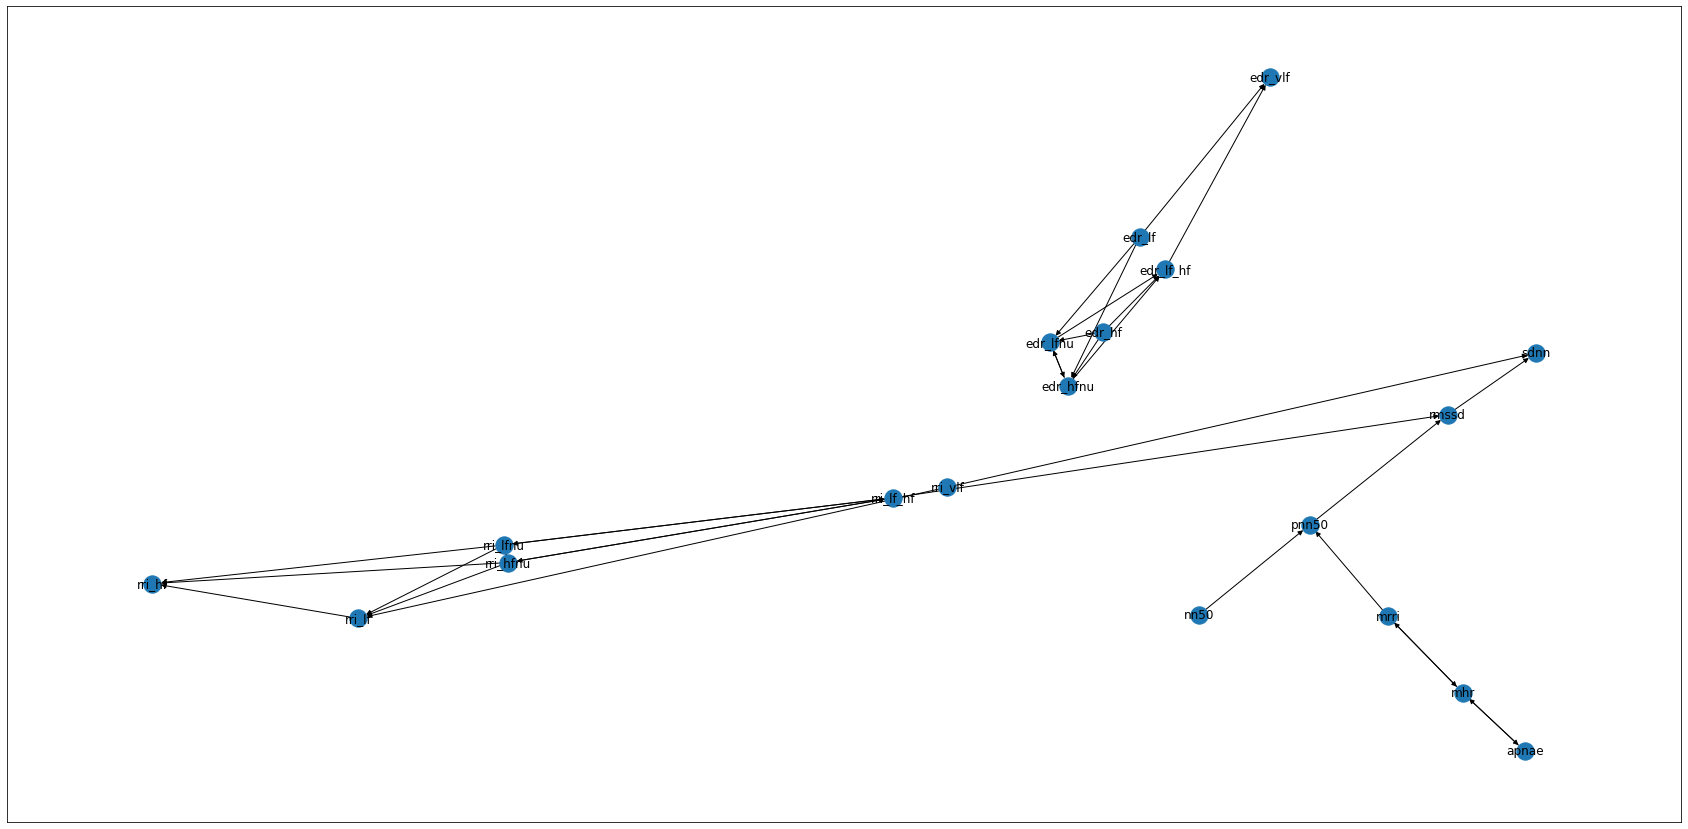

In [21]:

#Solution #3

# Infer the causal diagram 
pc_output = PC().create_graph_from_data(X)

# Visualize the diagram 
fig=plt.figure(figsize=(30,15))
# nx.draw_networkx(pc_output)
# plt.show()

# All together we can do something fancy
pos = nx.spring_layout(pc_output, k=1, iterations=20)
# nx.draw_networkx(pc_output, pos, with_labels=True, node_size=7000, node_color="skyblue", node_shape="o", alpha=0.5, linewidths=2, font_size=18, 
#         font_color="r", font_weight="bold", width=0.5, edge_color="b", style="solid", arrowsize=30)
# plt.show()

df = pd.DataFrame(index=pc_output.nodes(), columns=pc_output.nodes())
for row, data in nx.shortest_path_length(pc_output):
    for col, dist in data.items():
        df.loc[row,col] = dist

df = df.fillna(df.max().max())

layout = nx.kamada_kawai_layout(pc_output, dist=df.to_dict())
nx.draw_networkx(pc_output)
plt.show()

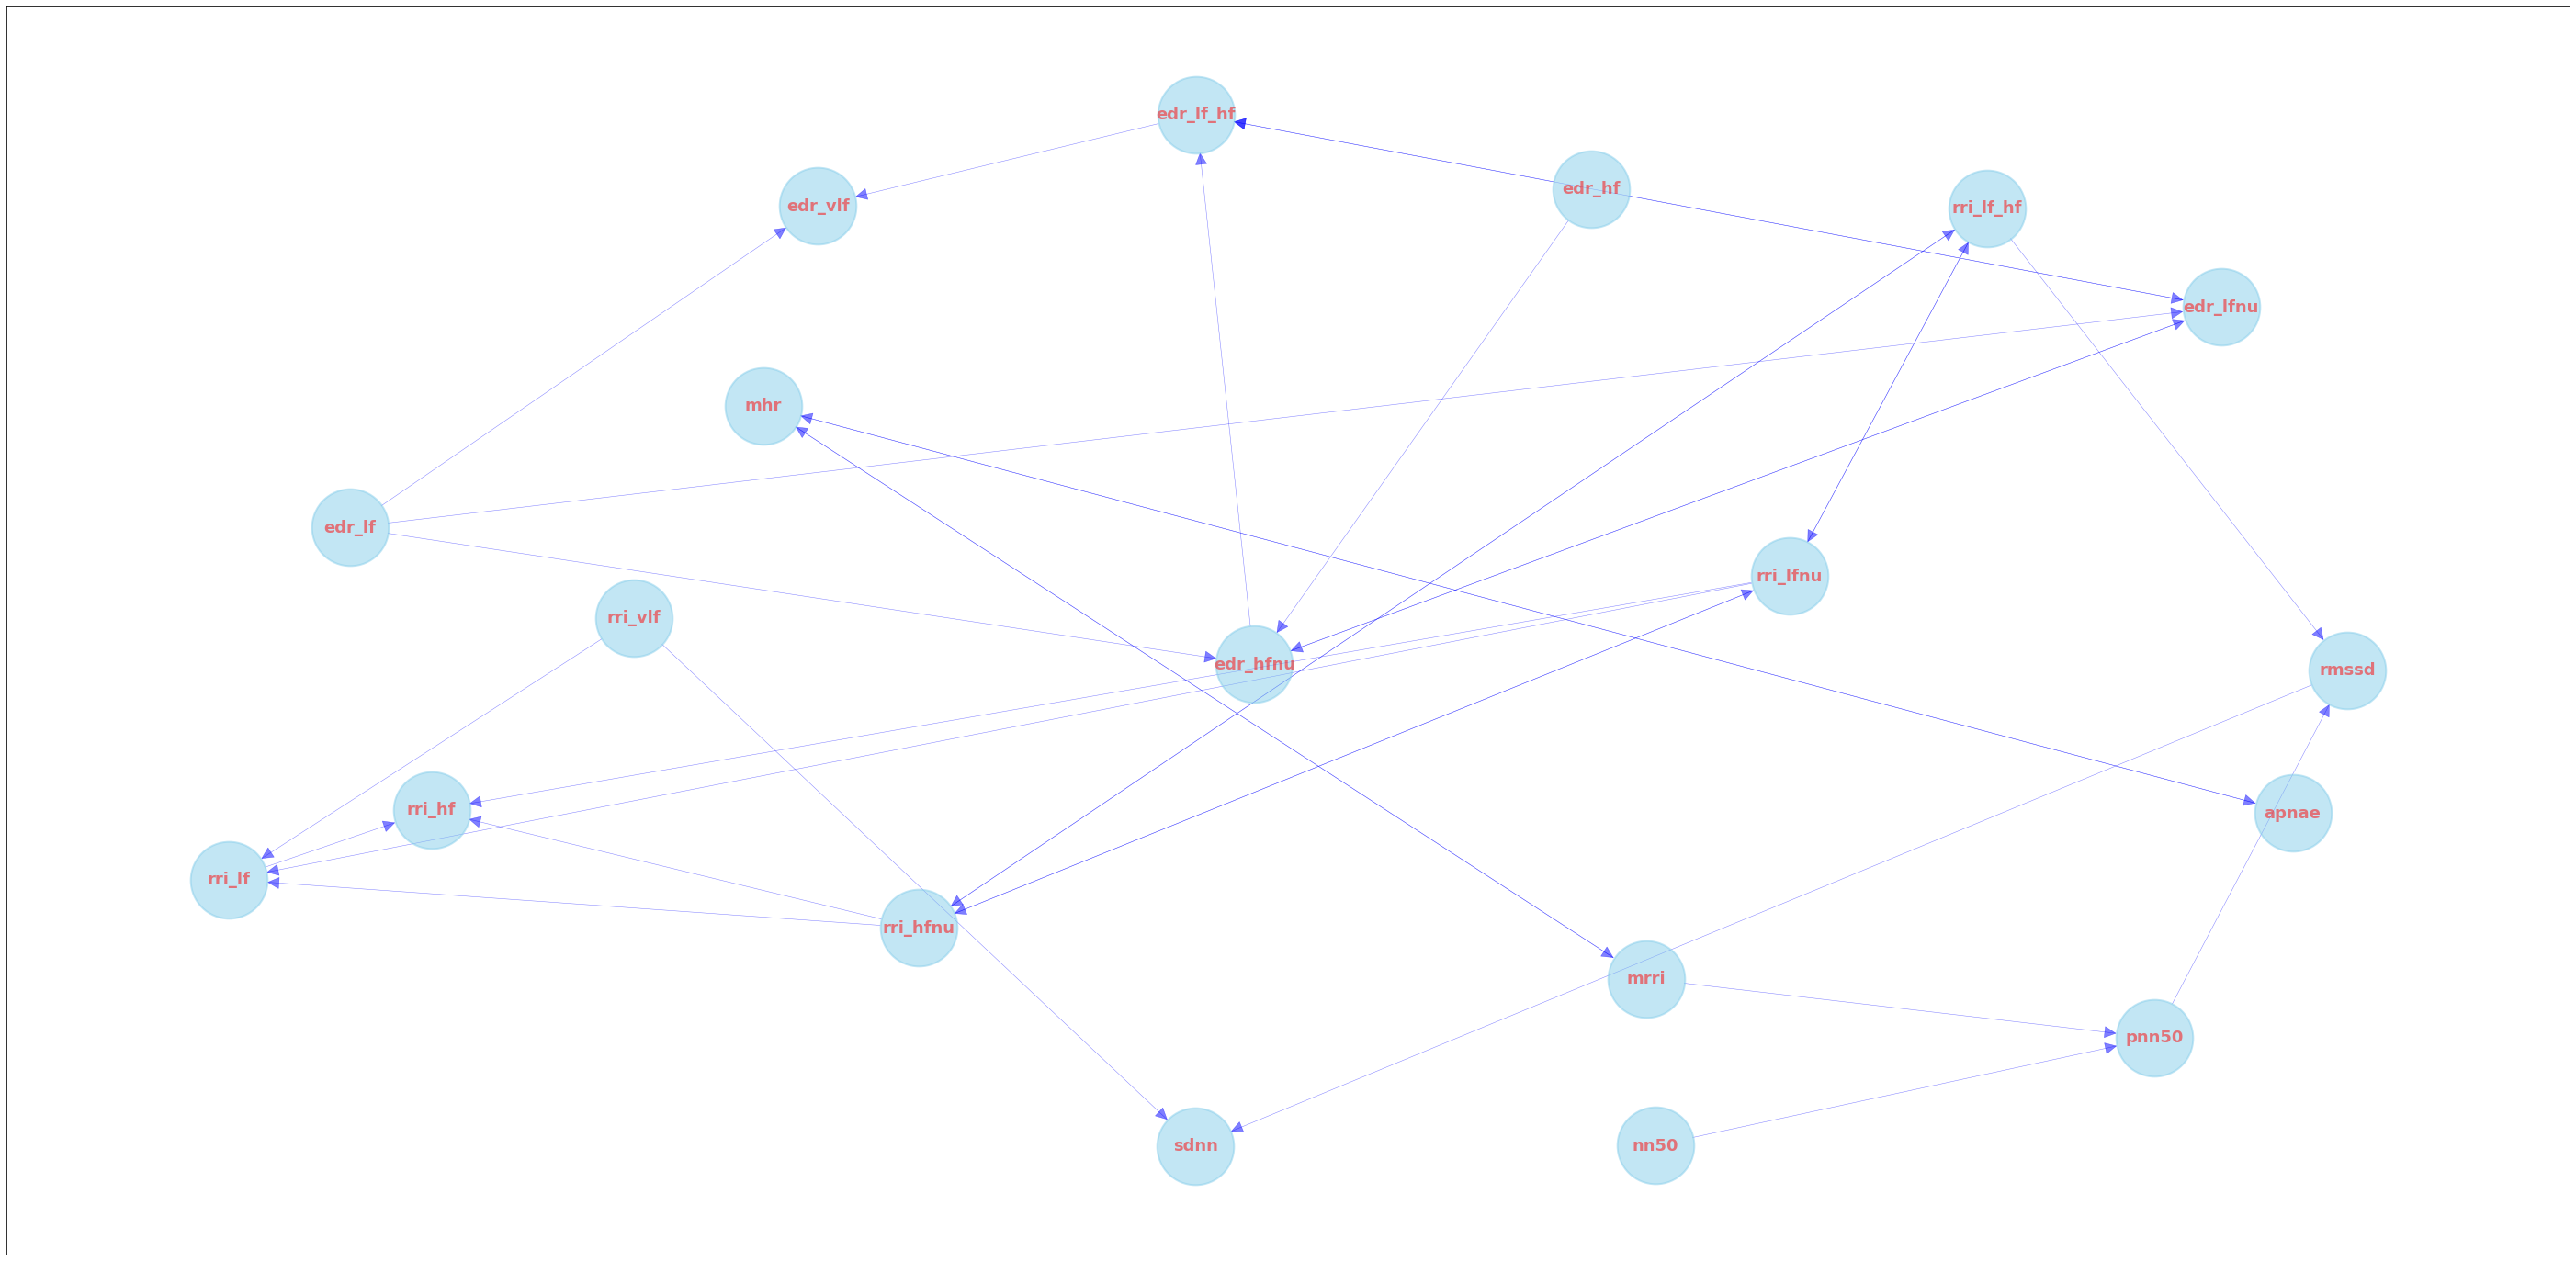

In [22]:
#Solution #3

# Infer the causal diagram 
pc_output = PC().create_graph_from_data(X)

# Visualize the diagram 
fig=plt.figure(figsize=(50,25))
# nx.draw_networkx(pc_output)
# plt.show()

# All together we can do something fancy
pos = nx.spring_layout(pc_output, k=1, iterations=20)
# nx.draw_networkx(pc_output, pos, with_labels=True, node_size=7000, node_color="skyblue", node_shape="o", alpha=0.5, linewidths=2, font_size=18, 
#         font_color="r", font_weight="bold", width=0.5, edge_color="b", style="solid", arrowsize=30)
# plt.show()

df = pd.DataFrame(index=pc_output.nodes(), columns=pc_output.nodes())
for row, data in nx.shortest_path_length(pc_output):
    for col, dist in data.items():
        df.loc[row,col] = dist

df = df.fillna(df.max().max())

layout = nx.kamada_kawai_layout(pc_output, dist=df.to_dict())
nx.draw_networkx(pc_output, pos, with_labels=True, node_size=7000, node_color="skyblue", node_shape="o", alpha=0.5, linewidths=2, font_size=18, 
        font_color="r", font_weight="bold", width=0.5, edge_color="b", style="solid", arrowsize=30)
plt.show()

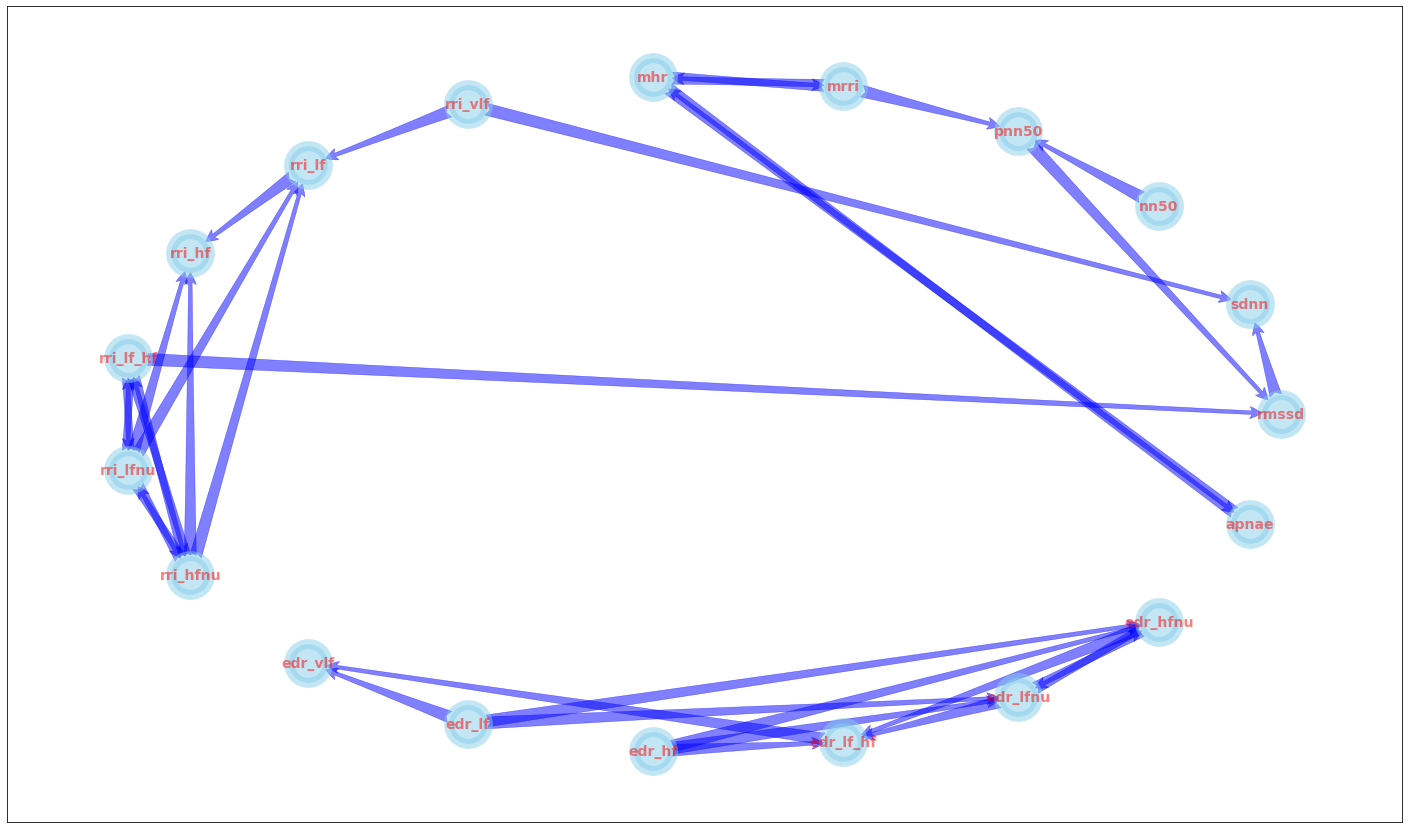

In [23]:
# Infer the causal diagram 
pc_output = PC().create_graph_from_data(X)

# Visualize the diagram 
fig=plt.figure(figsize=(25,15))
# nx.draw_networkx(pc_output)
# plt.show()

# All together we can do something fancy
pos = nx.circular_layout(pc_output)
# pos = nx.circular_layout(G_starWars)
nx.draw_networkx(pc_output, pos, with_labels=True, node_size=1500, node_color="skyblue", node_shape="o", alpha=0.5, linewidths=10, font_size=14, 
        font_color="r", font_weight="bold", width=0.5, edge_color="b", style="solid", arrowsize=30, arrowstyle='fancy')
plt.show()

In [ ]:
#Solution #3--Monkey Patching

#https://stackoverflow.com/questions/63806255/change-functionality-of-python-package-without-modifying-library-code

# Assume you already defined the modified function and name it my_reingold 

# import networkx as nx
# nx.drawing.layout._fruchterman_reingold = my_reingold

# # displacement "force"
# displacement = np.einsum('ijk,ij->ik',
#                          delta,
#                          (k * k / distance**2 - A * distance / k))
# # ADD THIS LINE - prevent things from flying off into infinity if not connected
# displacement = displacement - pos / ( k * np.sqrt(nnodes))


In [ ]:
# pickle.dump(df, open("xy_train6_ci.csv", "wb"))

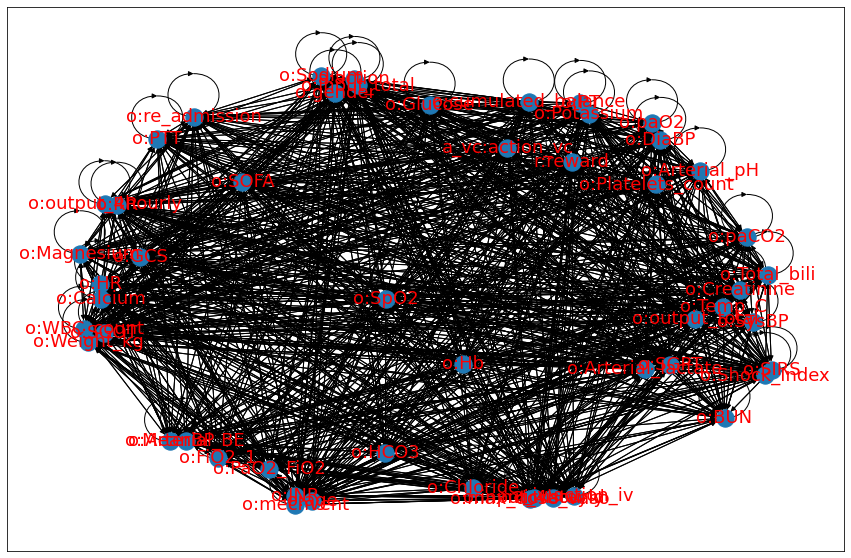

In [15]:
# intialize graph lasso
glasso = cdt.independence.graph.Glasso()

# apply graph lasso to dataset
skeleton = glasso.predict(X)

# visualize network
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(skeleton, font_size=18, font_color='r')

GES is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


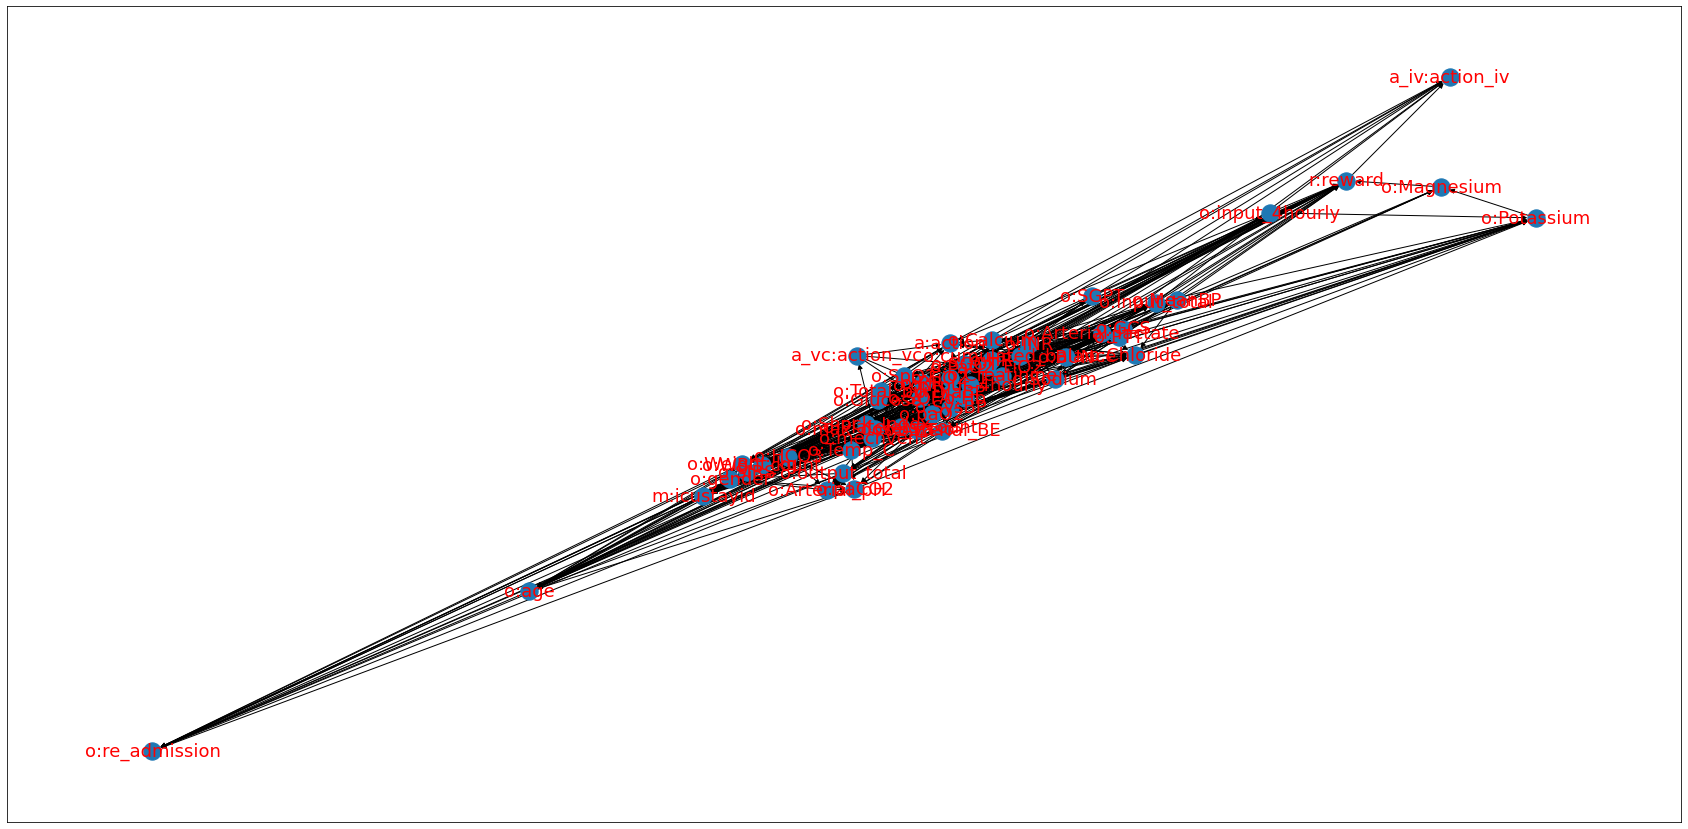

In [16]:
# initialize causal discovery model
model_ges = cdt.causality.graph.GES()
# apply causal discovery model to data and skeleton
graph_ges = model_ges.predict(X, skeleton)

# visualize network
fig=plt.figure(figsize=(30,15))
nx.draw_networkx(graph_ges, font_size=18, font_color='r')

# get adjaceny matrix of GES graph
A_ges = nx.adjacency_matrix(graph_ges).todense()

In [17]:
graph_ges.edges()

OutEdgeView([('m:icustayid', 'o:gender'), ('m:icustayid', 'o:re_admission'), ('m:icustayid', 'o:PT'), ('m:icustayid', 'o:HCO3'), ('m:icustayid', 'o:input_total'), ('m:icustayid', 'a:action'), ('o:gender', 'o:re_admission'), ('o:gender', 'o:age'), ('o:gender', 'o:Weight_kg'), ('o:gender', 'o:paCO2'), ('o:gender', 'r:reward'), ('o:mechvent', 'm:icustayid'), ('o:mechvent', 'o:gender'), ('o:mechvent', 'o:re_admission'), ('o:mechvent', 'o:age'), ('o:mechvent', 'o:Weight_kg'), ('o:mechvent', 'o:RR'), ('o:mechvent', 'o:Temp_C'), ('o:mechvent', 'o:Potassium'), ('o:mechvent', 'o:Chloride'), ('o:mechvent', 'o:WBC_count'), ('o:mechvent', 'o:SIRS'), ('o:mechvent', 'o:SpO2'), ('o:mechvent', 'o:input_total'), ('o:mechvent', 'o:input_4hourly'), ('o:max_dose_vaso', 'o:mechvent'), ('o:max_dose_vaso', 'o:re_admission'), ('o:max_dose_vaso', 'o:age'), ('o:max_dose_vaso', 'o:GCS'), ('o:max_dose_vaso', 'o:FiO2_1'), ('o:max_dose_vaso', 'o:Potassium'), ('o:max_dose_vaso', 'o:Calcium'), ('o:max_dose_vaso', 'o:

GES is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


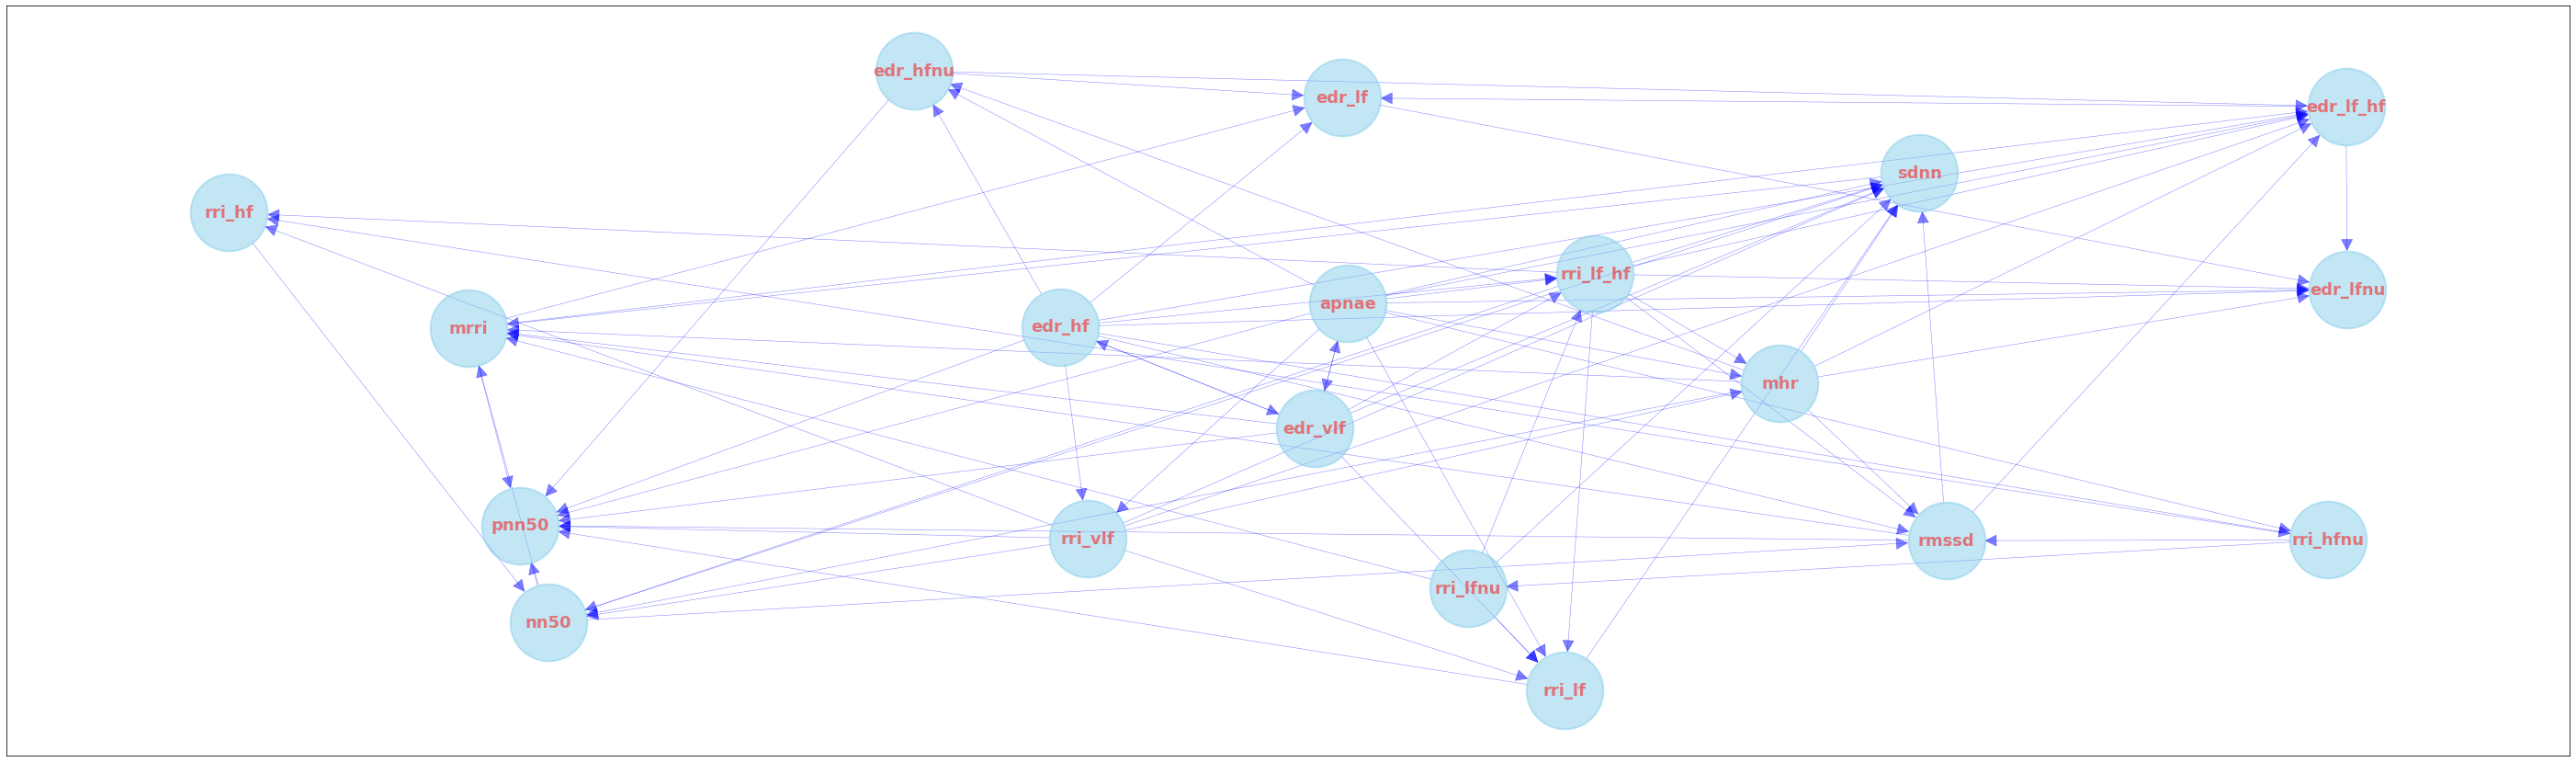

In [19]:
# initialize causal discovery model
model_ges = cdt.causality.graph.GES()
# apply causal discovery model to data and skeleton
graph_ges = model_ges.predict(X, skeleton)

# visualize network
fig=plt.figure(figsize=(50,15))
# nx.draw_networkx(graph_ges, font_size=18, font_color='r')

# get adjaceny matrix of GES graph
A_ges = nx.adjacency_matrix(graph_ges).todense()

# All together we can do something fancy
pos = nx.spring_layout(graph_ges, k=1, iterations=20)
nx.draw_networkx(graph_ges, pos, with_labels=True, node_size=7000, node_color="skyblue", node_shape="o", alpha=0.5, linewidths=2, font_size=18, 
        font_color="r", font_weight="bold", width=0.5, edge_color="b", style="solid", arrowsize=30)
plt.show()

In [20]:
graph_ges.edges()

OutEdgeView([('rmssd', 'sdnn'), ('rmssd', 'pnn50'), ('rmssd', 'mrri'), ('rmssd', 'edr_lf_hf'), ('sdnn', 'mrri'), ('nn50', 'rmssd'), ('nn50', 'sdnn'), ('nn50', 'pnn50'), ('nn50', 'mrri'), ('mrri', 'pnn50'), ('mrri', 'edr_lf'), ('mrri', 'edr_lf_hf'), ('mhr', 'rmssd'), ('mhr', 'sdnn'), ('mhr', 'nn50'), ('mhr', 'mrri'), ('mhr', 'edr_lf_hf'), ('mhr', 'edr_lfnu'), ('mhr', 'edr_hfnu'), ('rri_vlf', 'sdnn'), ('rri_vlf', 'nn50'), ('rri_vlf', 'pnn50'), ('rri_vlf', 'mhr'), ('rri_vlf', 'rri_lf'), ('rri_vlf', 'rri_hf'), ('rri_vlf', 'edr_lf_hf'), ('rri_lf', 'sdnn'), ('rri_lf', 'pnn50'), ('rri_hf', 'nn50'), ('rri_lf_hf', 'rmssd'), ('rri_lf_hf', 'sdnn'), ('rri_lf_hf', 'nn50'), ('rri_lf_hf', 'mhr'), ('rri_lf_hf', 'rri_lf'), ('rri_lf_hf', 'rri_hf'), ('rri_lf_hf', 'edr_lf_hf'), ('rri_lf_hf', 'edr_lfnu'), ('rri_lfnu', 'sdnn'), ('rri_lfnu', 'mrri'), ('rri_lfnu', 'rri_lf'), ('rri_lfnu', 'rri_lf_hf'), ('rri_hfnu', 'rmssd'), ('rri_hfnu', 'rri_hf'), ('rri_hfnu', 'rri_lfnu'), ('edr_vlf', 'sdnn'), ('edr_vlf', 'pn

GIES is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


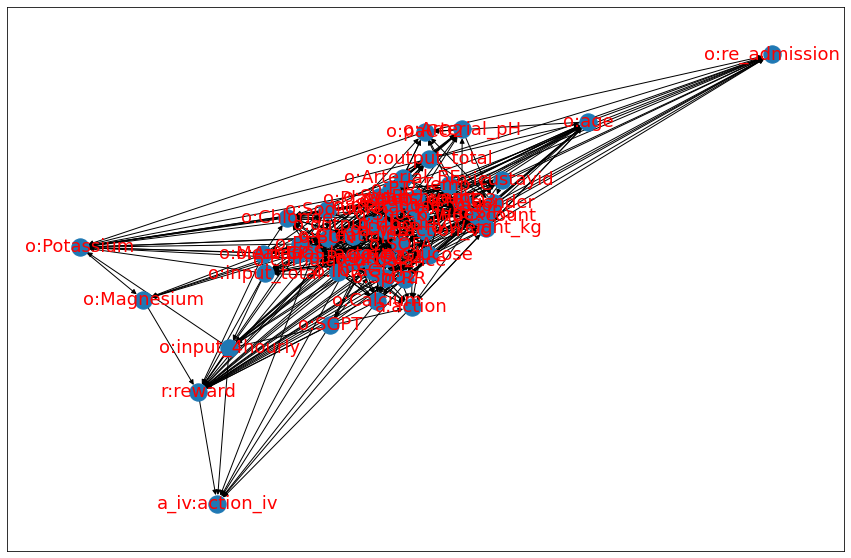

In [18]:
model_gies = cdt.causality.graph.GIES()
graph_gies = model_gies.predict(X, skeleton)

# visualize network
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(graph_gies, font_size=18, font_color='r')

# get adjaceny matrix of GIES graph
A_gies = nx.adjacency_matrix(graph_gies).todense()

In [19]:
graph_gies.edges()

OutEdgeView([('m:icustayid', 'o:gender'), ('m:icustayid', 'o:re_admission'), ('m:icustayid', 'o:PT'), ('m:icustayid', 'o:HCO3'), ('m:icustayid', 'o:input_total'), ('m:icustayid', 'a:action'), ('o:gender', 'o:re_admission'), ('o:gender', 'o:age'), ('o:gender', 'o:Weight_kg'), ('o:gender', 'o:paCO2'), ('o:gender', 'r:reward'), ('o:mechvent', 'm:icustayid'), ('o:mechvent', 'o:gender'), ('o:mechvent', 'o:re_admission'), ('o:mechvent', 'o:age'), ('o:mechvent', 'o:Weight_kg'), ('o:mechvent', 'o:RR'), ('o:mechvent', 'o:Temp_C'), ('o:mechvent', 'o:Potassium'), ('o:mechvent', 'o:Chloride'), ('o:mechvent', 'o:WBC_count'), ('o:mechvent', 'o:SIRS'), ('o:mechvent', 'o:SpO2'), ('o:mechvent', 'o:input_total'), ('o:mechvent', 'o:input_4hourly'), ('o:max_dose_vaso', 'o:mechvent'), ('o:max_dose_vaso', 'o:re_admission'), ('o:max_dose_vaso', 'o:age'), ('o:max_dose_vaso', 'o:GCS'), ('o:max_dose_vaso', 'o:FiO2_1'), ('o:max_dose_vaso', 'o:Potassium'), ('o:max_dose_vaso', 'o:Calcium'), ('o:max_dose_vaso', 'o:

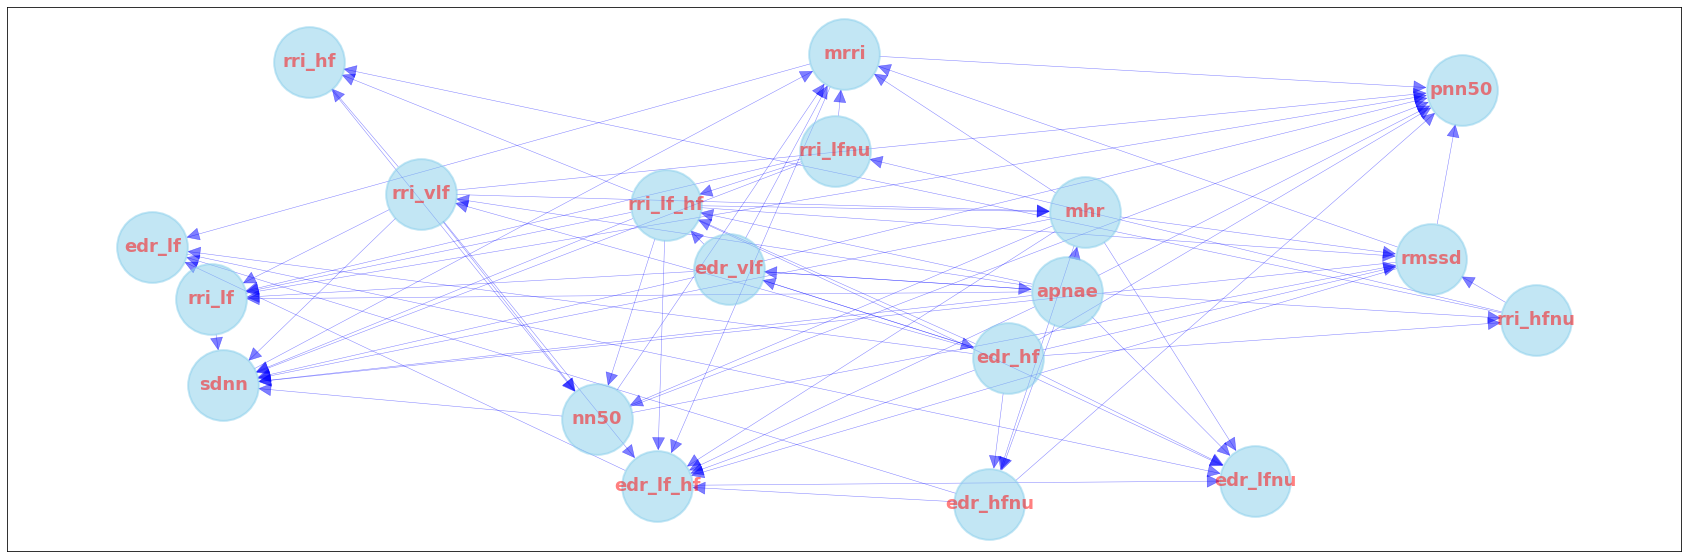

In [56]:
model_gies = cdt.causality.graph.GIES()
graph_gies = model_gies.predict(X, skeleton)

# visualize network
fig=plt.figure(figsize=(30,10))
# nx.draw_networkx(graph_gies, font_size=18, font_color='r')

# get adjaceny matrix of GIES graph
A_gies = nx.adjacency_matrix(graph_gies).todense()

# All together we can do something fancy
pos = nx.spring_layout(graph_gies, k=1, iterations=20)
nx.draw_networkx(graph_gies, pos, with_labels=True, node_size=5000, node_color="skyblue", node_shape="o", alpha=0.5, linewidths=2, font_size=18, 
        font_color="r", font_weight="bold", width=0.5, edge_color="b", style="solid", arrowsize=30)
plt.show()

In [57]:
graph_gies.edges()

OutEdgeView([('rmssd', 'sdnn'), ('rmssd', 'pnn50'), ('rmssd', 'mrri'), ('rmssd', 'edr_lf_hf'), ('sdnn', 'mrri'), ('nn50', 'rmssd'), ('nn50', 'sdnn'), ('nn50', 'pnn50'), ('nn50', 'mrri'), ('mrri', 'pnn50'), ('mrri', 'edr_lf'), ('mrri', 'edr_lf_hf'), ('mhr', 'rmssd'), ('mhr', 'sdnn'), ('mhr', 'nn50'), ('mhr', 'mrri'), ('mhr', 'edr_lf_hf'), ('mhr', 'edr_lfnu'), ('mhr', 'edr_hfnu'), ('rri_vlf', 'sdnn'), ('rri_vlf', 'nn50'), ('rri_vlf', 'pnn50'), ('rri_vlf', 'mhr'), ('rri_vlf', 'rri_lf'), ('rri_vlf', 'rri_hf'), ('rri_vlf', 'edr_lf_hf'), ('rri_lf', 'sdnn'), ('rri_lf', 'pnn50'), ('rri_hf', 'nn50'), ('rri_lf_hf', 'rmssd'), ('rri_lf_hf', 'sdnn'), ('rri_lf_hf', 'nn50'), ('rri_lf_hf', 'mhr'), ('rri_lf_hf', 'rri_lf'), ('rri_lf_hf', 'rri_hf'), ('rri_lf_hf', 'edr_lf_hf'), ('rri_lf_hf', 'edr_lfnu'), ('rri_lfnu', 'sdnn'), ('rri_lfnu', 'mrri'), ('rri_lfnu', 'rri_lf'), ('rri_lfnu', 'rri_lf_hf'), ('rri_hfnu', 'rmssd'), ('rri_hfnu', 'rri_hf'), ('rri_hfnu', 'rri_lfnu'), ('edr_vlf', 'sdnn'), ('edr_vlf', 'pn

GIES is ran on the skeleton of the given graph.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


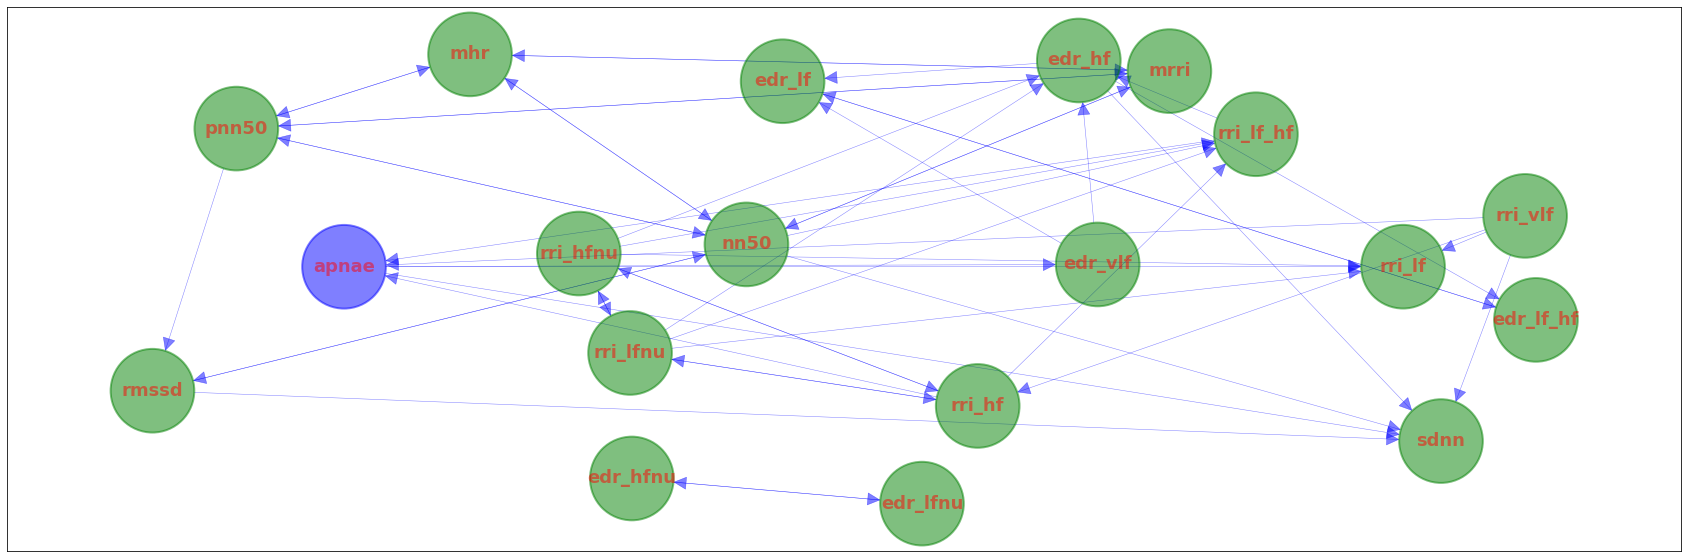

In [26]:
model_gies = cdt.causality.graph.GIES()
graph_gies = model_gies.predict(data, skeleton)

# visualize network
fig=plt.figure(figsize=(30,10))
# nx.draw_networkx(graph_gies, font_size=18, font_color='r')

# get adjaceny matrix of GIES graph
A_gies = nx.adjacency_matrix(graph_gies).todense()


G = graph_gies.nodes
color_map = ['blue' if node == 'apnae' else 'green' for node in G]  
# All together we can do something fancy
pos = nx.spring_layout(pc_output, k=1, iterations=20)
nx.draw_networkx(pc_output, pos, node_color=color_map, with_labels=True, node_size=7000, node_shape="o", alpha=0.5, linewidths=2, font_size=18, 
        font_color="r", font_weight="bold", width=0.5, edge_color="b", style="solid", arrowsize=30)
plt.show()

In [27]:
graph_gies.edges

OutEdgeView([('rmssd', 'sdnn'), ('rmssd', 'pnn50'), ('rmssd', 'mrri'), ('rmssd', 'rri_hfnu'), ('rmssd', 'edr_lf_hf'), ('sdnn', 'mrri'), ('sdnn', 'rri_lf'), ('sdnn', 'rri_hfnu'), ('nn50', 'rmssd'), ('nn50', 'sdnn'), ('nn50', 'pnn50'), ('nn50', 'mrri'), ('nn50', 'rri_hfnu'), ('pnn50', 'edr_hfnu'), ('mrri', 'pnn50'), ('mrri', 'rri_hfnu'), ('mrri', 'edr_lf'), ('mrri', 'edr_lf_hf'), ('mhr', 'rmssd'), ('mhr', 'sdnn'), ('mhr', 'nn50'), ('mhr', 'mrri'), ('mhr', 'edr_lf_hf'), ('mhr', 'edr_lfnu'), ('rri_vlf', 'sdnn'), ('rri_vlf', 'nn50'), ('rri_vlf', 'pnn50'), ('rri_vlf', 'mhr'), ('rri_vlf', 'rri_lf'), ('rri_vlf', 'rri_hf'), ('rri_vlf', 'edr_lf_hf'), ('rri_lf', 'pnn50'), ('rri_hf', 'sdnn'), ('rri_hf', 'nn50'), ('rri_hf', 'rri_hfnu'), ('rri_lf_hf', 'rmssd'), ('rri_lf_hf', 'sdnn'), ('rri_lf_hf', 'nn50'), ('rri_lf_hf', 'mhr'), ('rri_lf_hf', 'rri_lf'), ('rri_lf_hf', 'rri_hf'), ('rri_lf_hf', 'rri_hfnu'), ('rri_lf_hf', 'edr_lf_hf'), ('rri_lfnu', 'rmssd'), ('rri_lfnu', 'sdnn'), ('rri_lfnu', 'mrri'), ('

In [23]:
data.columns

Index(['traj', 'o:gender', 'o:mechvent', 'o:max_dose_vaso', 'o:re_admission',
       'o:age', 'o:Weight_kg', 'o:GCS', 'o:HR', 'o:SysBP', 'o:MeanBP',
       'o:DiaBP', 'o:RR', 'o:Temp_C', 'o:FiO2_1', 'o:Potassium', 'o:Sodium',
       'o:Chloride', 'o:Glucose', 'o:Magnesium', 'o:Calcium', 'o:Hb',
       'o:WBC_count', 'o:Platelets_count', 'o:PTT', 'o:PT', 'o:Arterial_pH',
       'o:paO2', 'o:paCO2', 'o:Arterial_BE', 'o:HCO3', 'o:Arterial_lactate',
       'o:SOFA', 'o:SIRS', 'o:Shock_Index', 'o:PaO2_FiO2',
       'o:cumulated_balance', 'o:SpO2', 'o:BUN', 'o:Creatinine', 'o:SGOT',
       'o:SGPT', 'o:Total_bili', 'o:INR', 'o:input_total', 'o:input_4hourly',
       'o:output_total', 'o:output_4hourly', 'r:reward'],
      dtype='object')

adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


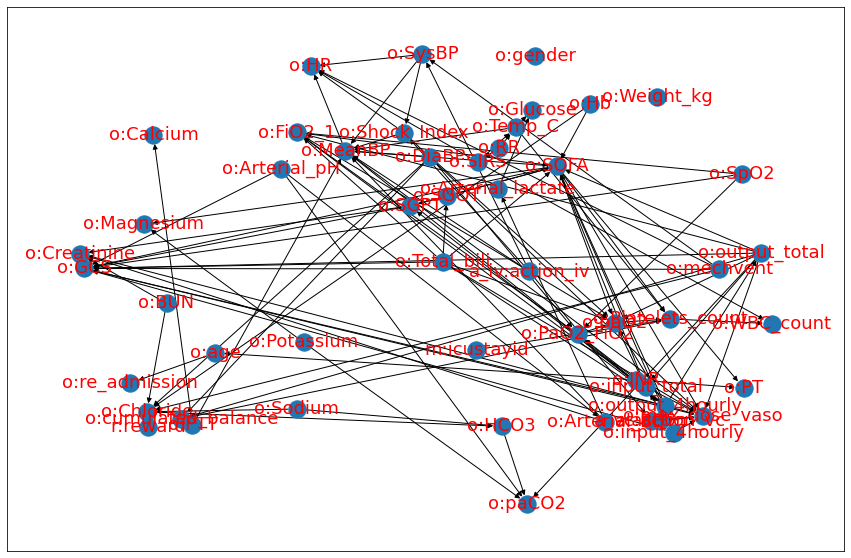

In [20]:
model_lingam = cdt.causality.graph.LiNGAM()
graph_lingam = model_lingam.predict(X)

# visualize network
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(graph_lingam, font_size=18, font_color='r')

# get adjaceny matrix of LiNGAM graph
A_lingam = nx.adjacency_matrix(graph_lingam).todense()

In [21]:
graph_lingam.edges

OutEdgeView([('m:icustayid', 'o:Platelets_count'), ('o:mechvent', 'o:GCS'), ('o:mechvent', 'o:HR'), ('o:mechvent', 'o:SysBP'), ('o:mechvent', 'o:Chloride'), ('o:age', 'o:re_admission'), ('o:GCS', 'o:max_dose_vaso'), ('o:SysBP', 'o:HR'), ('o:SysBP', 'o:MeanBP'), ('o:SysBP', 'o:Shock_Index'), ('o:MeanBP', 'o:max_dose_vaso'), ('o:MeanBP', 'o:HR'), ('o:DiaBP', 'o:MeanBP'), ('o:DiaBP', 'o:Chloride'), ('o:DiaBP', 'o:paO2'), ('o:DiaBP', 'o:PaO2_FiO2'), ('o:DiaBP', 'o:cumulated_balance'), ('o:RR', 'o:Temp_C'), ('o:RR', 'o:SIRS'), ('o:Temp_C', 'o:MeanBP'), ('o:Temp_C', 'o:Glucose'), ('o:Temp_C', 'o:Platelets_count'), ('o:FiO2_1', 'o:paO2'), ('o:FiO2_1', 'o:SOFA'), ('o:FiO2_1', 'o:PaO2_FiO2'), ('o:Potassium', 'o:Magnesium'), ('o:Potassium', 'o:paCO2'), ('o:Sodium', 'o:Chloride'), ('o:Sodium', 'o:HCO3'), ('o:Chloride', 'o:HCO3'), ('o:Hb', 'o:Chloride'), ('o:Hb', 'o:SOFA'), ('o:Platelets_count', 'o:WBC_count'), ('o:PTT', 'o:MeanBP'), ('o:PTT', 'o:Calcium'), ('o:Arterial_pH', 'o:GCS'), ('o:Arterial

In [34]:
model_lingam = cdt.causality.graph.LiNGAM()
graph_lingam = model_lingam.predict(X)

# visualize network
fig=plt.figure(figsize=(50,15))
# nx.draw_networkx(graph_lingam, font_size=18, font_color='r')

# get adjaceny matrix of LiNGAM graph
A_lingam = nx.adjacency_matrix(graph_lingam).todense()

# All together we can do something fancy
pos = nx.spring_layout(graph_lingam, k=1, iterations=20)
nx.draw_networkx(graph_lingam, pos, with_labels=True, node_size=3000, node_color="skyblue", node_shape="o", alpha=0.5, linewidths=2, font_size=18, 
        font_color="r", font_weight="bold", width=0.5, edge_color="b", style="solid", arrowsize=30)
plt.show()

AttributeError: 'dict' object has no attribute 'to_csv'

In [30]:
import numpy as np
import logging

import econml

import dowhy
from dowhy import CausalModel

import warnings
warnings.filterwarnings('ignore')

In [20]:
pip install econml

Note: you may need to restart the kernel to use updated packages.


In [21]:
data.head(1)

pos_avg_Label  neg_avg_Label  distressed_Label  upset_Label  guilty_Label  \
0           50.0           50.0              50.0         50.0          50.0   

   scared_Label  hostile_Label  irritable_Label  ashamed_Label  nervous_Label  \
0          50.0           50.0             50.0           50.0           50.0   

   ...  mean_hrv_OURA  score_OURA  cal_active_OURA  cal_total_OURA  \
0  ...     100.021739        93.0            371.0          2541.0   

   daily_movement_OURA  inactivity_alerts_OURA  steps_OURA  rest_OURA  \
0               6130.0                     0.0      8992.0      448.0   

   inactive_OURA  step_count_PERSONICLE  
0          643.0            2682.999024  

[1 rows x 59 columns]

In [42]:
# # Load the data 
# data = pd.read_csv('a01.csv')
# data.head()

rmssd       sdnn  nn50      pnn50        mrri        mhr   rri_vlf  \
0  29.922978  55.163246     7  10.606061  896.969697  67.143514  0.380315   
1  28.181606  40.347610     4   5.714286  835.571429  71.980129  0.224880   
2  33.973029  77.897603     7   9.589041  810.136986  74.749725  0.496192   
3  23.533936  60.127799     4   5.063291  748.860759  80.670410  0.534770   
4  26.431963  43.774607     4   5.333333  794.000000  75.792139  0.078012   

     rri_lf    rri_hf  rri_lf_hf   rri_lfnu   rri_hfnu   edr_vlf    edr_lf  \
0  0.379662  0.240023   1.581774  61.266945  38.733055  0.075273  0.091862   
1  0.454995  0.320125   1.421304  58.699941  41.300059  0.039201  0.106854   
2  0.262408  0.241401   1.087021  52.084820  47.915180  0.219579  0.450681   
3  0.360265  0.104965   3.432234  77.438012  22.561988  0.386832  0.240341   
4  0.841567  0.080420  10.464635  91.277525   8.722475  0.088635  0.324806   

     edr_hf  edr_lf_hf   edr_lfnu   edr_hfnu  apnae  
0  0.832865   0.110297   9.934008  90.065992      0  
1  0.853944   0.125130  11.121379  88.878621      0  
2  0.329741   1.366773  57.748380  42.251620      0  
3  0.372827   0.644643  39.196533  60.803467      0  
4  0.586559   0.553747  35.639478  64.360522      0

In [28]:
data.shape

In [24]:
data.columns

Index(['date', 'pos_avg_Label', 'neg_avg_Label', 'distressed_Label',
       'upset_Label', 'guilty_Label', 'scared_Label', 'hostile_Label',
       'irritable_Label', 'ashamed_Label', 'nervous_Label', 'jittery_Label',
       'afraid_Label', 'interested_Label', 'determined_Label',
       'attentive_Label', 'excited_Label', 'active_Label', 'alert_Label',
       'inspired_Label', 'enthusiastic_Label', 'strong_Label', 'proud_Label',
       'pos_avg_Label_Next', 'neg_avg_Label_Next', 'distressed_Label_Next',
       'upset_Label_Next', 'guilty_Label_Next', 'scared_Label_Next',
       'hostile_Label_Next', 'irritable_Label_Next', 'ashamed_Label_Next',
       'nervous_Label_Next', 'jittery_Label_Next', 'afraid_Label_Next',
       'interested_Label_Next', 'determined_Label_Next',
       'attentive_Label_Next', 'excited_Label_Next', 'active_Label_Next',
       'alert_Label_Next', 'inspired_Label_Next', 'enthusiastic_Label_Next',
       'strong_Label_Next', 'proud_Label_Next', 'awake_OURA', 'rem_O

In [42]:
X.columns

Index(['pos_avg_Label', 'neg_avg_Label', 'guilty_Label', 'scared_Label',
       'hostile_Label', 'irritable_Label', 'ashamed_Label', 'nervous_Label',
       'jittery_Label', 'interested_Label', 'attentive_Label', 'excited_Label',
       'active_Label', 'alert_Label', 'enthusiastic_Label',
       'pos_avg_Label_Next', 'neg_avg_Label_Next', 'guilty_Label_Next',
       'scared_Label_Next', 'hostile_Label_Next', 'irritable_Label_Next',
       'ashamed_Label_Next', 'nervous_Label_Next', 'jittery_Label_Next',
       'interested_Label_Next', 'attentive_Label_Next', 'excited_Label_Next',
       'active_Label_Next', 'alert_Label_Next', 'enthusiastic_Label_Next',
       'awake_OURA', 'light_OURA', 'rem_OURA', 'deep_OURA', 'total_OURA',
       'mean_hr_OURA', 'mean_hrv_OURA', 'std_hr_OURA', 'std_hrv_OURA',
       'score_OURA', 'score_stay_active_OURA', 'score_move_every_hour_OURA',
       'score_recovery_time_OURA', 'non_wear_OURA', 'rest_OURA', 'high_OURA',
       'met_min_inactive_OURA', 'targe

In [ ]:
#inference

In [31]:
#normalized

normalized_df=(data-data.min())/(data.max()-data.min())

In [32]:
data1=normalized_df

In [ ]:
#mediation analysis

In [ ]:
#covid-treatment

In [33]:
# Define causal model
model=CausalModel(
        data = data1, #["distressed_Label_lag","score_OURA", "step_count_PERSONICLE", "steps_OURA", "upset_Label"]
        treatment= ["covid", "score_stay_active_OURA"], # "inactive_OURA", "inactivity_alerts_OURA
        outcome= "score_OURA", 
#         missing_nodes_as_confounders=True
#         common_causes=["covid", "mean_hrv_OURA"],
        graph="""graph[directed 1 node[id "covid" label "covid"]  
                    node[id "score_OURA" label "score_OURA"]
                    node[id "score_OURA_lag" label "score_OURA_lag"]
                    edge[source "covid" target "score_OURA"]
                    edge[source "covid" target "score_OURA_lag"]
                    edge[source "score_OURA_lag" target "score_OURA"]
                    ]"""
        )

model._data.dtypes

pos_avg_Label           float64
neg_avg_Label           float64
distressed_Label        float64
upset_Label             float64
guilty_Label            float64
                         ...   
score_OURA_lag          float64
distressed_Label_lag    float64
steps_OURA_lag          float64
date1                   float64
covid                   float64
Length: 129, dtype: object

In [ ]:
# Define causal model
model=CausalModel(
        data = data1, #["distressed_Label_lag","score_OURA", "step_count_PERSONICLE", "steps_OURA", "upset_Label"]
        treatment= ["covid"], # "inactive_OURA", "inactivity_alerts_OURA
        outcome= "score_OURA", 
#         missing_nodes_as_confounders=True
#         common_causes=["covid", "mean_hrv_OURA"],
        graph="""graph[directed 1 node[id "covid" label "covid"]  
                    node[id "score_OURA" label "score_OURA"]
                    node[id "score_OURA_lag" label "score_OURA_lag"]
                    node[id "HRV_MadNN" label "HRV_MadNN"]
                    node[id "score_stay_active_OURA" label "score_stay_active_OURA"]
                    node[id "HRV_LnHF" label "HRV_LnHF"]
                    edge[source "covid" target "HRV_LnHF"]
                    edge[source "HRV_LnHF" target "score_OURA"]
                    edge[source "covid" target "score_stay_active_OURA"]
                    edge[source "score_stay_active_OURA" target "score_OURA"]
                    edge[source "covid" target "HRV_MadNN"]
                    edge[source "HRV_MadNN" target "score_OURA"]
                    edge[source "covid" target "score_OURA"]
                    edge[source "covid" target "score_OURA_lag"]
                    edge[source "score_OURA_lag" target "score_OURA"]
                    ]"""
        )

model._data.dtypes

In [85]:
# Define causal model
model=CausalModel(
        data = data1, #["distressed_Label_lag","score_OURA", "step_count_PERSONICLE", "steps_OURA", "upset_Label"]
        treatment= ["covid"], # "inactive_OURA", "inactivity_alerts_OURA
        outcome= "score_OURA", 
#         missing_nodes_as_confounders=True
#         common_causes=["covid", "mean_hrv_OURA"],
        graph="""graph[directed 1 node[id "covid" label "covid"]  
                    node[id "score_OURA" label "score_OURA"]
                    node[id "score_OURA_lag" label "score_OURA_lag"]
                    node[id "score_stay_active_OURA" label "score_stay_active_OURA"]
                    node[id "HRV_MadNN" label "HRV_MadNN"]
                    edge[source "covid" target "HRV_MadNN"]
                    edge[source "HRV_MadNN" target "score_OURA"]
                    edge[source "covid" target "score_stay_active_OURA"]
                    edge[source "score_stay_active_OURA" target "score_OURA"]
                    edge[source "covid" target "score_OURA"]
                    edge[source "covid" target "score_OURA_lag"]
                    edge[source "score_OURA_lag" target "score_OURA"]
                    ]"""
        )

model._data.dtypes

pos_avg_Label           float64
neg_avg_Label           float64
distressed_Label        float64
upset_Label             float64
guilty_Label            float64
                         ...   
score_OURA_lag          float64
distressed_Label_lag    float64
steps_OURA_lag          float64
date1                   float64
covid                   float64
Length: 129, dtype: object

In [63]:
# Define causal model
model=CausalModel(
        data = data1, #["distressed_Label_lag","score_OURA", "step_count_PERSONICLE", "steps_OURA", "upset_Label"]
        treatment= ["covid"], # "inactive_OURA", "inactivity_alerts_OURA
        outcome= "score_OURA", 
#         missing_nodes_as_confounders=True
#         common_causes=["covid", "mean_hrv_OURA"],
        graph="""graph[directed 1 node[id "covid" label "covid"]  
                    node[id "score_OURA" label "score_OURA"]
                    node[id "HRV_MadNN" label "HRV_MadNN"]
                    node[id "target_calories_OURA" label "target_calories_OURA"]
                    edge[source "covid" target "target_calories_OURA"]
                    edge[source "target_calories_OURA" target "score_OURA"]
                    edge[source "covid" target "HRV_MadNN"]
                    edge[source "HRV_MadNN" target "score_OURA"]
                    edge[source "covid" target "score_OURA"]
                    ]"""
        )

model._data.dtypes

pos_avg_Label           float64
neg_avg_Label           float64
distressed_Label        float64
upset_Label             float64
guilty_Label            float64
                         ...   
score_OURA_lag          float64
distressed_Label_lag    float64
steps_OURA_lag          float64
date1                   float64
covid                   float64
Length: 129, dtype: object

In [105]:
# Define causal model
model=CausalModel(
        data = data1, #["distressed_Label_lag","score_OURA", "step_count_PERSONICLE", "steps_OURA", "upset_Label"]
        treatment= ["covid"], # "inactive_OURA", "inactivity_alerts_OURA
        outcome= "score_OURA", 
#         missing_nodes_as_confounders=True
#         common_causes=["covid", "mean_hrv_OURA"],
        graph="""graph[directed 1 node[id "covid" label "covid"]  
                    node[id "score_OURA" label "score_OURA"]
                    node[id "score_OURA_lag" label "score_OURA_lag"]
                    edge[source "covid" target "score_OURA_lag"]
                    edge[source "score_OURA_lag" target "score_OURA"]
                    edge[source "covid" target "score_OURA"]
                    ]"""
        )

model._data.dtypes

pos_avg_Label           float64
neg_avg_Label           float64
distressed_Label        float64
upset_Label             float64
guilty_Label            float64
                         ...   
score_OURA_lag          float64
distressed_Label_lag    float64
steps_OURA_lag          float64
date1                   float64
covid                   float64
Length: 129, dtype: object

In [57]:
# Define causal model
model=CausalModel(
        data = data1, #["distressed_Label_lag","score_OURA", "step_count_PERSONICLE", "steps_OURA", "upset_Label"]
        treatment= ["covid"], # "inactive_OURA", "inactivity_alerts_OURA
        outcome= "score_OURA", 
#         missing_nodes_as_confounders=True
#         common_causes=["covid", "mean_hrv_OURA"],
        graph="""graph[directed 1 node[id "covid" label "covid"]  
                    node[id "score_OURA" label "score_OURA"]
                    node[id "score_OURA_lag" label "score_OURA_lag"]
                    node[id "HRV_MadNN" label "HRV_MadNN"]
                    node[id "score_stay_active_OURA" label "score_stay_active_OURA"]
                    edge[source "covid" target "score_stay_active_OURA"]
                    edge[source "score_stay_active_OURA" target "score_OURA"]
                    edge[source "covid" target "HRV_MadNN"]
                    edge[source "HRV_MadNN" target "score_OURA"]
                    edge[source "covid" target "score_OURA_lag"]
                    edge[source "score_OURA_lag" target "score_OURA"]
                    edge[source "covid" target "score_OURA"]
                    edge[source "HRV_MadNN" target "score_OURA_lag"]
                    edge[source "score_stay_active_OURA" target "HRV_MadNN"]
                    edge[source "score_stay_active_OURA" target "score_OURA_lag"]
                    ]"""
        )

model._data.dtypes

pos_avg_Label           float64
neg_avg_Label           float64
distressed_Label        float64
upset_Label             float64
guilty_Label            float64
                         ...   
score_OURA_lag          float64
distressed_Label_lag    float64
steps_OURA_lag          float64
date1                   float64
covid                   float64
Length: 129, dtype: object

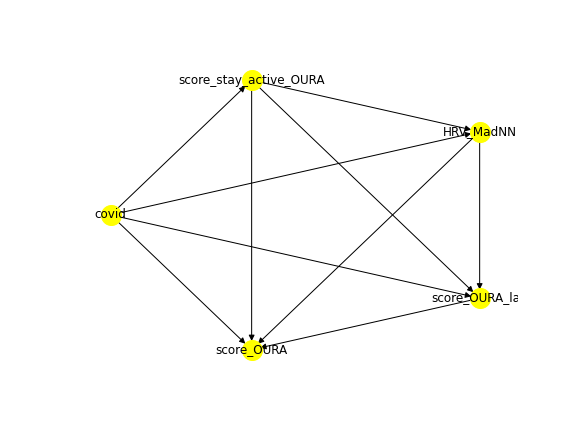

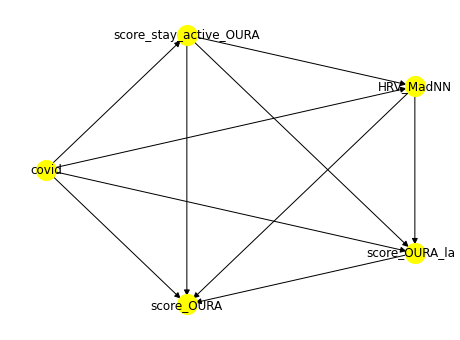

In [58]:
model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [59]:
# Natural direct effect (nde)
identified_estimand_nde = model.identify_effect(estimand_type="nonparametric-nde", 
                                            proceed_when_unidentifiable=True)
print(identified_estimand_nde)

Estimand type: nonparametric-nde

### Estimand : 1
Estimand name: mediation
Estimand expression:
 ⎡   d                               ⎤
E⎢────────(score_OURA|score_OURA_lag)⎥
 ⎣d[covid]                           ⎦
Estimand assumption 1, Mediation: score_OURA_lag intercepts (blocks) all directed paths from covid to s,c,o,r,e,_,O,U,R,A except the path {covid}→{s,c,o,r,e,_,O,U,R,A}.
Estimand assumption 2, First-stage-unconfoundedness: If U→{covid} and U→{score_OURA_lag} then P(score_OURA_lag|covid,U) = P(score_OURA_lag|covid)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{score_OURA_lag} and U→score_OURA then P(score_OURA|score_OURA_lag, covid, U) = P(score_OURA|score_OURA_lag, covid)



In [60]:
# Natural indirect effect (nie)
identified_estimand_nie = model.identify_effect(estimand_type="nonparametric-nie", 
                                            proceed_when_unidentifiable=True)
print(identified_estimand_nie)

Estimand type: nonparametric-nie

### Estimand : 1
Estimand name: mediation
Estimand expression:
 ⎡        d                        d                      ⎤
E⎢─────────────────(score_OURA)⋅────────([score_OURA_lag])⎥
 ⎣d[score_OURA_lag]             d[covid]                  ⎦
Estimand assumption 1, Mediation: score_OURA_lag intercepts (blocks) all directed paths from covid to s,c,o,r,e,_,O,U,R,A except the path {covid}→{s,c,o,r,e,_,O,U,R,A}.
Estimand assumption 2, First-stage-unconfoundedness: If U→{covid} and U→{score_OURA_lag} then P(score_OURA_lag|covid,U) = P(score_OURA_lag|covid)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{score_OURA_lag} and U→score_OURA then P(score_OURA|score_OURA_lag, covid, U) = P(score_OURA|score_OURA_lag, covid)



In [63]:
import dowhy.causal_estimators.linear_regression_estimator
causal_estimate_nie = model.estimate_effect(identified_estimand_nie,
                                        method_name="mediation.two_stage_regression",
                                       confidence_intervals=False,
                                       test_significance=False,
                                        method_params = {
                                            'first_stage_model': dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator,
                                            'second_stage_model': dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator
                                        }
                                       )
print(causal_estimate_nie)

two_stage_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': [], 'first_stage_model': <class 'dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator'>, 'second_stage_model': <class 'dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator'>}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': [], 'first_stage_model': <class 'dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator'>, 'second_stage_model': <class 'dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator'>}
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-nie

### Estimand : 1
Estimand name: mediation
Estimand expression:
 ⎡        d             

In [ ]:
print(causal_estimate_nie.value)

In [62]:
causal_estimate_nde = model.estimate_effect(identified_estimand_nde,
                                        method_name="mediation.two_stage_regression",
                                       confidence_intervals=False,
                                       test_significance=False,
                                        method_params = {
                                            'first_stage_model': dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator,
                                            'second_stage_model': dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator
                                        }
                                       )
print(causal_estimate_nde)

two_stage_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': [], 'first_stage_model': <class 'dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator'>, 'second_stage_model': <class 'dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator'>}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': [], 'first_stage_model': <class 'dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator'>, 'second_stage_model': <class 'dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator'>}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_m

In [61]:
# Define causal model
model=CausalModel(
        data = data1, #["distressed_Label_lag","score_OURA", "step_count_PERSONICLE", "steps_OURA", "upset_Label"]
        treatment= ["covid"], # "inactive_OURA", "inactivity_alerts_OURA
        outcome= "score_OURA", 
#         missing_nodes_as_confounders=True
#         common_causes=["covid", "mean_hrv_OURA"],
        graph="""graph[directed 1 node[id "covid" label "covid"]  
                    node[id "score_OURA" label "score_OURA"]
                    node[id "HRV_TINN" label "HRV_TINN"]
                    edge[source "covid" target "score_OURA"]
                    edge[source "covid" target "HRV_TINN"]
                    edge[source "HRV_TINN" target "score_OURA"]
                    ]"""
        )

model._data.dtypes

pos_avg_Label           float64
neg_avg_Label           float64
distressed_Label        float64
upset_Label             float64
guilty_Label            float64
                         ...   
score_OURA_lag          float64
distressed_Label_lag    float64
steps_OURA_lag          float64
date1                   float64
covid                   float64
Length: 129, dtype: object

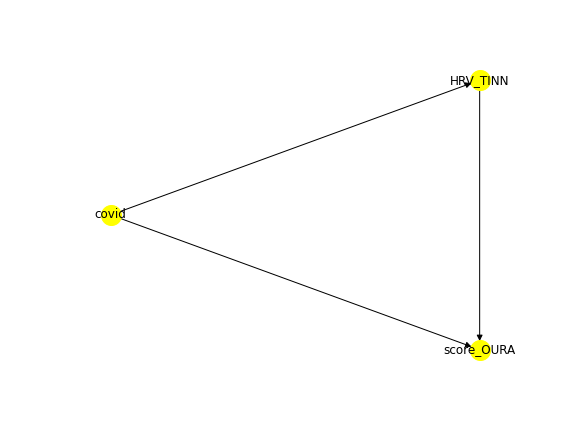

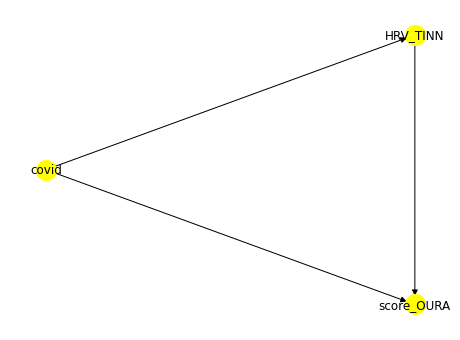

In [62]:
model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [63]:
# Natural direct effect (nde)
identified_estimand_nde = model.identify_effect(estimand_type="nonparametric-nde", 
                                            proceed_when_unidentifiable=True)
print(identified_estimand_nde)

Estimand type: nonparametric-nde

### Estimand : 1
Estimand name: mediation
Estimand expression:
 ⎡   d                         ⎤
E⎢────────(score_OURA|HRV_TINN)⎥
 ⎣d[covid]                     ⎦
Estimand assumption 1, Mediation: HRV_TINN intercepts (blocks) all directed paths from covid to s,c,o,r,e,_,O,U,R,A except the path {covid}→{s,c,o,r,e,_,O,U,R,A}.
Estimand assumption 2, First-stage-unconfoundedness: If U→{covid} and U→{HRV_TINN} then P(HRV_TINN|covid,U) = P(HRV_TINN|covid)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{HRV_TINN} and U→score_OURA then P(score_OURA|HRV_TINN, covid, U) = P(score_OURA|HRV_TINN, covid)



In [64]:
# Natural indirect effect (nie)
identified_estimand_nie = model.identify_effect(estimand_type="nonparametric-nie", 
                                            proceed_when_unidentifiable=True)
print(identified_estimand_nie)

Estimand type: nonparametric-nie

### Estimand : 1
Estimand name: mediation
Estimand expression:
 ⎡     d                     d                ⎤
E⎢───────────(score_OURA)⋅────────([HRV_TINN])⎥
 ⎣d[HRV_TINN]             d[covid]            ⎦
Estimand assumption 1, Mediation: HRV_TINN intercepts (blocks) all directed paths from covid to s,c,o,r,e,_,O,U,R,A except the path {covid}→{s,c,o,r,e,_,O,U,R,A}.
Estimand assumption 2, First-stage-unconfoundedness: If U→{covid} and U→{HRV_TINN} then P(HRV_TINN|covid,U) = P(HRV_TINN|covid)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{HRV_TINN} and U→score_OURA then P(score_OURA|HRV_TINN, covid, U) = P(score_OURA|HRV_TINN, covid)



In [65]:
import dowhy.causal_estimators.linear_regression_estimator
causal_estimate_nie = model.estimate_effect(identified_estimand_nie,
                                        method_name="mediation.two_stage_regression",
                                       confidence_intervals=False,
                                       test_significance=False,
                                        method_params = {
                                            'first_stage_model': dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator,
                                            'second_stage_model': dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator
                                        }
                                       )
print(causal_estimate_nie)

two_stage_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': [], 'first_stage_model': <class 'dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator'>, 'second_stage_model': <class 'dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator'>}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': [], 'first_stage_model': <class 'dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator'>, 'second_stage_model': <class 'dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator'>}
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-nie

### Estimand : 1
Estimand name: mediation
Estimand expression:
 ⎡     d                

In [ ]:
print(causal_estimate_nie.value)

In [66]:
causal_estimate_nde = model.estimate_effect(identified_estimand_nde,
                                        method_name="mediation.two_stage_regression",
                                       confidence_intervals=False,
                                       test_significance=False,
                                        method_params = {
                                            'first_stage_model': dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator,
                                            'second_stage_model': dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator
                                        }
                                       )
print(causal_estimate_nde)

two_stage_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': [], 'first_stage_model': <class 'dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator'>, 'second_stage_model': <class 'dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator'>}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': [], 'first_stage_model': <class 'dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator'>, 'second_stage_model': <class 'dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator'>}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_m

In [90]:
# Define causal model
model=CausalModel(
        data = data1, #["distressed_Label_lag","score_OURA", "step_count_PERSONICLE", "steps_OURA", "upset_Label"]
        treatment= ["HRV_LnHF"], # "inactive_OURA", "inactivity_alerts_OURA
        outcome= "score_OURA", 
#         missing_nodes_as_confounders=True
        common_causes=["covid", "mean_hrv_OURA"],
        graph="""graph[directed 1 node[id "HRV_LnHF" label "HRV_LnHF"]  
                    node[id "HRV_VHF" label "HRV_VHF"]
                    node[id "covid" label "covid"]
                    node[id "HRV_MadNN" label "HRV_MadNN"]
                    node[id "score_OURA" label "score_OURA"]
                    node[id "mean_hrv_OURA" label "mean_hrv_OURA"]
                    edge[source "HRV_LnHF" target "HRV_VHF"]
                    edge[source "HRV_LnHF" target "score_OURA"]
                    edge[source "covid" target "score_OURA"]
                    edge[source "covid" target "HRV_VHF"]
                    edge[source "covid" target "HRV_LnHF"]
                    edge[source "mean_hrv_OURA" target "HRV_VHF"]
                    edge[source "mean_hrv_OURA" target "HRV_LnHF"]
                    edge[source "mean_hrv_OURA" target "score_OURA"]
                    edge[source "HRV_MadNN" target "HRV_VHF"]
                    edge[source "HRV_MadNN" target "HRV_LnHF"]
                    edge[source "HRV_MadNN" target "score_OURA"]
                    edge[source "HRV_VHF" target "score_OURA"]]"""
        )

model._data.dtypes

pos_avg_Label           float64
neg_avg_Label           float64
distressed_Label        float64
upset_Label             float64
guilty_Label            float64
                         ...   
score_OURA_lag          float64
distressed_Label_lag    float64
steps_OURA_lag          float64
date1                   float64
covid                   float64
Length: 129, dtype: object

In [ ]:
node[id "HRV_VHF" label "HRV_VHF"]
edge[source "HRV_LnHF" target "HRV_VHF"]
edge[source "HRV_VHF" target "score_OURA"]

In [181]:
# Define causal model
model=CausalModel(
        data = data1, #["distressed_Label_lag","score_OURA", "step_count_PERSONICLE", "steps_OURA", "upset_Label"]
        treatment= ["HRV_LnHF"], # "inactive_OURA", "inactivity_alerts_OURA
        outcome= "score_OURA", 
#         missing_nodes_as_confounders=True
#         common_causes=["covid"],
        graph="""graph[directed 1 node[id "HRV_LnHF" label "HRV_LnHF"]  
                    node[id "covid" label "covid"]
                    node[id "score_OURA" label "score_OURA"]
                    node[id "HRV_VHF" label "HRV_VHF"]
                    edge[source "HRV_LnHF" target "HRV_VHF"]
                    edge[source "HRV_VHF" target "score_OURA"]
                    edge[source "covid" target "score_OURA"]
                    edge[source "covid" target "HRV_LnHF"]
                    edge[source "HRV_LnHF" target "score_OURA"]                  
                   ]"""
        )

model._data.dtypes

pos_avg_Label           float64
neg_avg_Label           float64
distressed_Label        float64
upset_Label             float64
guilty_Label            float64
                         ...   
score_OURA_lag          float64
distressed_Label_lag    float64
steps_OURA_lag          float64
date1                   float64
covid                   float64
Length: 129, dtype: object

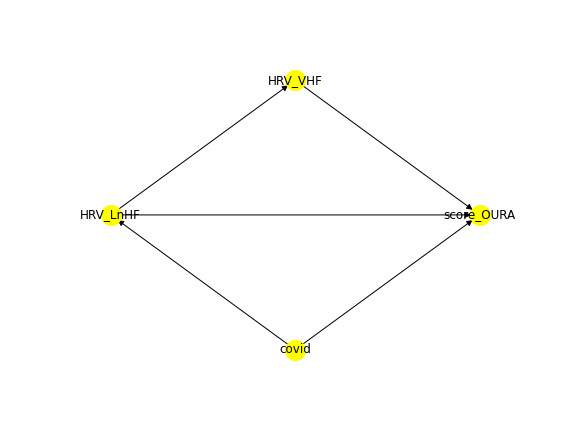

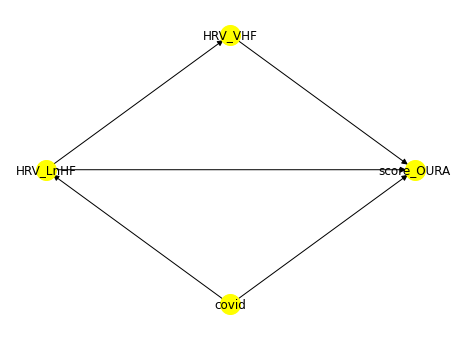

In [182]:
model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [176]:
# Natural direct effect (nde)
identified_estimand_nde = model.identify_effect(estimand_type="nonparametric-nde", 
                                            proceed_when_unidentifiable=True)
print(identified_estimand_nde)

Estimand type: nonparametric-nde

### Estimand : 1
Estimand name: mediation
Estimand expression:
 ⎡     d                         ⎤
E⎢───────────(score_OURA|HRV_VHF)⎥
 ⎣d[HRV_LnHF]                    ⎦
Estimand assumption 1, Mediation: HRV_VHF intercepts (blocks) all directed paths from HRV_LnHF to s,c,o,r,e,_,O,U,R,A except the path {HRV_LnHF}→{s,c,o,r,e,_,O,U,R,A}.
Estimand assumption 2, First-stage-unconfoundedness: If U→{HRV_LnHF} and U→{HRV_VHF} then P(HRV_VHF|HRV_LnHF,U) = P(HRV_VHF|HRV_LnHF)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{HRV_VHF} and U→score_OURA then P(score_OURA|HRV_VHF, HRV_LnHF, U) = P(score_OURA|HRV_VHF, HRV_LnHF)



In [177]:
# Natural indirect effect (nie)
identified_estimand_nie = model.identify_effect(estimand_type="nonparametric-nie", 
                                            proceed_when_unidentifiable=True)
print(identified_estimand_nie)

Estimand type: nonparametric-nie

### Estimand : 1
Estimand name: mediation
Estimand expression:
 ⎡    d                       d                ⎤
E⎢──────────(score_OURA)⋅───────────([HRV_VHF])⎥
 ⎣d[HRV_VHF]             d[HRV_LnHF]           ⎦
Estimand assumption 1, Mediation: HRV_VHF intercepts (blocks) all directed paths from HRV_LnHF to s,c,o,r,e,_,O,U,R,A except the path {HRV_LnHF}→{s,c,o,r,e,_,O,U,R,A}.
Estimand assumption 2, First-stage-unconfoundedness: If U→{HRV_LnHF} and U→{HRV_VHF} then P(HRV_VHF|HRV_LnHF,U) = P(HRV_VHF|HRV_LnHF)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{HRV_VHF} and U→score_OURA then P(score_OURA|HRV_VHF, HRV_LnHF, U) = P(score_OURA|HRV_VHF, HRV_LnHF)



In [178]:
import dowhy.causal_estimators.linear_regression_estimator
causal_estimate_nie = model.estimate_effect(identified_estimand_nie,
                                        method_name="mediation.two_stage_regression",
                                       confidence_intervals=False,
                                       test_significance=False,
                                        method_params = {
                                            'first_stage_model': dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator,
                                            'second_stage_model': dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator
                                        }
                                       )
print(causal_estimate_nie)

two_stage_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': [], 'first_stage_model': <class 'dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator'>, 'second_stage_model': <class 'dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator'>}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': [], 'first_stage_model': <class 'dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator'>, 'second_stage_model': <class 'dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator'>}
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-nie

### Estimand : 1
Estimand name: mediation
Estimand expression:
 ⎡    d                 

In [161]:
print(causal_estimate_nie.value)

-0.37233652841644416


In [179]:
causal_estimate_nde = model.estimate_effect(identified_estimand_nde,
                                        method_name="mediation.two_stage_regression",
                                       confidence_intervals=False,
                                       test_significance=False,
                                        method_params = {
                                            'first_stage_model': dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator,
                                            'second_stage_model': dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator
                                        }
                                       )
print(causal_estimate_nde)

two_stage_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': [], 'first_stage_model': <class 'dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator'>, 'second_stage_model': <class 'dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator'>}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': [], 'first_stage_model': <class 'dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator'>, 'second_stage_model': <class 'dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator'>}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_m

In [ ]:
Mean value: -0.5228461609738319

In [31]:
                    node[id "HRV_MadNN" label "HRV_MadNN"]
                    edge[source "HRV_MadNN" target "score_OURA"]
                    edge[source "HRV_LnHF" target "HRV_MadNN"]

pos_avg_Label           float64
neg_avg_Label           float64
distressed_Label        float64
upset_Label             float64
guilty_Label            float64
                         ...   
score_OURA_lag          float64
distressed_Label_lag    float64
steps_OURA_lag          float64
date1                     int64
covid                     int64
Length: 129, dtype: object

In [96]:
# Define causal model
model=CausalModel(
        data = data, #["distressed_Label_lag","score_OURA", "step_count_PERSONICLE", "steps_OURA", "upset_Label"]
        treatment= ["HRV_MeanNN"], # "inactive_OURA", "inactivity_alerts_OURA
        outcome= "score_OURA",
         common_causes=["covid"],
        )

model._data.dtypes

pos_avg_Label           float64
neg_avg_Label           float64
distressed_Label        float64
upset_Label             float64
guilty_Label            float64
                         ...   
score_OURA_lag          float64
distressed_Label_lag    float64
steps_OURA_lag          float64
date1                     int64
covid                     int64
Length: 129, dtype: object

In [71]:
# # Define causal model
# model=CausalModel(
#         data = data, #["distressed_Label_lag","score_OURA", "step_count_PERSONICLE", "steps_OURA", "upset_Label"]
#         treatment= ["score_move_every_hour_OURA"], # "inactive_OURA", "inactivity_alerts_OURA
#         outcome= "score_OURA",
# #          common_causes=["covid"],
#         )

# model._data.dtypes

pos_avg_Label           float64
neg_avg_Label           float64
distressed_Label        float64
upset_Label             float64
guilty_Label            float64
                         ...   
score_OURA_lag          float64
distressed_Label_lag    float64
steps_OURA_lag          float64
date1                   float64
covid                   float64
Length: 129, dtype: object

In [50]:
# # Define causal model
# model=CausalModel(
#         data = data, #["distressed_Label_lag","score_OURA", "step_count_PERSONICLE", "steps_OURA", "upset_Label"]
#         treatment= ["HRV_MeanNN", "HRV_ULF", "HRV_SDNN", "HRV_LF", "score_move_every_hour_OURA"], # "inactive_OURA", "inactivity_alerts_OURA
#         outcome= "score_OURA",
#          common_causes=["covid"],
#         )

# model._data.dtypes

pos_avg_Label           float64
neg_avg_Label           float64
distressed_Label        float64
upset_Label             float64
guilty_Label            float64
                         ...   
score_OURA_lag          float64
distressed_Label_lag    float64
steps_OURA_lag          float64
date1                   float64
covid                   float64
Length: 129, dtype: object

In [74]:
# # Define causal model
# model=CausalModel(
#         data = data, #["distressed_Label_lag","score_OURA", "step_count_PERSONICLE", "steps_OURA", "upset_Label"]
#         treatment= ["HRV_MeanNN", "HRV_ULF", "HRV_SDNN", "HRV_LF", "HRV_MeanNN", "HRV_SDNN", "HRV_HF", "HRV_VHF", "HRV_TINN", "HRV_MCVNN"], # "inactive_OURA", "inactivity_alerts_OURA
#         outcome= "score_OURA",
#          common_causes=["covid"],
#         )

# model._data.dtypes

pos_avg_Label           float64
neg_avg_Label           float64
distressed_Label        float64
upset_Label             float64
guilty_Label            float64
                         ...   
score_OURA_lag          float64
distressed_Label_lag    float64
steps_OURA_lag          float64
date1                   float64
covid                   float64
Length: 129, dtype: object

In [147]:
# # Define causal model
# #testL
# model=CausalModel(
#         data = data, #["distressed_Label_lag","score_OURA", "step_count_PERSONICLE", "steps_OURA", "upset_Label"]
#         treatment= ["HRV_MeanNN"], # "inactive_OURA", "inactivity_alerts_OURA
#         outcome= "score_OURA",
#          common_causes=["covid"],
#         )

# model._data.dtypes

pos_avg_Label           float64
neg_avg_Label           float64
distressed_Label        float64
upset_Label             float64
guilty_Label            float64
                         ...   
score_OURA_lag          float64
distressed_Label_lag    float64
steps_OURA_lag          float64
date1                   float64
covid                   float64
Length: 129, dtype: object

In [ ]:
# # Define causal model
# #testL
# model=CausalModel(
#         data = data, #["distressed_Label_lag","score_OURA", "step_count_PERSONICLE", "steps_OURA", "upset_Label"]
#         treatment= ["HRV_MeanNN"], # "inactive_OURA", "inactivity_alerts_OURA
#         outcome= "score_OURA",
#          common_causes=["covid"],
#         )

# model._data.dtypes

In [ ]:
# # Define causal model
# #testL
# model=CausalModel(
#         data = data, #["distressed_Label_lag","score_OURA", "step_count_PERSONICLE", "steps_OURA", "upset_Label"]
#         treatment= ["HRV_SDNN"], # "inactive_OURA", "inactivity_alerts_OURA
#         outcome= "score_OURA",
#          common_causes=["covid"],
#         )

# model._data.dtypes

In [159]:
# # Define causal model
# #testL
# model=CausalModel(
#         data = data, #["distressed_Label_lag","score_OURA", "step_count_PERSONICLE", "steps_OURA", "upset_Label"]
#         treatment= ["HRV_LF"], # "inactive_OURA", "inactivity_alerts_OURA
#         outcome= "score_OURA",
# #          common_causes=["covid"],
#         )

# model._data.dtypes

pos_avg_Label           float64
neg_avg_Label           float64
distressed_Label        float64
upset_Label             float64
guilty_Label            float64
                         ...   
score_OURA_lag          float64
distressed_Label_lag    float64
steps_OURA_lag          float64
date1                   float64
covid                   float64
Length: 129, dtype: object

In [80]:
# # Define causal model
# model=CausalModel(
#         data = data, #["distressed_Label_lag","score_OURA", "step_count_PERSONICLE", "steps_OURA", "upset_Label"]
#         treatment= ["HRV_MeanNN", "HRV_ULF", "HRV_SDNN", "HRV_LF", "HRV_VHF", "HRV_TINN", "HRV_MCVNN"], # "inactive_OURA", "inactivity_alerts_OURA
#         outcome= "score_OURA",
#          common_causes=["covid"],
#         )

# model._data.dtypes

pos_avg_Label           float64
neg_avg_Label           float64
distressed_Label        float64
upset_Label             float64
guilty_Label            float64
                         ...   
score_OURA_lag          float64
distressed_Label_lag    float64
steps_OURA_lag          float64
date1                   float64
covid                   float64
Length: 129, dtype: object

In [90]:
# # Define causal model
# model=CausalModel(
#         data = data, #["distressed_Label_lag","score_OURA", "step_count_PERSONICLE", "steps_OURA", "upset_Label"]
#         treatment= ["covid"], # "inactive_OURA", "inactivity_alerts_OURA
#         outcome= "distressed_Label_Next",
# #          common_causes=["covid"],
#         )

# model._data.dtypes

pos_avg_Label           float64
neg_avg_Label           float64
distressed_Label        float64
upset_Label             float64
guilty_Label            float64
                         ...   
score_OURA_lag          float64
distressed_Label_lag    float64
steps_OURA_lag          float64
date1                   float64
covid                   float64
Length: 129, dtype: object

In [105]:
# # Define causal model
# model=CausalModel(
#         data = data, #["distressed_Label_lag","score_OURA", "step_count_PERSONICLE", "steps_OURA", "upset_Label"]
#         treatment= ["HRV_pNN50", "HRV_MinNN", "HRV_LnHF", "HRV_VHF"], # "inactive_OURA", "inactivity_alerts_OURA
#         outcome= "distressed_Label_Next",
#          common_causes=["covid"],
#         )

# model._data.dtypes

pos_avg_Label           float64
neg_avg_Label           float64
distressed_Label        float64
upset_Label             float64
guilty_Label            float64
                         ...   
score_OURA_lag          float64
distressed_Label_lag    float64
steps_OURA_lag          float64
date1                   float64
covid                   float64
Length: 129, dtype: object

In [117]:
# # Define causal model
# model=CausalModel(
#         data = data, #["distressed_Label_lag","score_OURA", "step_count_PERSONICLE", "steps_OURA", "upset_Label"]
#         treatment= ["HRV_pNN50", "HRV_LnHF", "HRV_VHF"], # "inactive_OURA", "inactivity_alerts_OURA
#         outcome= "distressed_Label_Next",
#          common_causes=["covid"],
#         )

# model._data.dtypes

pos_avg_Label           float64
neg_avg_Label           float64
distressed_Label        float64
upset_Label             float64
guilty_Label            float64
                         ...   
score_OURA_lag          float64
distressed_Label_lag    float64
steps_OURA_lag          float64
date1                   float64
covid                   float64
Length: 129, dtype: object

In [101]:
# data.head(20)

In [127]:
# # Define causal model
# model=CausalModel(
#         data = data, #["distressed_Label_lag","score_OURA", "step_count_PERSONICLE", "steps_OURA", "upset_Label"]
#         treatment= ["distressed_Label_lag", "rest_OURA", "rem_OURA"], # "inactive_OURA", "inactivity_alerts_OURA
#         outcome= "distressed_Label_Next",
#          common_causes=["covid"],
#         )

# model._data.dtypes

pos_avg_Label           float64
neg_avg_Label           float64
distressed_Label        float64
upset_Label             float64
guilty_Label            float64
                         ...   
score_OURA_lag          float64
distressed_Label_lag    float64
steps_OURA_lag          float64
date1                   float64
covid                   float64
Length: 129, dtype: object

In [135]:
# # Define causal model
# model=CausalModel(
#         data = data, #["distressed_Label_lag","score_OURA", "step_count_PERSONICLE", "steps_OURA", "upset_Label"]
#         treatment= ["distressed_Label_lag", "steps_OURA_lag", "rest_OURA", "rem_OURA"], # "inactive_OURA", "inactivity_alerts_OURA
#         outcome= "distressed_Label_Next",
#          common_causes=["covid"],
#         )

# model._data.dtypes

pos_avg_Label           float64
neg_avg_Label           float64
distressed_Label        float64
upset_Label             float64
guilty_Label            float64
                         ...   
score_OURA_lag          float64
distressed_Label_lag    float64
steps_OURA_lag          float64
date1                   float64
covid                   float64
Length: 129, dtype: object

In [139]:
# # Define causal model
# model=CausalModel(
#         data = data, #["distressed_Label_lag","score_OURA", "step_count_PERSONICLE", "steps_OURA", "upset_Label"]
#         treatment= ["distressed_Label_lag", "steps_OURA", "rest_OURA", "rem_OURA"], # "inactive_OURA", "inactivity_alerts_OURA
#         outcome= "distressed_Label_Next",
#          common_causes=["covid"],
#         )

# model._data.dtypes

pos_avg_Label           float64
neg_avg_Label           float64
distressed_Label        float64
upset_Label             float64
guilty_Label            float64
                         ...   
score_OURA_lag          float64
distressed_Label_lag    float64
steps_OURA_lag          float64
date1                   float64
covid                   float64
Length: 129, dtype: object

In [55]:
# # Define causal model
# model=CausalModel(
#         data = data, #["distressed_Label_lag","score_OURA", "step_count_PERSONICLE", "steps_OURA", "upset_Label"]
#         treatment= ["distressed_Label_lag", "met_min_inactive_OURA", "HRV_MeanNN", "HRV_TINN", "HRV_LnHF", "HRV_pNN50", "HRV_VHF", "rest_OURA"], # "inactive_OURA", "inactivity_alerts_OURA
#         outcome= "distressed_Label_Next",
#          common_causes=["covid"],
#         )

# model._data.dtypes

pos_avg_Label           float64
neg_avg_Label           float64
distressed_Label        float64
upset_Label             float64
guilty_Label            float64
                         ...   
score_OURA_lag          float64
distressed_Label_lag    float64
steps_OURA_lag          float64
covid                   float64
date1                   float64
Length: 129, dtype: object

In [94]:
# # Define causal model
# model=CausalModel(
#         data = data, 
#         treatment= ["distressed_Label_lag","score_OURA", "step_count_PERSONICLE", "steps_OURA", "upset_Label"], # "inactive_OURA", "inactivity_alerts_OURA
#         outcome= "distressed_Label_Next",
# #          common_causes=["inspired_Label", "inactivity_alerts_OURA", "active_Label", "guilty_Label", "date"],
#         )

# model._data.dtypes

date                       int64
pos_avg_Label            float64
neg_avg_Label            float64
distressed_Label         float64
upset_Label              float64
                          ...   
inactive_OURA            float64
step_count_PERSONICLE    float64
score_OURA_lag           float64
distressed_Label_lag     float64
steps_OURA_lag           float64
Length: 63, dtype: object

In [68]:
# # Define causal model
# model=CausalModel(
#         data = data, 
#         treatment= ["distressed_Label_lag","score_OURA", "step_count_PERSONICLE", "steps_OURA", "upset_Label", "scared_Label"
#                    , "active_Label", "mean_hr_OURA", "irritable_Label", "total_OURA",
#                    "guilty_Label", "hostile_Label"], # "inactive_OURA", "inactivity_alerts_OURA
#         outcome= "distressed_Label_Next",
#         common_causes=["date"],
# #          common_causes=["inspired_Label", "inactivity_alerts_OURA", "active_Label", "guilty_Label", "date"],
#         )

# model._data.dtypes

date                       int64
pos_avg_Label            float64
neg_avg_Label            float64
distressed_Label         float64
upset_Label              float64
                          ...   
step_count_PERSONICLE    float64
score_OURA_lag           float64
distressed_Label_lag     float64
steps_OURA_lag           float64
date1                      int64
Length: 64, dtype: object

In [21]:
# # Define causal model
# model=CausalModel( #"scared_Label","active_Label", "inactivity_alerts_OURA", 
#         data = data, #"cal_active_OURA",  "inactive_OURA", "mean_hrv_OURA", "step_count_PERSONICLE", "steps_OURA",
#         treatment= ["scared_Label_Next","active_Label_Next", "mean_hrv_OURA", "step_count_PERSONICLE", "steps_OURA","score_OURA_lag"], # "inactive_OURA", "inactivity_alerts_OURA
#         outcome= "score_OURA",
#         common_causes=["date", "inactive_OURA"],#"date1", 
#     #common_causes=["inspired_Label", "inactivity_alerts_OURA", "active_Label", "guilty_Label", "date"],

# #          common_causes=["inspired_Label", "inactivity_alerts_OURA", "active_Label", "guilty_Label", "date"],
#         )

# model._data.dtypes

date                       int64
pos_avg_Label            float64
neg_avg_Label            float64
distressed_Label         float64
upset_Label              float64
                          ...   
step_count_PERSONICLE    float64
score_OURA_lag           float64
distressed_Label_lag     float64
steps_OURA_lag           float64
date1                      int64
Length: 64, dtype: object

In [116]:
# #ITE
# # Define causal model
# model=CausalModel(
#         data = data, 
# #         treatment= ["score_OURA"],
#         treatment= ["distressed_Label_lag","score_OURA", "step_count_PERSONICLE", "steps_OURA", "upset_Label"], # "inactive_OURA", "inactivity_alerts_OURA
#         outcome= "distressed_Label_Next",
#         effect_modifiers="score_OURA",   # the variables on which to compute the CATE
# #          common_causes=["inspired_Label", "inactivity_alerts_OURA", "active_Label", "guilty_Label", "date"],
#         )

# model._data.dtypes

date                       int64
pos_avg_Label            float64
neg_avg_Label            float64
distressed_Label         float64
upset_Label              float64
                          ...   
inactive_OURA            float64
step_count_PERSONICLE    float64
score_OURA_lag           float64
distressed_Label_lag     float64
steps_OURA_lag           float64
Length: 63, dtype: object

In [190]:
#inference

# Define causal model
model=CausalModel(
        data = data1, 
        treatment= ["HRV_HF"], 
        outcome= "score_OURA",
#          common_causes=["covid", "mean_hrv_OURA", "HRV_MeanNN", "HRV_MCVNN"],
        )

model._data.dtypes

pos_avg_Label           float64
neg_avg_Label           float64
distressed_Label        float64
upset_Label             float64
guilty_Label            float64
                         ...   
score_OURA_lag          float64
distressed_Label_lag    float64
steps_OURA_lag          float64
date1                   float64
covid                   float64
Length: 129, dtype: object

In [158]:
# #inference

# # Define causal model
# model=CausalModel(
#         data = data, #["distressed_Label_lag","score_OURA", "step_count_PERSONICLE", "steps_OURA", "upset_Label"]
#         treatment= ["HRV_MadNN"], # "inactive_OURA", "inactivity_alerts_OURA
#         outcome= "score_OURA",
# #         common_causes="covid",
#          common_causes=["covid", "mean_hrv_OURA", "std_hr_OURA", "HRV_MeanNN"],
#         )

# model._data.dtypes

pos_avg_Label           float64
neg_avg_Label           float64
distressed_Label        float64
upset_Label             float64
guilty_Label            float64
                         ...   
score_OURA_lag          float64
distressed_Label_lag    float64
steps_OURA_lag          float64
date1                     int64
covid                     int64
Length: 129, dtype: object

In [177]:
# #inference

# # Define causal model
# model=CausalModel(
#         data = data1, 
#         treatment= ["score_OURA_lag"], 
#         outcome= "score_OURA",
#          common_causes=["covid", "HRV_IQRNN", "steps_OURA_lag", "HRV_HF", "HRV_SDNN"]
#         )

# model._data.dtypes

pos_avg_Label           float64
neg_avg_Label           float64
distressed_Label        float64
upset_Label             float64
guilty_Label            float64
                         ...   
score_OURA_lag          float64
distressed_Label_lag    float64
steps_OURA_lag          float64
date1                   float64
covid                   float64
Length: 129, dtype: object

In [182]:
#inference

# Define causal model
model=CausalModel(
        data = data1, 
        treatment= ["HRV_pNN50"], 
        outcome= "score_OURA",
#          common_causes=["covid", "HRV_IQRNN", "steps_OURA_lag", "HRV_HF", "HRV_SDNN"]
        )

model._data.dtypes

pos_avg_Label           float64
neg_avg_Label           float64
distressed_Label        float64
upset_Label             float64
guilty_Label            float64
                         ...   
score_OURA_lag          float64
distressed_Label_lag    float64
steps_OURA_lag          float64
date1                   float64
covid                   float64
Length: 129, dtype: object

In [192]:
# Define causal model
model=CausalModel(
        data = data1, #["distressed_Label_lag","score_OURA", "step_count_PERSONICLE", "steps_OURA", "upset_Label"]
        treatment= ["HRV_LnHF"], # "inactive_OURA", "inactivity_alerts_OURA
        outcome= "score_OURA",
#          common_causes=["covid"],
        )

model._data.dtypes

pos_avg_Label           float64
neg_avg_Label           float64
distressed_Label        float64
upset_Label             float64
guilty_Label            float64
                         ...   
score_OURA_lag          float64
distressed_Label_lag    float64
steps_OURA_lag          float64
date1                   float64
covid                   float64
Length: 129, dtype: object

In [230]:
#inference

# Define causal model
model=CausalModel(
        data = data1, 
        treatment= ["score_OURA_lag"], 
        outcome= "score_OURA",
        common_causes=["covid", "HRV_IQRNN", "steps_OURA_lag", "HRV_HF", "HRV_SDNN"]
#          common_causes=["covid", "HRV_IQRNN", "steps_OURA_lag", "HRV_HF", "HRV_SDNN"]
        )

model._data.dtypes

pos_avg_Label           float64
neg_avg_Label           float64
distressed_Label        float64
upset_Label             float64
guilty_Label            float64
                         ...   
score_OURA_lag          float64
distressed_Label_lag    float64
steps_OURA_lag          float64
date1                   float64
covid                   float64
Length: 129, dtype: object

In [277]:
#inference

# Define causal model
model=CausalModel(
        data = data1, 
        treatment= ["score_stay_active_OURA"], 
        outcome= "score_OURA",
        common_causes=["covid", "HRV_LnHF", "HRV_ULF"]
#          common_causes=["covid", "HRV_IQRNN", "steps_OURA_lag", "HRV_HF", "HRV_SDNN"]
        )

model._data.dtypes

pos_avg_Label           float64
neg_avg_Label           float64
distressed_Label        float64
upset_Label             float64
guilty_Label            float64
                         ...   
score_OURA_lag          float64
distressed_Label_lag    float64
steps_OURA_lag          float64
date1                   float64
covid                   float64
Length: 129, dtype: object

In [52]:
#inference

# Define causal model
model=CausalModel(
        data = data1, 
        treatment= ["HRV_MadNN", "covid"], 
        outcome= "score_OURA",
#         common_causes=["covid", "HRV_LnHF", "HRV_ULF"]
#          common_causes=["covid", "HRV_IQRNN", "steps_OURA_lag", "HRV_HF", "HRV_SDNN"]
        )

model._data.dtypes

pos_avg_Label           float64
neg_avg_Label           float64
distressed_Label        float64
upset_Label             float64
guilty_Label            float64
                         ...   
score_OURA_lag          float64
distressed_Label_lag    float64
steps_OURA_lag          float64
date1                   float64
covid                   float64
Length: 129, dtype: object

In [53]:
data1["HRV_MadNN"].max()

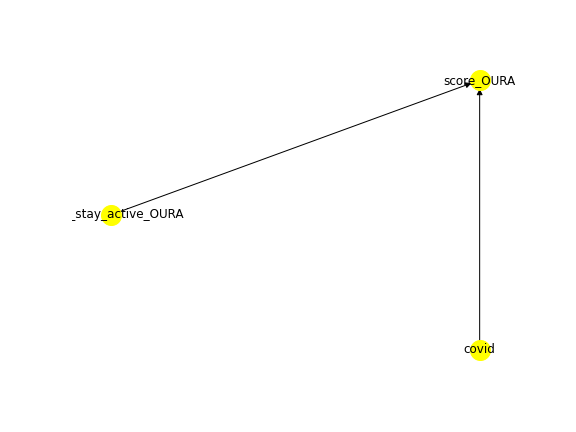

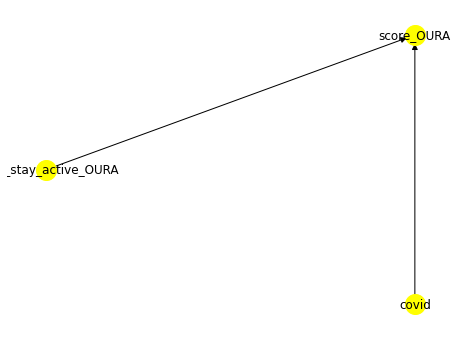

In [41]:
model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [54]:
identified_estimand= model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                        
───────────────────(E[score_OURA])
d[HRV_MadNN  covid]               
Estimand assumption 1, Unconfoundedness: If U→{HRV_MadNN,covid} and U→score_OURA then P(score_OURA|HRV_MadNN,covid,,U) = P(score_OURA|HRV_MadNN,covid,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [55]:

# 1) Linear ITE/CATE estimator (in-built in DoWhy)
linear_estimate = model.estimate_effect(identified_estimand, 
                                        method_name="backdoor.linear_regression",
                                       control_value=(0,0),
                                       treatment_value=(1,1))
print(linear_estimate)


linear_regression
{'control_value': (0, 0), 'treatment_value': (1, 1), 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                        
───────────────────(E[score_OURA])
d[HRV_MadNN  covid]               
Estimand assumption 1, Unconfoundedness: If U→{HRV_MadNN,covid} and U→score_OURA then P(score_OURA|HRV_MadNN,covid,,U) = P(score_OURA|HRV_MadNN,covid,)

## Realized estimand
b: score_OURA~HRV_MadNN+covid
Target units: ate

## Estimate
Mean value: 0.44743420706747333



In [275]:

# 1) Linear ITE/CATE estimator (in-built in DoWhy)
linear_estimate = model.estimate_effect(identified_estimand, 
                                        method_name="backdoor.linear_regression",
                                       control_value=0,
                                       treatment_value=1)
print(linear_estimate)


linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                                                    
─────────────────────────(E[score_OURA|HRV_MadNN,covid,HRV_LnHF])
d[score_stay_active_OURA]                                        
Estimand assumption 1, Unconfoundedness: If U→{score_stay_active_OURA} and U→score_OURA then P(score_OURA|score_stay_active_OURA,HRV_MadNN,covid,HRV_LnHF,U) = P(score_OURA|score_stay_active_OURA,HRV_MadNN,covid,HRV_LnHF)

## Realized estimand
b: score_OURA~score_stay_active_OURA+HRV_MadNN+covid+HRV_LnHF
Target units: ate

## Estimate
Mean value: 0.5853804504002594



In [51]:
import econml
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor
dml_estimate = model.estimate_effect(identified_estimand, method_name="backdoor.econml.dml.DML",
                                     control_value = 0,
                                     treatment_value = 1,
                                 target_units = 1,  # condition used for CATE
                                 confidence_intervals=False,
                                method_params={"init_params":{'model_y':GradientBoostingRegressor(),
                                                              'model_t': GradientBoostingRegressor(),
                                                              "model_final":LassoCV(fit_intercept=False), 
                                                              'featurizer':PolynomialFeatures(degree=1, include_bias=True)},
                                               "fit_params":{}})
print(dml_estimate)

ValueError: y should be a 1d array, got an array of shape (897, 2) instead.

In [ ]:
    https://github.com/py-why/dowhy/blob/main/docs/source/example_notebooks/dowhy-conditional-treatment-effects.ipynb
    https://github.com/py-why/dowhy/issues/11

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                           
─────────────────────────(E[score_OURA])
d[score_stay_active_OURA]               
Estimand assumption 1, Unconfoundedness: If U→{score_stay_active_OURA} and U→score_OURA then P(score_OURA|score_stay_active_OURA,,U) = P(score_OURA|score_stay_active_OURA,)

## Realized estimand
b: score_OURA~score_stay_active_OURA | 
Target units: 

## Estimate
Mean value: 0.7087023039994291
Effect estimates: [0.7087023 0.7087023 0.7087023 ... 0.7087023 0.7087023 0.7087023]



In [19]:
# # III. Estimate the target estimand using a statistical method.
# propensity_strat_estimate = model.estimate_effect(identified_estimand,
#                                  method_name="backdoor.dowhy.propensity_score_stratification")

# print(propensity_strat_estimate)

In [15]:
# causal_estimate_dmatch = model.estimate_effect(identified_estimand,
#                                               method_name="backdoor.distance_matching",
#                                               target_units="att",
#                                               method_params={'distance_metric':"minkowski", 'p':2})
# print(causal_estimate_dmatch)
# print("Causal Estimate is " + str(causal_estimate_dmatch.value))

In [39]:
import econml
## Ignore warnings
import warnings
warnings.filterwarnings('ignore')
from dowhy import causal_estimators

# Main imports
#from econml.dml import DMLCateEstimator, LinearDMLCateEstimator,SparseLinearDMLCateEstimator  

In [38]:
conda install -c conda-forge shap

^C

Note: you may need to restart the kernel to use updated packages.


In [40]:
# # III. Estimate the target estimand using a statistical method.
# propensity_strat_estimate = model.estimate_effect(identified_estimand,
#                                  method_name="backdoor.dowhy.propensity_score_stratification")

# print(propensity_strat_estimate)

In [21]:
from scipy.signal._signaltools import _centered

In [59]:
import econml
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor
dml_estimate = model.estimate_effect(identified_estimand, 
                                    method_name="backdoor.econml.dml.DML",
                                    method_params={
                                        'init_params': {'model_y':GradientBoostingRegressor(),
                                                        'model_t': GradientBoostingRegressor(),
                                                        'model_final':LassoCV(fit_intercept=False), },
                                        'fit_params': {}
                                     })
print(dml_estimate)

ValueError: y should be a 1d array, got an array of shape (897, 10) instead.

In [143]:
# Textual Interpreter
interpretation = dml_estimate.interpret(method_name="textual_effect_interpreter")

Increasing the treatment variable(s) [score_move_every_hour_OURA] from [0] to [1] causes an increase of 0.539052727835286 in the expected value of the outcome [score_OURA], over the data distribution/population represented by the dataset.


In [ ]:
#FIND
#rri_hf--n
#rri_lf_hf--n
#edr_vlf

In [69]:
## Define causal model
model=CausalModel(
        data = X,
        treatment= "edr_vlf",
        outcome= "apnae",
             common_causes=["edr_hf"],
        )

model._data.dtypes

rmssd        float64
sdnn         float64
nn50         float64
pnn50        float64
mrri         float64
mhr          float64
rri_vlf      float64
rri_lf       float64
rri_hf       float64
rri_lf_hf    float64
rri_lfnu     float64
rri_hfnu     float64
edr_vlf      float64
edr_lf       float64
edr_hf       float64
edr_lf_hf    float64
edr_lfnu     float64
edr_hfnu     float64
apnae        float64
dtype: object

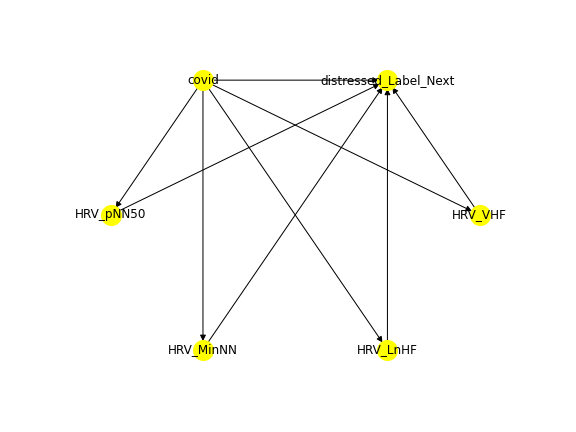

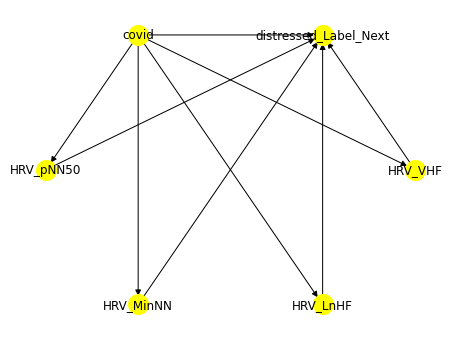

In [109]:
model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [71]:
identified_estimand= model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                      
──────────(E[apnae|edr_hf])
d[edr_vlf]                 
Estimand assumption 1, Unconfoundedness: If U→{edr_vlf} and U→apnae then P(apnae|edr_vlf,edr_hf,U) = P(apnae|edr_vlf,edr_hf)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [46]:
import econml
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor
dml_estimate = model.estimate_effect(identified_estimand, 
                                    method_name="backdoor.econml.dml.DML",
                                    method_params={
                                        'init_params': {'model_y':GradientBoostingRegressor(),
                                                        'model_t': GradientBoostingRegressor(),
                                                        'model_final':LassoCV(fit_intercept=False), },
                                        'fit_params': {}
                                     })
print(dml_estimate)

ValueError: y should be a 1d array, got an array of shape (897, 9) instead.

In [46]:
# Textual Interpreter
interpretation = dml_estimate.interpret(method_name="textual_effect_interpreter")

Increasing the treatment variable(s) [score_OURA] from [0] to [1] causes an increase of 0.21185583417338436 in the expected value of the outcome [distressed_Label_Next], over the data distribution/population represented by the dataset.


In [ ]:
#end

In [123]:
causal_estimate_reg = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression",
        test_significance=True)
print(causal_estimate_reg)
print("Causal Estimate is " + str(causal_estimate_reg.value))
# print("ATE", np.mean(data_1["outcome"])- np.mean(data_0["outcome"]))
# print("Causal Estimate is " + str(estimate.value))

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': True, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
                        d                                                     
──────────────────────────────────────────────────(E[distressed_Label_Next|cov
d[distressed_Label_lag  steps_OURA_lag  rest_OURA]                            

    
id])
    
Estimand assumption 1, Unconfoundedness: If U→{distressed_Label_lag,steps_OURA_lag,rest_OURA} and U→distressed_Label_Next then P(distressed_Label_Next|distressed_Label_lag,steps_OURA_lag,rest_OURA,covid,U) = P(distressed_Label_Next|distressed_Label_lag,steps_OURA_lag,rest_OURA,covid)

## Realized estimand
b: distressed_Label_Next~distressed_Label_lag+steps_OURA_lag+rest_OURA+covid
Target units: ate


In [48]:
# Textual Interpreter
interpretation = causal_estimate_reg.interpret(method_name="textual_effect_interpreter")

Increasing the treatment variable(s) [distressed_Label_lag,met_min_inactive_OURA,HRV_MeanNN,HRV_TINN,HRV_LnHF,pos_avg_Label_Next,HRV_pNN50,HRV_VHF,rest_OURA] from 0 to 1 causes an increase of 0.07073974390916526 in the expected value of the outcome [distressed_Label_Next], over the data distribution/population represented by the dataset.


In [15]:
conda install -c conda-forge dowhy

^C

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install -e

Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Users\19492\anaconda3\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\Users\19492\anaconda3\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\Users\19492\anaconda3\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\Users\19492\anaconda3\python.exe -m pip install [options] [-e] <local project path> ...
  C:\Users\19492\anaconda3\python.exe -m pip install [options] <archive url/path> ...

-e option requires 1 argument


In [17]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\19492\anaconda3

  added / updated specs:
    - dowhy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.12.0               |   py38haa244fe_0         1.0 MB  conda-forge
    dowhy-0.8                  |     pyhd8ed1ab_0         189 KB  conda-forge
    pydot-1.4.2                |   py38haa244fe_2          43 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.2 MB

The following NEW packages will be INSTALLED:

  dowhy              conda-forge/noarch::dowhy-0.8-pyhd8ed1ab_0
  pydot              conda-forge/win-64::pydot-1.4.2-py38haa244fe_2

The following packages


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::imagecodecs==2021.3.31=py38h5da4933_0
  - defaults/win-64::scikit-image==0.18.1=py38hf11a4ad_0
  - defaults/noarch::tifffile==2021.4.8=pyhd3eb1b0_2


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda




==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [47]:
import econml
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor
dml_estimate = model.estimate_effect(identified_estimand, 
                                    method_name="backdoor.econml.dml.DML",
                                    method_params={
                                        'init_params': {'model_y':GradientBoostingRegressor(),
                                                        'model_t': GradientBoostingRegressor(),
                                                        'model_final':LassoCV(fit_intercept=False), },
                                        'fit_params': {}
                                     })
print(dml_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                            
─────────────(E[distressed_Label_Next|upset_Label])
d[score_OURA]                                      
Estimand assumption 1, Unconfoundedness: If U→{score_OURA} and U→distressed_Label_Next then P(distressed_Label_Next|score_OURA,upset_Label,U) = P(distressed_Label_Next|score_OURA,upset_Label)

## Realized estimand
b: distressed_Label_Next~score_OURA+upset_Label | 
Target units: ate

## Estimate
Mean value: 0.21550160004988456
Effect estimates: [0.2155016 0.2155016 0.2155016 ... 0.2155016 0.2155016 0.2155016]



In [23]:
!conda update -n base -c defaults %conda

^C


In [56]:

dml_estimate = model.estimate_effect(identified_estimand, method_name="backdoor.econml.dml.DML",
                                     control_value = 0,
                                     treatment_value = 1,
                                 target_units = "ate",
                                 confidence_intervals=False,
                                 method_params={"init_params":{'model_y':GradientBoostingRegressor(),
                                                              'model_t': GradientBoostingRegressor(),
                                                              "model_final":LassoCV(fit_intercept=False),
                                                              'featurizer':PolynomialFeatures(degree=1, include_bias=False)},
                                                "fit_params":{}})
print(dml_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d             
───────(E[apnae])
d[sdnn]          
Estimand assumption 1, Unconfoundedness: If U→{sdnn} and U→apnae then P(apnae|sdnn,,U) = P(apnae|sdnn,)

## Realized estimand
b: apnae~sdnn | 
Target units: ate

## Estimate
Mean value: 0.03366692986303732
Effect estimates: [0.03366693 0.03366693 0.03366693 0.03366693 0.03366693 0.03366693
 0.03366693 0.03366693 0.03366693 0.03366693 0.03366693 0.03366693
 0.03366693 0.03366693 0.03366693 0.03366693 0.03366693 0.03366693
 0.03366693 0.03366693 0.03366693 0.03366693 0.03366693 0.03366693
 0.03366693 0.03366693 0.03366693 0.03366693 0.03366693 0.03366693
 0.03366693 0.03366693 0.03366693 0.03366693 0.03366693 0.03366693
 0.03366693 0.03366693 0.03366693 0.03366693 0.03366693 0.03366693
 0.03366693 0.03366693 0.03366693 0.03366693 0.03366693 0.03366693
 0.03366693 0.03366693 0.03366693 0.033666

In [57]:
identified_estimand_experiment = model.identify_effect(proceed_when_unidentifiable=True)

from sklearn.ensemble import RandomForestRegressor
metalearner_estimate = model.estimate_effect(identified_estimand_experiment,
                                method_name="backdoor.econml.metalearners.TLearner",
                                confidence_intervals=False,
                                method_params={"init_params":{
                                                    'models': RandomForestRegressor()
                                                    },
                                               "fit_params":{}
                                              })
print(metalearner_estimate)

ValueError: Expected 2D array, got scalar array instead:
array=None.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [58]:

causal_estimate_reg = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression",
        test_significance=True)
print(causal_estimate_reg)
print("Causal Estimate is " + str(causal_estimate_reg.value))

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': True, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d             
───────(E[apnae])
d[sdnn]          
Estimand assumption 1, Unconfoundedness: If U→{sdnn} and U→apnae then P(apnae|sdnn,,U) = P(apnae|sdnn,)

## Realized estimand
b: apnae~sdnn
Target units: ate

## Estimate
Mean value: 0.23887649551863485
p-value: [8.97050748e-08]

Causal Estimate is 0.23887649551863485


In [59]:
data.columns

Index(['rmssd', 'sdnn', 'nn50', 'pnn50', 'mrri', 'mhr', 'rri_vlf', 'rri_lf',
       'rri_hf', 'rri_lf_hf', 'rri_lfnu', 'rri_hfnu', 'edr_vlf', 'edr_lf',
       'edr_hf', 'edr_lf_hf', 'edr_lfnu', 'edr_hfnu', 'apnae'],
      dtype='object')

In [64]:
# Define causal model
model=CausalModel(
        data = X,
        treatment= "sdnn",
        outcome= "apnae",
         common_causes="rmssd",
        )

model._data.dtypes

rmssd        float64
sdnn         float64
nn50         float64
pnn50        float64
mrri         float64
mhr          float64
rri_vlf      float64
rri_lf       float64
rri_hf       float64
rri_lf_hf    float64
rri_lfnu     float64
rri_hfnu     float64
edr_vlf      float64
edr_lf       float64
edr_hf       float64
edr_lf_hf    float64
edr_lfnu     float64
edr_hfnu     float64
apnae        float64
dtype: object

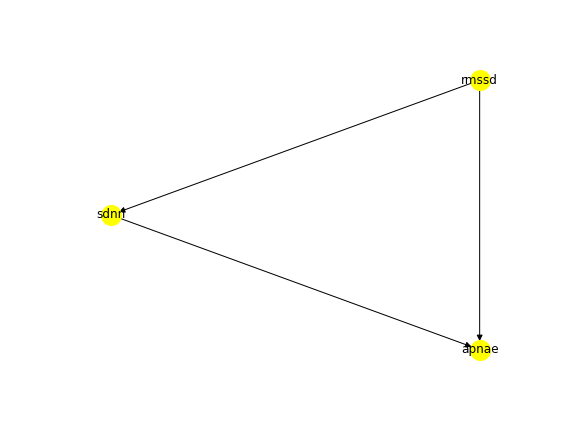

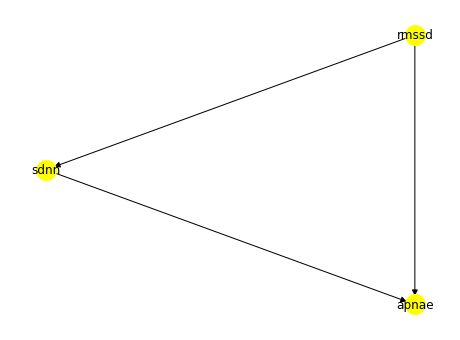

In [65]:
model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [66]:
identified_estimand= model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                   
───────(E[apnae|rmssd])
d[sdnn]                
Estimand assumption 1, Unconfoundedness: If U→{sdnn} and U→apnae then P(apnae|sdnn,rmssd,U) = P(apnae|sdnn,rmssd)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [67]:

dml_estimate = model.estimate_effect(identified_estimand, method_name="backdoor.econml.dml.DML",
                                     control_value = 0,
                                     treatment_value = 1,
                                 target_units = "ate",
                                 confidence_intervals=False,
                                 method_params={"init_params":{'model_y':GradientBoostingRegressor(),
                                                              'model_t': GradientBoostingRegressor(),
                                                              "model_final":LassoCV(fit_intercept=False),
                                                              'featurizer':PolynomialFeatures(degree=1, include_bias=False)},
                                                "fit_params":{}})
print(dml_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                   
───────(E[apnae|rmssd])
d[sdnn]                
Estimand assumption 1, Unconfoundedness: If U→{sdnn} and U→apnae then P(apnae|sdnn,rmssd,U) = P(apnae|sdnn,rmssd)

## Realized estimand
b: apnae~sdnn+rmssd | 
Target units: ate

## Estimate
Mean value: 3.929815366742389e-17
Effect estimates: [3.92981537e-17 3.92981537e-17 3.92981537e-17 3.92981537e-17
 3.92981537e-17 3.92981537e-17 3.92981537e-17 3.92981537e-17
 3.92981537e-17 3.92981537e-17 3.92981537e-17 3.92981537e-17
 3.92981537e-17 3.92981537e-17 3.92981537e-17 3.92981537e-17
 3.92981537e-17 3.92981537e-17 3.92981537e-17 3.92981537e-17
 3.92981537e-17 3.92981537e-17 3.92981537e-17 3.92981537e-17
 3.92981537e-17 3.92981537e-17 3.92981537e-17 3.92981537e-17
 3.92981537e-17 3.92981537e-17 3.92981537e-17 3.92981537e-17
 3.92981537e-17 3.92981537e-17 3.92981537e-17 3.929815

In [23]:
causal_estimate_reg = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression",
        test_significance=True)
print(causal_estimate_reg)
print("Causal Estimate is " + str(causal_estimate_reg.value))
# print("ATE", np.mean(data_1["outcome"])- np.mean(data_0["outcome"]))
# print("Causal Estimate is " + str(estimate.value))

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': True, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                  
──────────(E[A06281DE])
d[C₀₆₀₀₀₈]             
Estimand assumption 1, Unconfoundedness: If U→{C060008} and U→A06281DE then P(A06281DE|C060008,,U) = P(A06281DE|C060008,)

## Realized estimand
b: A06281DE~C060008
Target units: ate

## Estimate
Mean value: 0.8782234857060773
p-value: [0.]

Causal Estimate is 0.8782234857060773


In [ ]:
#rmssd

In [68]:
data.columns

Index(['rmssd', 'sdnn', 'nn50', 'pnn50', 'mrri', 'mhr', 'rri_vlf', 'rri_lf',
       'rri_hf', 'rri_lf_hf', 'rri_lfnu', 'rri_hfnu', 'edr_vlf', 'edr_lf',
       'edr_hf', 'edr_lf_hf', 'edr_lfnu', 'edr_hfnu', 'apnae'],
      dtype='object')

In [69]:
# Define causal model
model=CausalModel(
        data = X,
        treatment= "rmssd",
        outcome= "apnae",
#         common_causes="age",
        )

model._data.dtypes

rmssd        float64
sdnn         float64
nn50         float64
pnn50        float64
mrri         float64
mhr          float64
rri_vlf      float64
rri_lf       float64
rri_hf       float64
rri_lf_hf    float64
rri_lfnu     float64
rri_hfnu     float64
edr_vlf      float64
edr_lf       float64
edr_hf       float64
edr_lf_hf    float64
edr_lfnu     float64
edr_hfnu     float64
apnae        float64
dtype: object

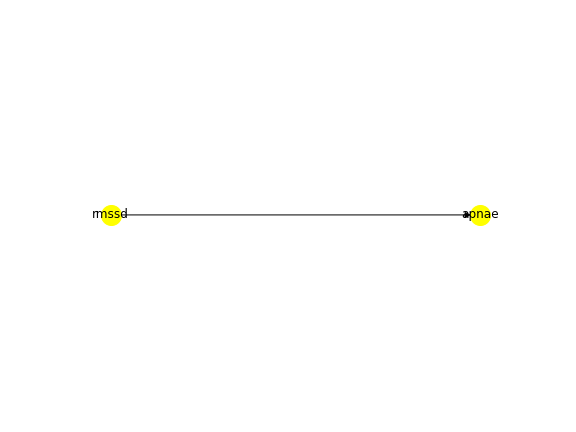

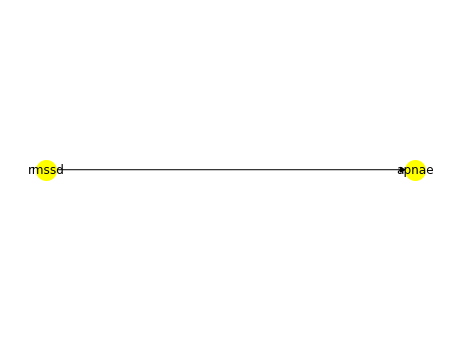

In [70]:
model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [71]:
identified_estimand= model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d              
────────(E[apnae])
d[rmssd]          
Estimand assumption 1, Unconfoundedness: If U→{rmssd} and U→apnae then P(apnae|rmssd,,U) = P(apnae|rmssd,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [72]:
import econml
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor
dml_estimate = model.estimate_effect(identified_estimand, 
                                    method_name="backdoor.econml.dml.DML",
                                    method_params={
                                        'init_params': {'model_y':GradientBoostingRegressor(),
                                                        'model_t': GradientBoostingRegressor(),
                                                        'model_final':LassoCV(fit_intercept=False), },
                                        'fit_params': {}
                                     })
print(dml_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d              
────────(E[apnae])
d[rmssd]          
Estimand assumption 1, Unconfoundedness: If U→{rmssd} and U→apnae then P(apnae|rmssd,,U) = P(apnae|rmssd,)

## Realized estimand
b: apnae~rmssd | 
Target units: ate

## Estimate
Mean value: 0.0
Effect estimates: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.

In [ ]:
#rmssd

In [ ]:
#mhr

In [124]:
# Define causal model
model=CausalModel(
        data = X,
        treatment= "rmssd",
        outcome= "apnae",
#         common_causes="age",
        )

model._data.dtypes

rmssd        float64
sdnn         float64
nn50         float64
pnn50        float64
mrri         float64
mhr          float64
rri_vlf      float64
rri_lf       float64
rri_hf       float64
rri_lf_hf    float64
rri_lfnu     float64
rri_hfnu     float64
edr_vlf      float64
edr_lf       float64
edr_hf       float64
edr_lf_hf    float64
edr_lfnu     float64
edr_hfnu     float64
apnae        float64
dtype: object

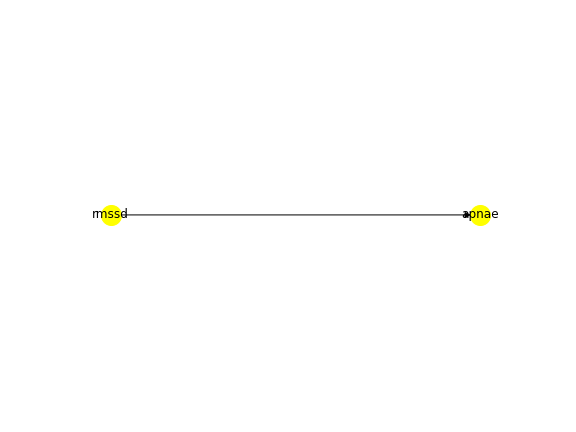

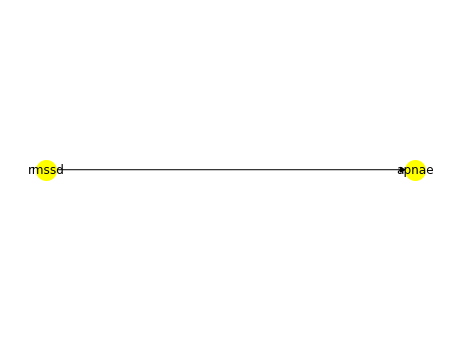

In [125]:
model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [126]:
identified_estimand= model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d              
────────(E[apnae])
d[rmssd]          
Estimand assumption 1, Unconfoundedness: If U→{rmssd} and U→apnae then P(apnae|rmssd,,U) = P(apnae|rmssd,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [127]:
import econml
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor
dml_estimate = model.estimate_effect(identified_estimand, 
                                    method_name="backdoor.econml.dml.DML",
                                    method_params={
                                        'init_params': {'model_y':GradientBoostingRegressor(),
                                                        'model_t': GradientBoostingRegressor(),
                                                        'model_final':LassoCV(fit_intercept=False), },
                                        'fit_params': {}
                                     })
print(dml_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d              
────────(E[apnae])
d[rmssd]          
Estimand assumption 1, Unconfoundedness: If U→{rmssd} and U→apnae then P(apnae|rmssd,,U) = P(apnae|rmssd,)

## Realized estimand
b: apnae~rmssd | 
Target units: ate

## Estimate
Mean value: 0.0
Effect estimates: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.

In [119]:
# X

In [ ]:
#mhr

In [ ]:
#rri_hfnu

In [140]:
# Define causal model
model=CausalModel(
        data = X,
        treatment= "rri_hf",
        outcome= "apnae",
#           common_causes=["mrri", "sdnn", "rri_lf_hf", "rri_lfnu"],
        )

model._data.dtypes

rmssd        float64
sdnn         float64
nn50         float64
pnn50        float64
mrri         float64
mhr          float64
rri_vlf      float64
rri_lf       float64
rri_hf       float64
rri_lf_hf    float64
rri_lfnu     float64
rri_hfnu     float64
edr_vlf      float64
edr_lf       float64
edr_hf       float64
edr_lf_hf    float64
edr_lfnu     float64
edr_hfnu     float64
apnae        float64
dtype: object

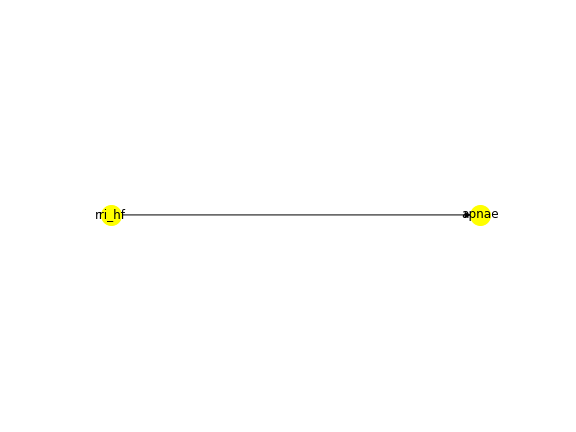

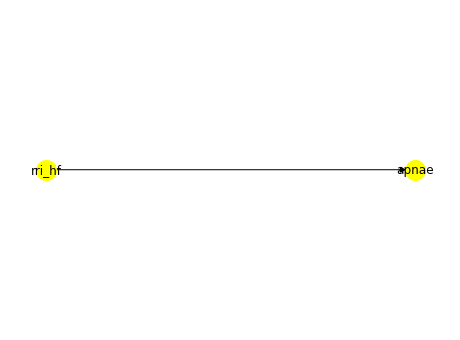

In [141]:
model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [142]:
identified_estimand= model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d              
─────────(E[apnae])
d[rri_hf]          
Estimand assumption 1, Unconfoundedness: If U→{rri_hf} and U→apnae then P(apnae|rri_hf,,U) = P(apnae|rri_hf,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [143]:
import econml
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor
dml_estimate = model.estimate_effect(identified_estimand, 
                                    method_name="backdoor.econml.dml.DML",
                                    method_params={
                                        'init_params': {'model_y':GradientBoostingRegressor(),
                                                        'model_t': GradientBoostingRegressor(),
                                                        'model_final':LassoCV(fit_intercept=False), },
                                        'fit_params': {}
                                     })
print(dml_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d              
─────────(E[apnae])
d[rri_hf]          
Estimand assumption 1, Unconfoundedness: If U→{rri_hf} and U→apnae then P(apnae|rri_hf,,U) = P(apnae|rri_hf,)

## Realized estimand
b: apnae~rri_hf | 
Target units: ate

## Estimate
Mean value: -0.27853085319539356
Effect estimates: [-0.27853085 -0.27853085 -0.27853085 -0.27853085 -0.27853085 -0.27853085
 -0.27853085 -0.27853085 -0.27853085 -0.27853085 -0.27853085 -0.27853085
 -0.27853085 -0.27853085 -0.27853085 -0.27853085 -0.27853085 -0.27853085
 -0.27853085 -0.27853085 -0.27853085 -0.27853085 -0.27853085 -0.27853085
 -0.27853085 -0.27853085 -0.27853085 -0.27853085 -0.27853085 -0.27853085
 -0.27853085 -0.27853085 -0.27853085 -0.27853085 -0.27853085 -0.27853085
 -0.27853085 -0.27853085 -0.27853085 -0.27853085 -0.27853085 -0.27853085
 -0.27853085 -0.27853085 -0.27853085 -0.27853085 -0.

In [ ]:
#rri_hfnu

(array([   0.,    0.,    0.,    0.,    0., 2211.,    0.,    0.,    0.,
           0.]),
 array([0.37663478, 0.47663478, 0.57663478, 0.67663478, 0.77663478,
        0.87663478, 0.97663478, 1.07663478, 1.17663478, 1.27663478,
        1.37663478]),
 <BarContainer object of 10 artists>)

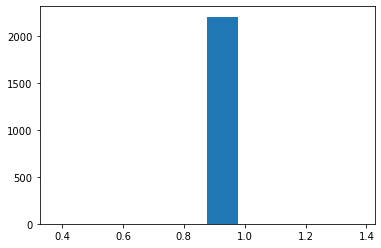

In [25]:
plt.hist(dml_estimate.cate_estimates)

In [28]:
res_random=model.refute_estimate(identified_estimand, dml_estimate, method_name="random_common_cause", show_progress_bar=True)
print(res_random)

Refute: Add a random common cause
Estimated effect:0.8766347757166786
New effect:0.8703701612225825
p value:0.08999999999999997



In [29]:
res_placebo=model.refute_estimate(identified_estimand, dml_estimate,
        method_name="placebo_treatment_refuter", show_progress_bar=True, placebo_type="permute")
print(res_placebo)

Refute: Use a Placebo Treatment
Estimated effect:0.8766347757166786
New effect:-0.0050026950781381285
p value:0.78



Model to find the causal effect of treatment ['C060008'] on outcome ['A06281DE']


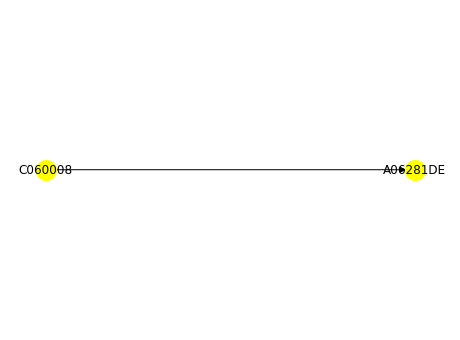

In [36]:
l = model.interpret()

In [33]:
# Textual Interpreter
interpretation = dml_estimate.interpret(method_name="textual_effect_interpreter")

Increasing the treatment variable(s) [C060008] from [0] to [1] causes an increase of 0.8766347757166786 in the expected value of the outcome [A06281DE], over the data distribution/population represented by the dataset.


In [ ]:
#https://github.com/py-why/dowhy
https://github.com/conda-forge/dowhy-feedstock
https://github.com/py-why/dowhy/issues/590
https://github.com/siddhya/CausalAI/blob/main/insurance-causal.ipynb
https://github.com/py-why/dowhy/issues/533
https://github.com/conda-forge/dowhy-feedstock
https://github.com/py-why/dowhy/issues/154
https://programtalk.com/vs4/python/microsoft/dowhy/dowhy/interpreters/textual_effect_interpreter.py/
https://exerror.com/cannot-import-name-_centered-from-scipy-signal-signaltools/
https://stackoverflow.com/questions/71106940/cannot-import-name-centered-from-scipy-signal-signaltools
https://github.com/py-why/dowhy/blob/main/docs/source/example_notebooks/dowhy_estimation_methods.ipynb
https://github.com/py-why/dowhy/blob/main/docs/source/example_notebooks/tutorial-causalinference-machinelearning-using-dowhy-econml.ipynb
    https://github.com/py-why/dowhy/tree/main/docs/source/example_notebooks
https://github.com/py-why/dowhy
    https://github.com/py-why/dowhy/blob/main/docs/source/example_notebooks/dowhy_interpreter.ipynb
        https://github.com/py-why/dowhy/tree/main/docs/source/example_notebooks
            https://causalinference.gitlab.io/causal-reasoning-book-chapter4/A_ges
                https://github.com/microsoft/EconML/A_ges
                    https://github.com/microsoft/EconML/issues/154
                        https://github.com/microsoft/EconML/#for-developers
                            https://github.com/microsoft/EconML/A_ges
